In [2]:
######################################################
# Takes the historgrams and clusters them into sets based on preflop perf
# data is from rust gen_hole_card_data
# 
import numpy as np
# python3 -m pip install scipy
# python3 -m pip install matplotlib --force-reinstall
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'equity_data' is a 2D array where each row represents the equity distribution
# of a pair of hole cards across the flops

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from pathlib import Path

In [21]:
# First look at absolute rank
ranks = []
labels = []
for round_index, round in enumerate(["Flop", "Turn", "River"]):
    round_ranks = [[] for _ in range(0, 169)]
    for num_players in range(2, 10):
        csv_path = Path(f'./from_rust/hole_card_data_{round}_{num_players}.csv')
        # csv_path = Path('/home/eric/git/poker_eval/data/hole_card_data_River_4.csv')
        df = pd.read_csv(csv_path, header=None)
        
        df['Rank'] = df[2].rank(ascending=False).astype(int)

        if len(labels) == 0:
            labels = list(df[1])            
            
        rank_list = list(df['Rank'])
        for i in range(0, len(labels)):
            round_ranks[i].append(rank_list[i])

    ranks.append(round_ranks)

for i in range(0, len(labels)):
    print(f"Card {labels[i]}: ")
    for round_index, round in enumerate(["Flop", "Turn", "River"]):
        min_round_rank = min(ranks[round_index][i])
        max_round_rank = max(ranks[round_index][i])

        print(f"Round: {round} min rank {min_round_rank} max rank {max_round_rank}")
        print(f"Ranks {ranks[round_index][i]} (2 to 9 players)")

Card AA: 
Round: Flop min rank 1 max rank 1
Ranks [1, 1, 1, 1, 1, 1, 1, 1] (2 to 9 players)
Round: Turn min rank 1 max rank 1
Ranks [1, 1, 1, 1, 1, 1, 1, 1] (2 to 9 players)
Round: River min rank 1 max rank 1
Ranks [1, 1, 1, 1, 1, 1, 1, 1] (2 to 9 players)
Card AKs: 
Round: Flop min rank 7 max rank 11
Ranks [11, 10, 10, 9, 9, 8, 7, 7] (2 to 9 players)
Round: Turn min rank 5 max rank 9
Ranks [9, 9, 8, 7, 7, 6, 5, 5] (2 to 9 players)
Round: River min rank 4 max rank 8
Ranks [8, 8, 7, 6, 5, 5, 4, 4] (2 to 9 players)
Card AQs: 
Round: Flop min rank 9 max rank 14
Ranks [14, 13, 12, 10, 11, 10, 11, 9] (2 to 9 players)
Round: Turn min rank 7 max rank 11
Ranks [11, 10, 9, 10, 9, 9, 8, 7] (2 to 9 players)
Round: River min rank 5 max rank 10
Ranks [10, 9, 8, 7, 6, 7, 6, 5] (2 to 9 players)
Card AJs: 
Round: Flop min rank 12 max rank 16
Ranks [16, 15, 15, 14, 15, 13, 12, 12] (2 to 9 players)
Round: Turn min rank 10 max rank 14
Ranks [14, 13, 12, 11, 12, 11, 11, 10] (2 to 9 players)
Round: River m

In [33]:
# First look at absolute rank
ranks = []
labels = []

round_ranks = [[] for _ in range(0, 169)]
    
csv_path = Path(f'./from_rust/hole_card_data_Flop_4.csv')

df = pd.read_csv(csv_path, header=None)
        
df['Rank'] = df[2].rank(ascending=False).astype(int)

if len(labels) == 0:
    labels = list(df[1])            
            
rank_list = list(df['Rank'])
eq_list = list(df[2])

rank_labels = []
for i in range(0, len(labels)):
    # print(f"Card {labels[i]}: {rank_list[i]}")
    rank_labels.append( (rank_list[i], labels[i], eq_list[i]) )

rank_labels.sort()

for i in range(0, len(labels)):
    card_label = rank_labels[i][1]
    card_rank = rank_labels[i][0]
    print(f"Card {card_label}: {card_rank}  Equity: {rank_labels[i][2]*100:.2f}%")


Card AA: 1  Equity: 87.16%
Card KK: 2  Equity: 81.35%
Card QQ: 3  Equity: 74.61%
Card JJ: 4  Equity: 70.09%
Card TT: 5  Equity: 64.20%
Card 99: 6  Equity: 60.05%
Card 88: 7  Equity: 54.88%
Card 77: 8  Equity: 49.96%
Card 66: 9  Equity: 45.77%
Card AKs: 10  Equity: 44.50%
Card AKo: 11  Equity: 44.07%
Card AQs: 12  Equity: 43.71%
Card AQo: 13  Equity: 43.46%
Card 55: 14  Equity: 41.41%
Card AJs: 15  Equity: 41.10%
Card AJo: 16  Equity: 40.89%
Card ATs: 17  Equity: 40.38%
Card ATo: 18  Equity: 39.39%
Card 44: 19  Equity: 38.45%
Card A9s: 20  Equity: 38.44%
Card A9o: 21  Equity: 38.40%
Card KQs: 22  Equity: 37.84%
Card KQo: 23  Equity: 37.84%
Card A8s: 24  Equity: 37.09%
Card A8o: 25  Equity: 36.75%
Card KJs: 26  Equity: 36.02%
Card A7s: 27  Equity: 35.56%
Card KTs: 28  Equity: 35.08%
Card 33: 29  Equity: 34.72%
Card KJo: 30  Equity: 34.66%
Card A7o: 31  Equity: 34.23%
Card A6s: 32  Equity: 33.93%
Card A6o: 33  Equity: 33.69%
Card KTo: 34  Equity: 33.47%
Card A5s: 35  Equity: 32.70%
Card K

   0     1         2         3         4         5         6         7      \
0      0  AdAc  0.406750  0.666650  0.697550  0.566350  0.593300  0.583700   
1      1  AcKc  0.641817  0.203933  0.265683  0.922050  0.713200  0.543167   
2      2  AcQc  0.259458  0.206200  0.192767  0.608200  0.206633  0.536917   
3      3  AcJc  0.623633  0.579700  0.518933  0.708900  0.700717  0.596117   
4      4  AcTc  0.590200  0.228358  0.240833  0.205308  0.936900  0.616567   

      8         9      ...     9993      9994      9995      9996      9997   \
0  0.569950  0.591450  ...  0.671000  0.673667  0.704350  0.689700  0.643350   
1  0.203167  0.510367  ...  0.258417  0.442550  0.580850  0.193767  0.213617   
2  0.601525  0.233033  ...  0.633017  0.559650  0.205450  0.698800  0.210983   
3  0.239200  0.235400  ...  0.223633  0.201833  0.309567  0.175183  0.500183   
4  0.243833  0.634883  ...  0.693200  0.175667  0.169050  0.614783  0.175192   

      9998      9999      10000     10001  10002  

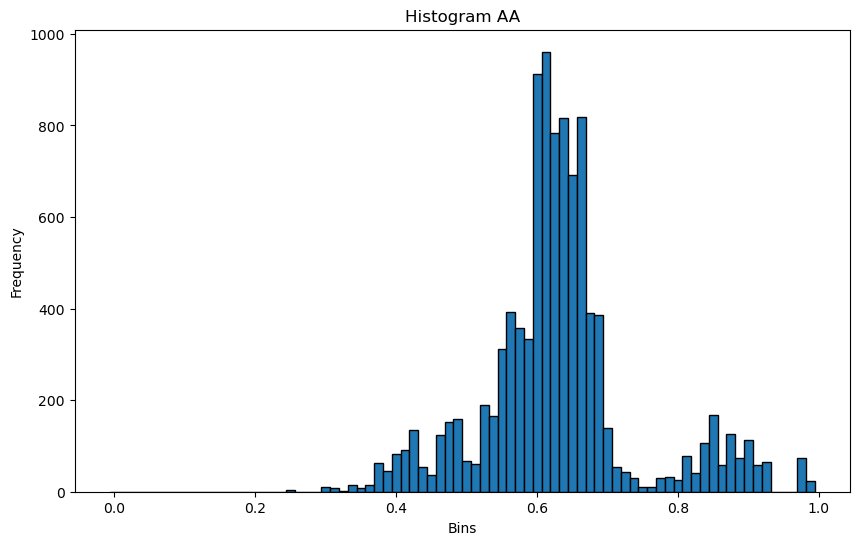

Line 1: AcKc


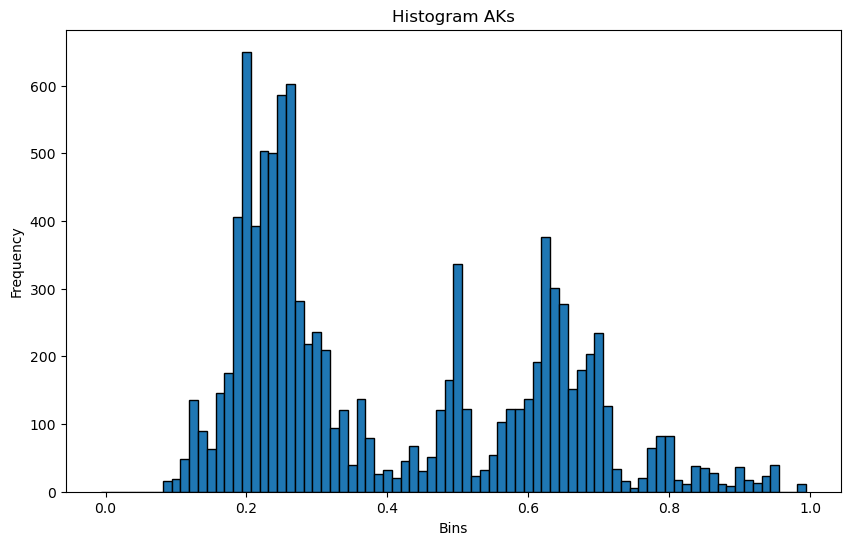

Line 2: AcQc


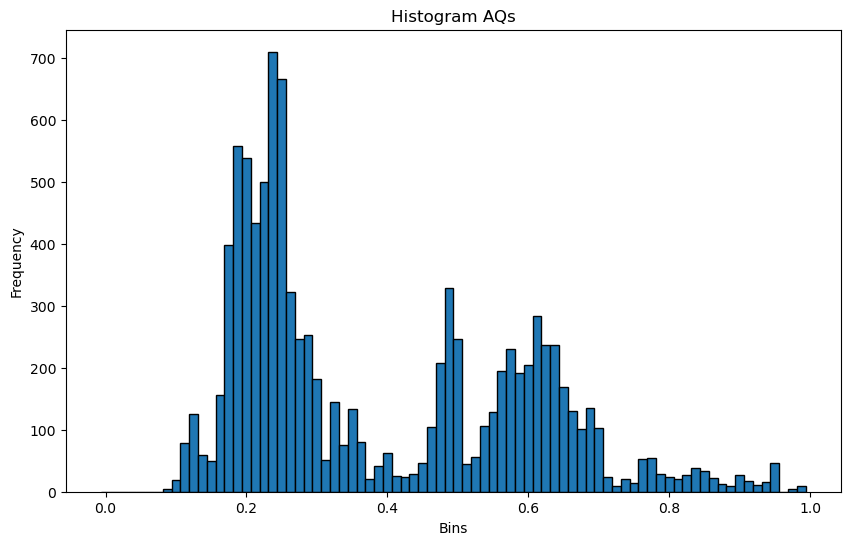

Line 3: AcJc


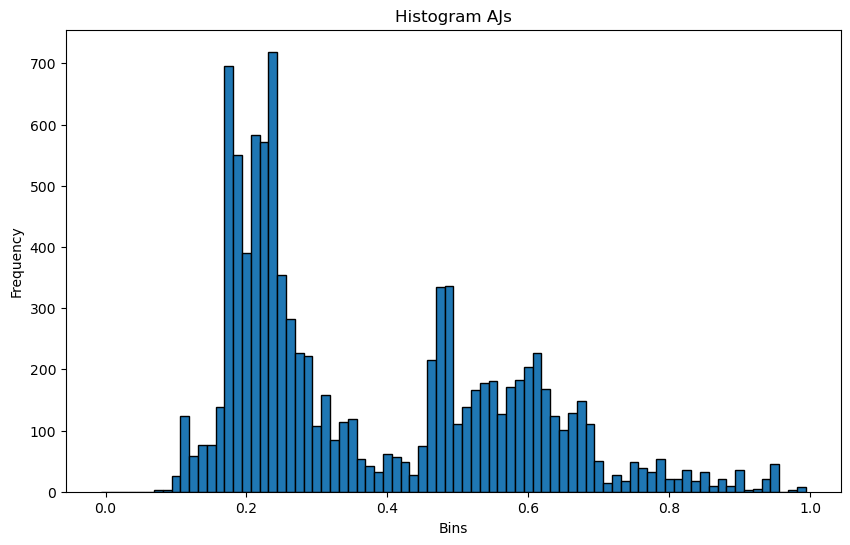

Line 4: AcTc


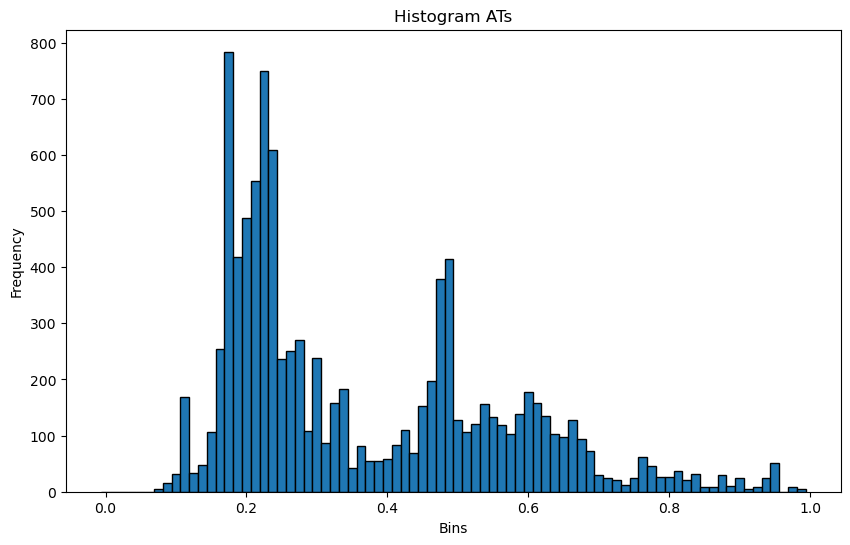

Line 5: Ac9c


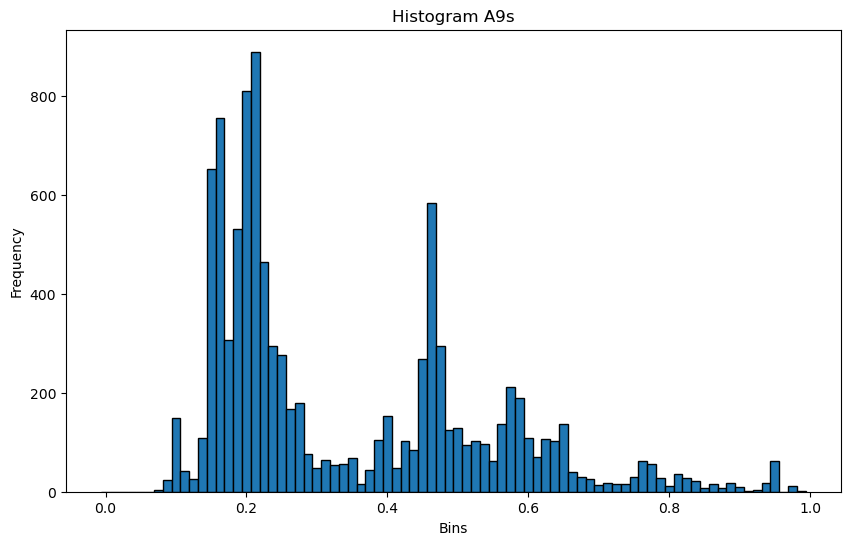

Line 6: Ac8c


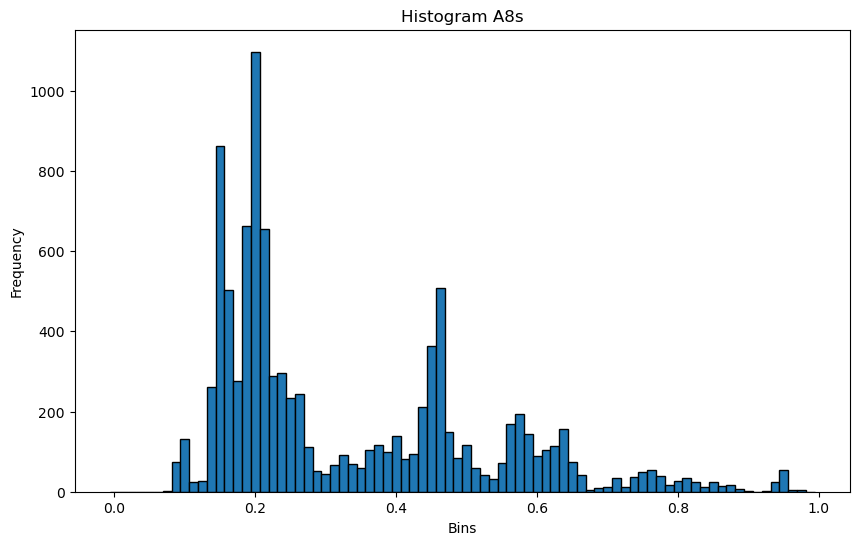

Line 7: Ac7c


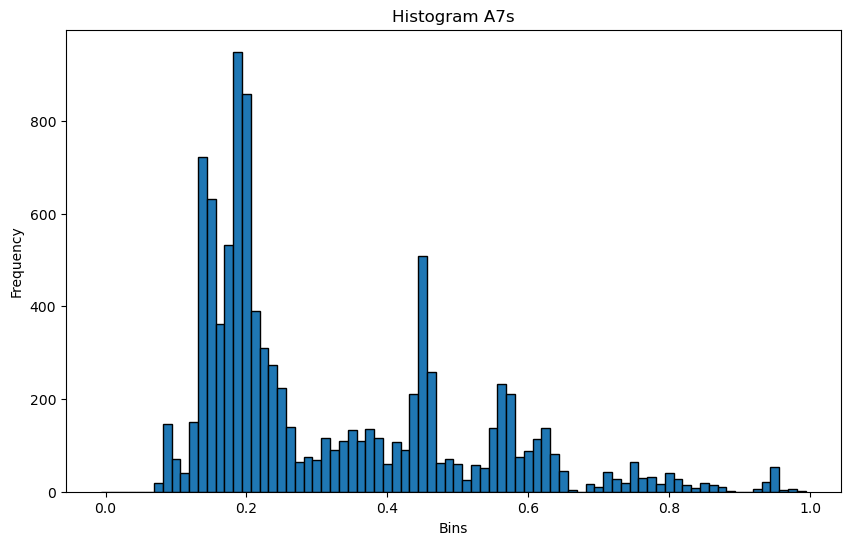

Line 8: Ac6c


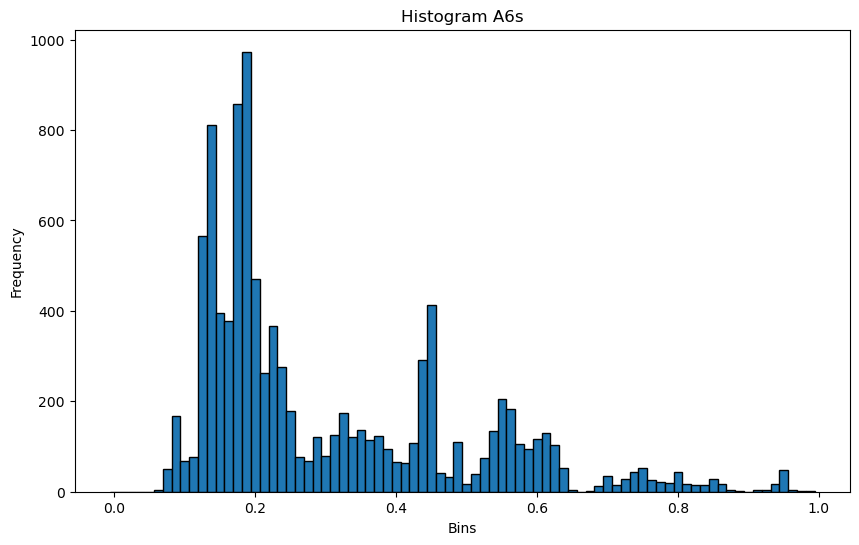

Line 9: Ac5c


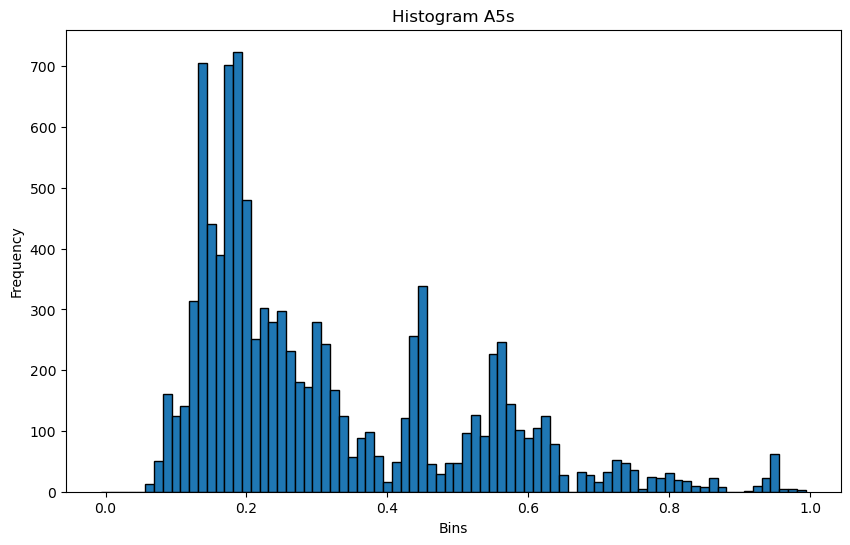

Line 10: Ac4c


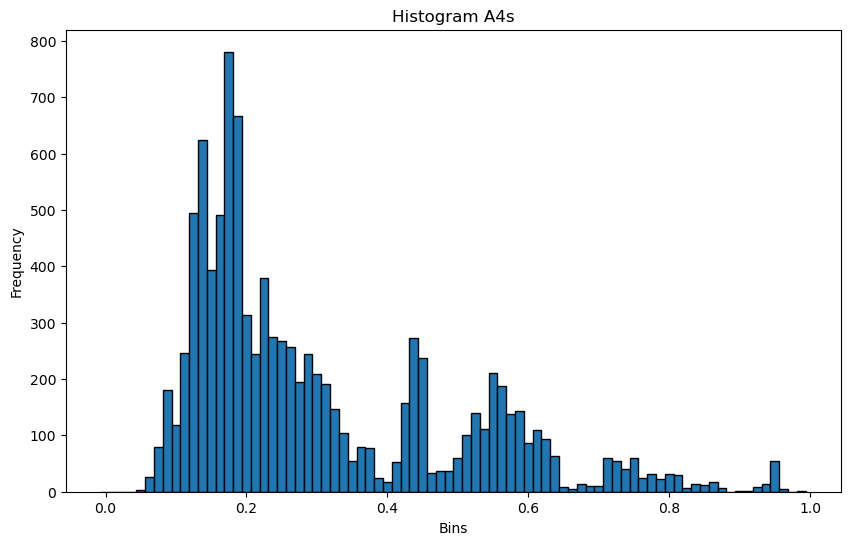

Line 11: Ac3c


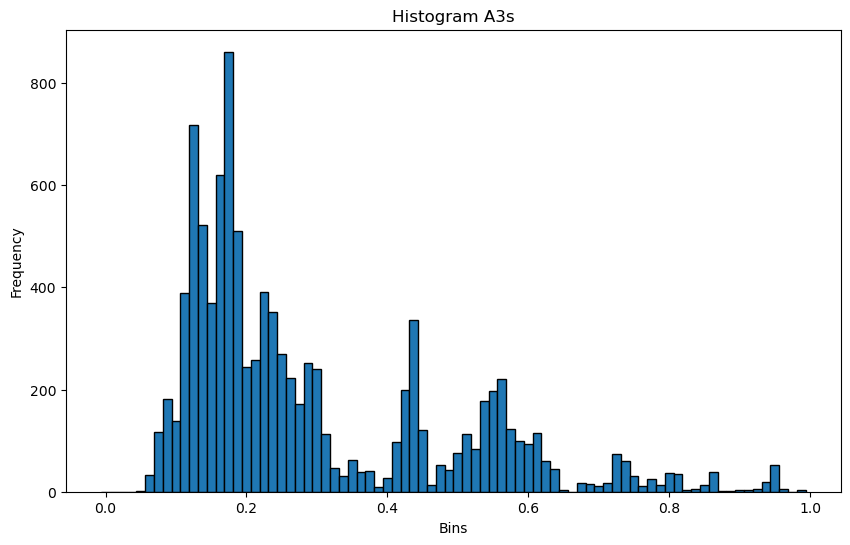

Line 12: Ac2c


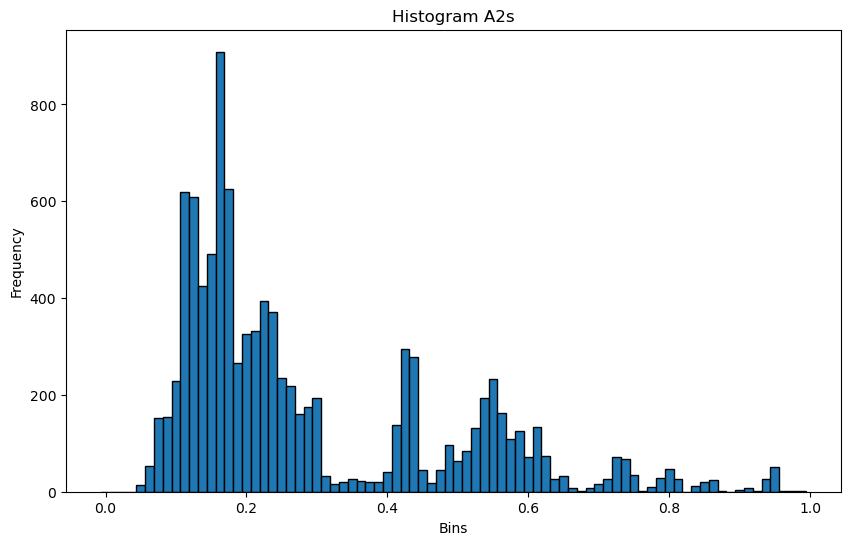

Line 13: AcKd


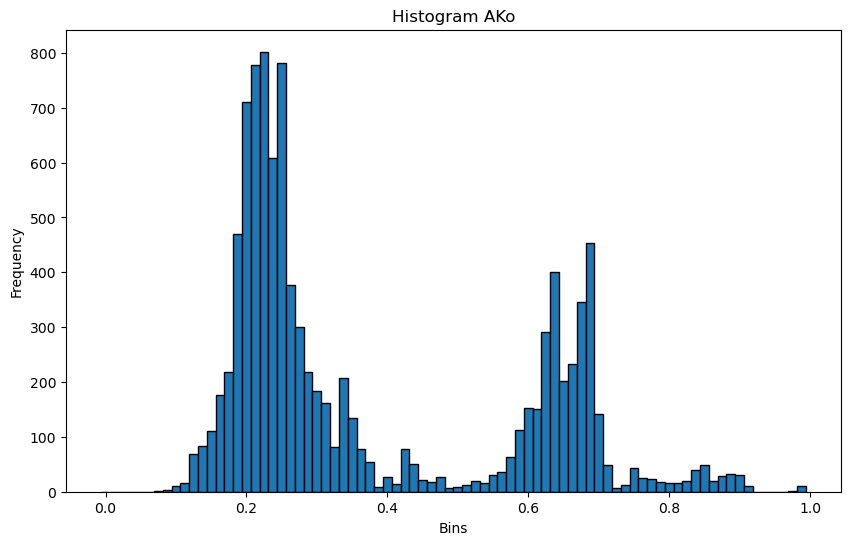

Line 14: KdKc


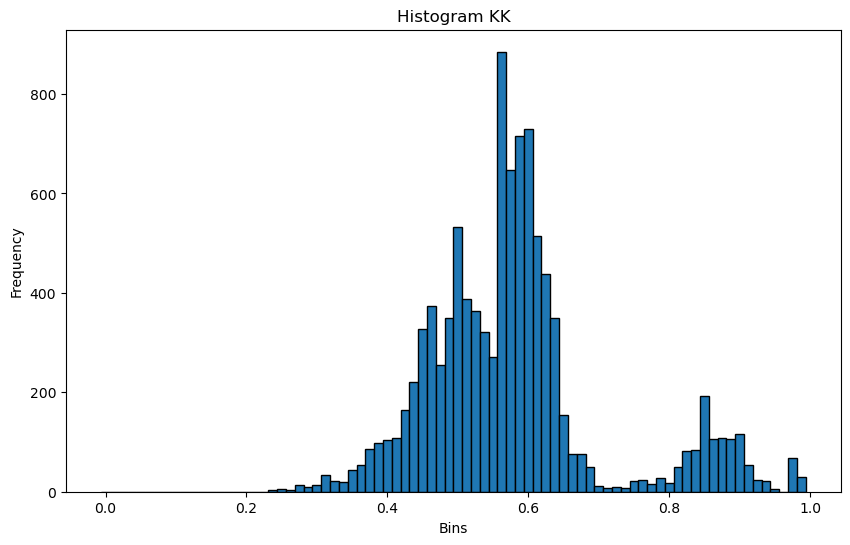

Line 15: KcQc


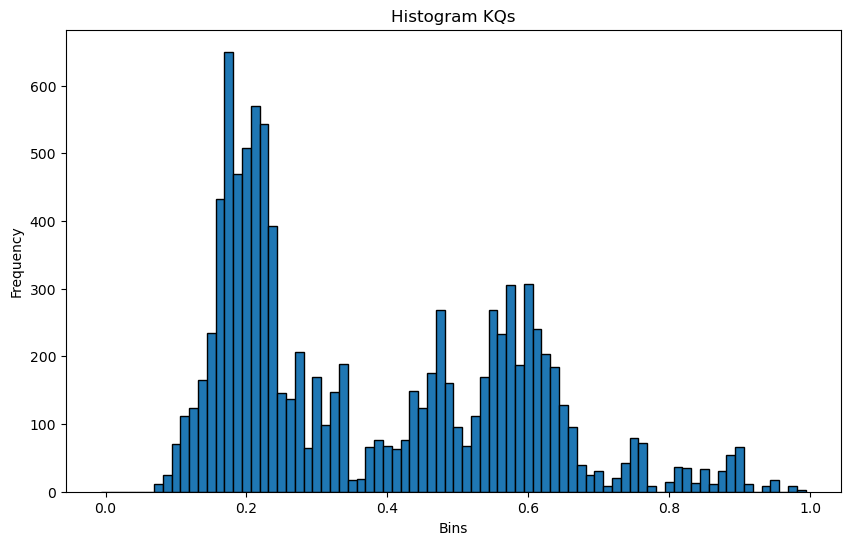

Line 16: KcJc


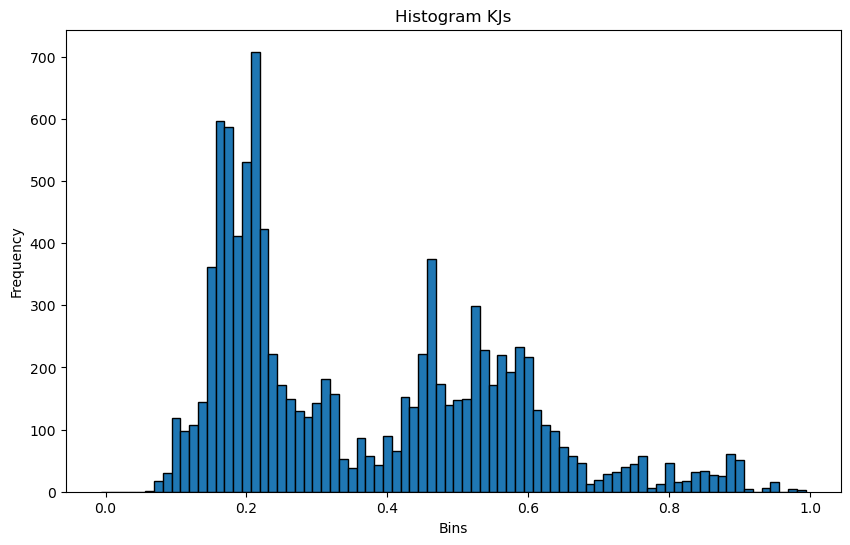

Line 17: KcTc


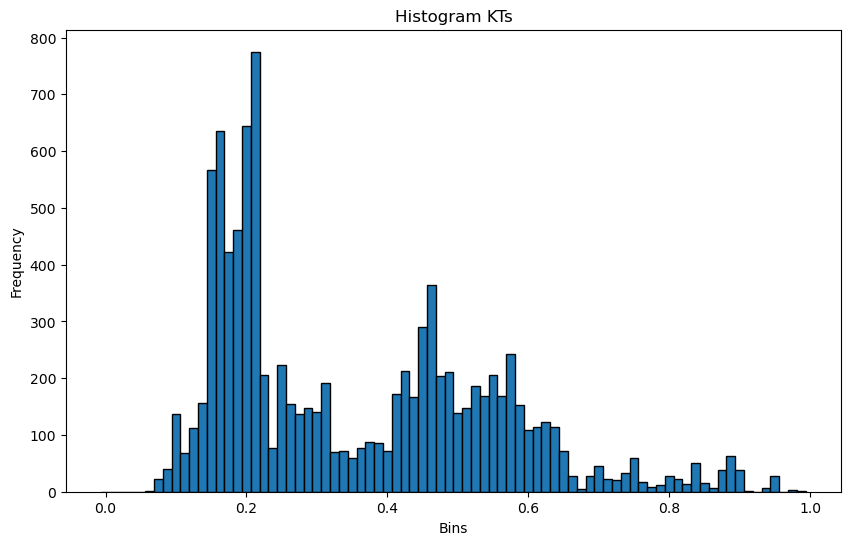

Line 18: Kc9c


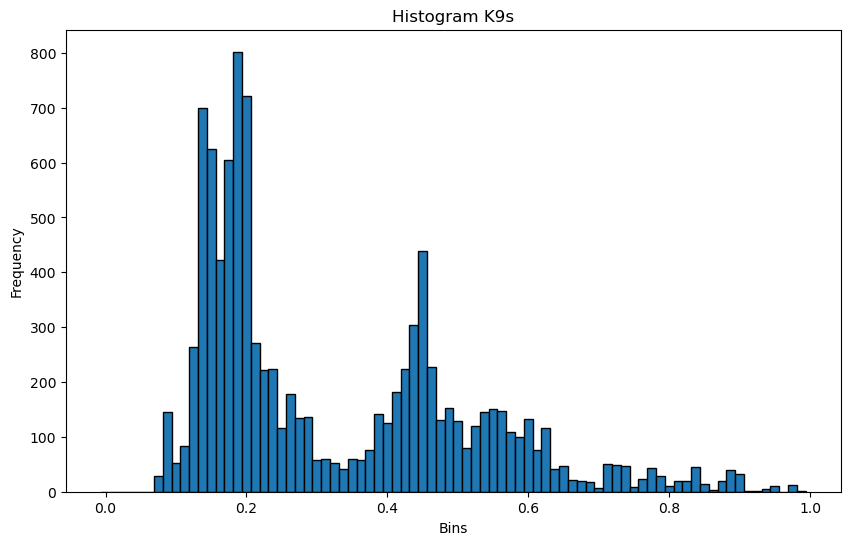

Line 19: Kc8c


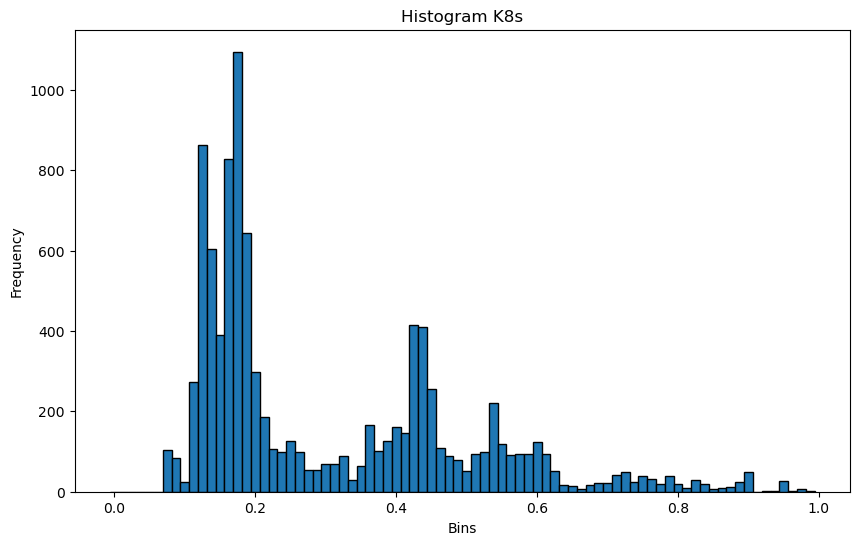

Line 20: Kc7c


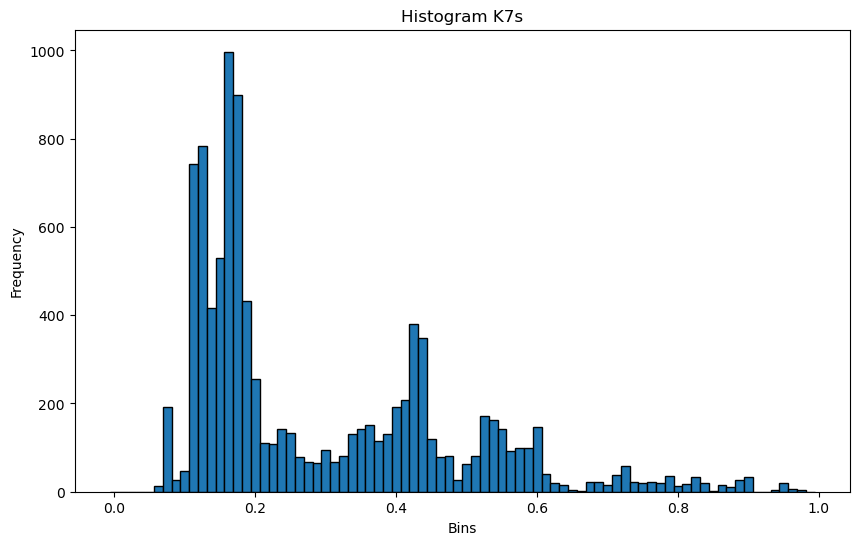

Line 21: Kc6c


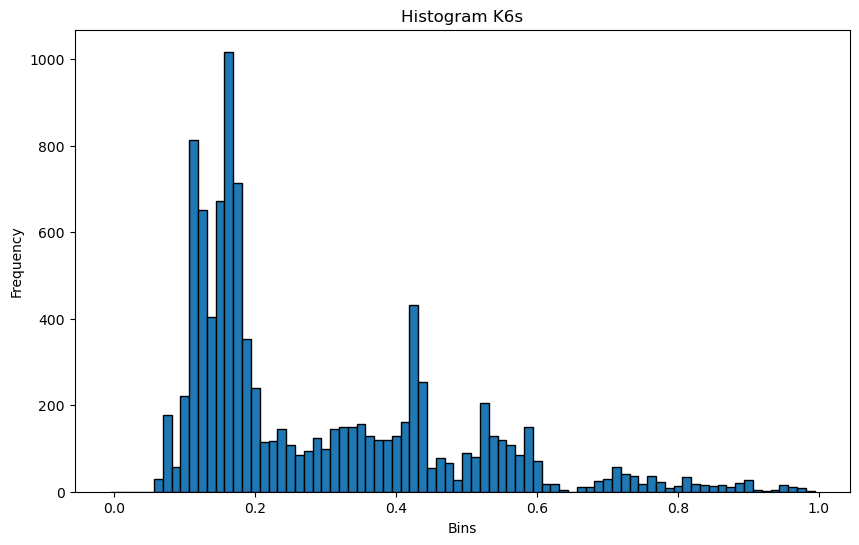

Line 22: Kc5c


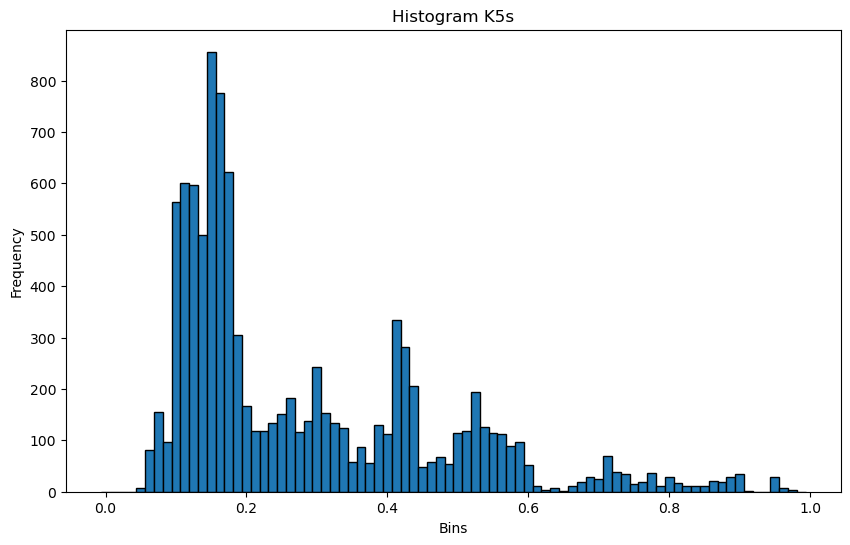

Line 23: Kc4c


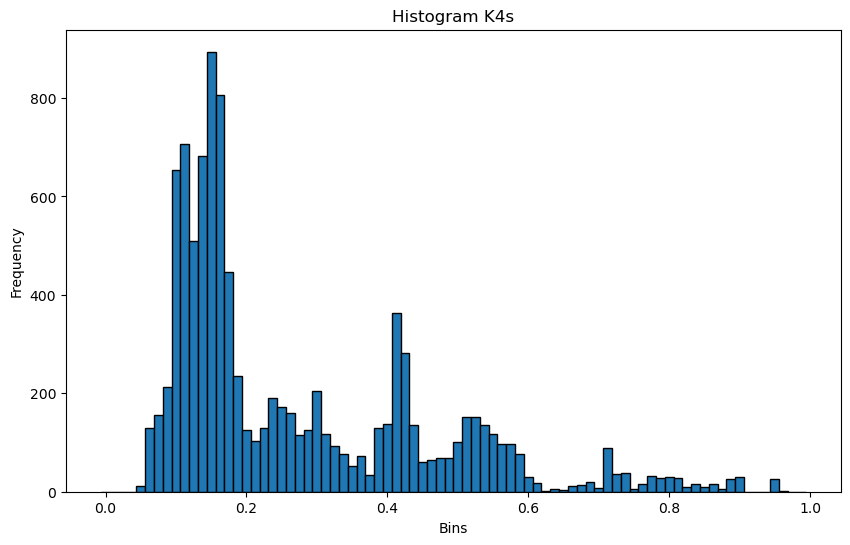

Line 24: Kc3c


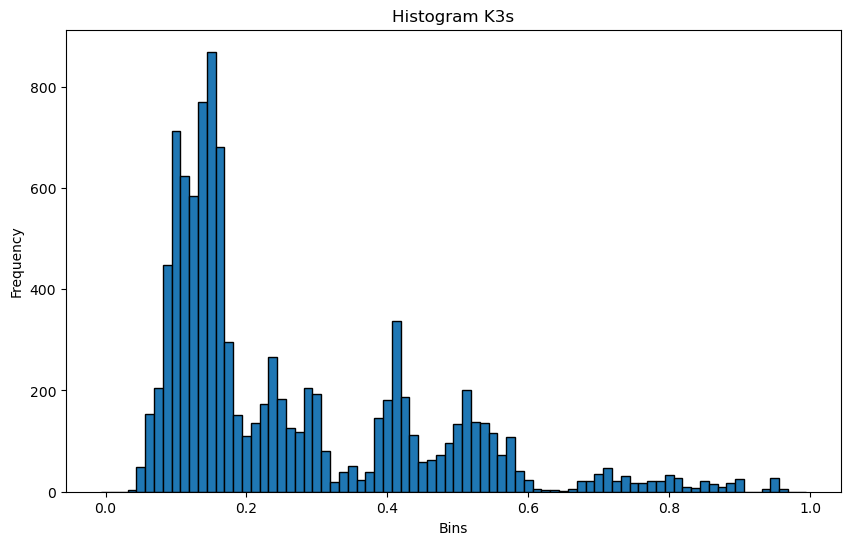

Line 25: Kc2c


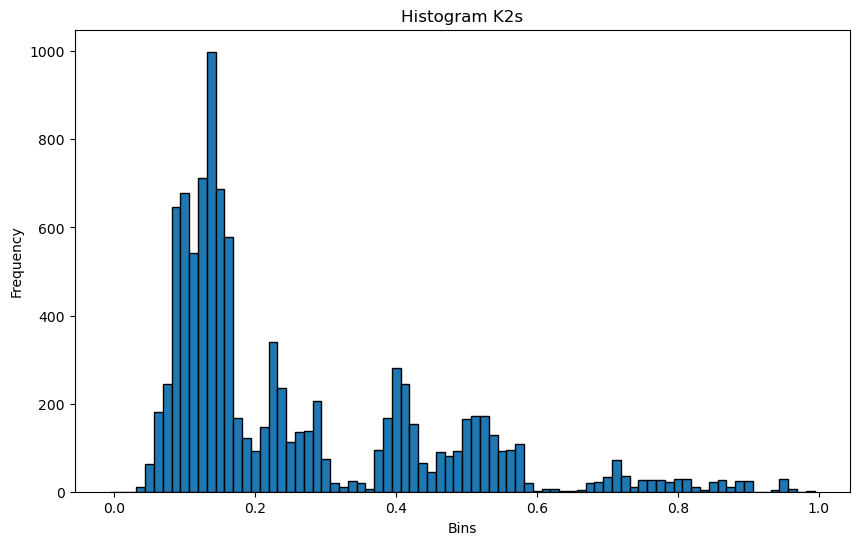

Line 26: AcQd


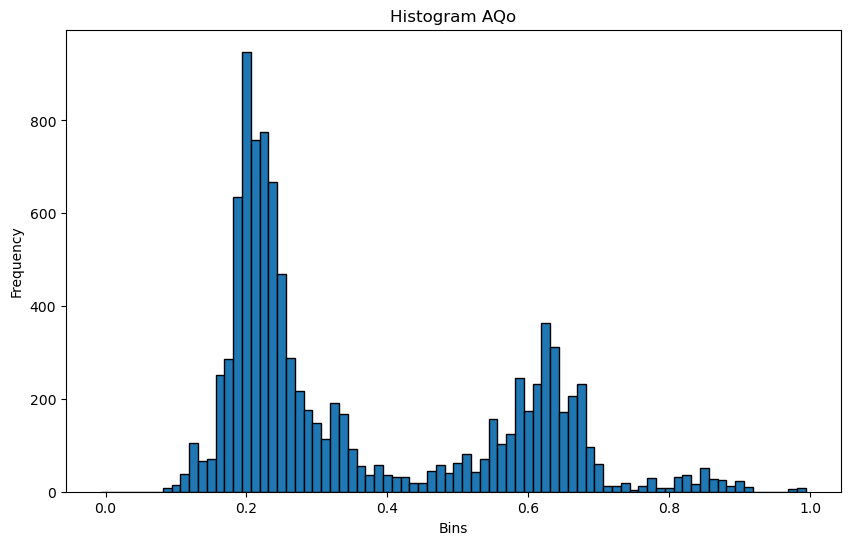

Line 27: KcQd


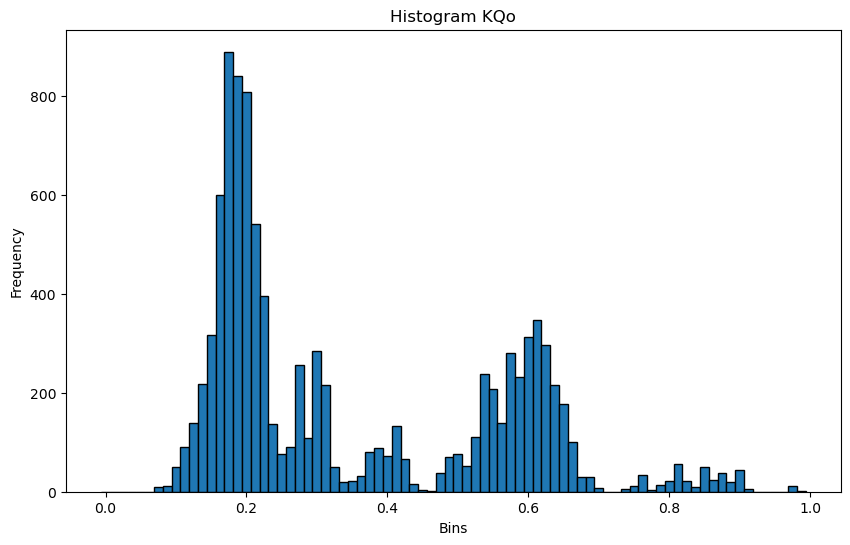

Line 28: QdQc


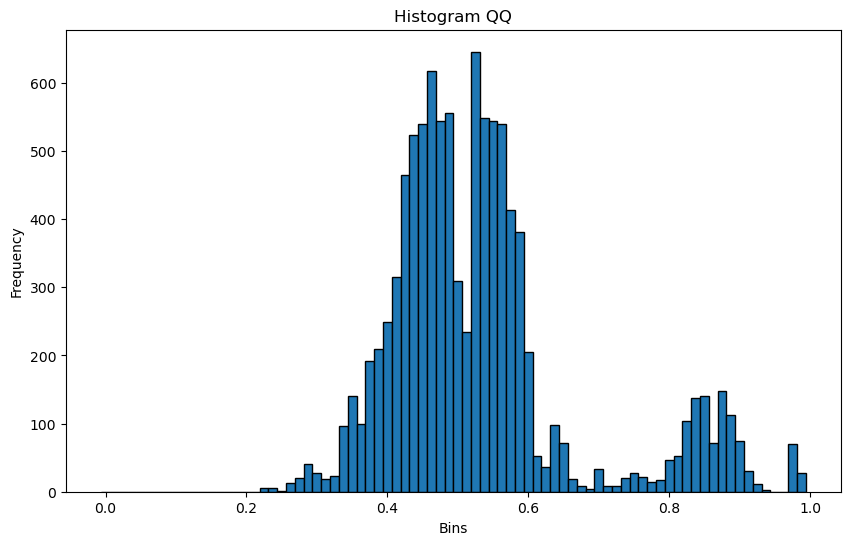

Line 29: QcJc


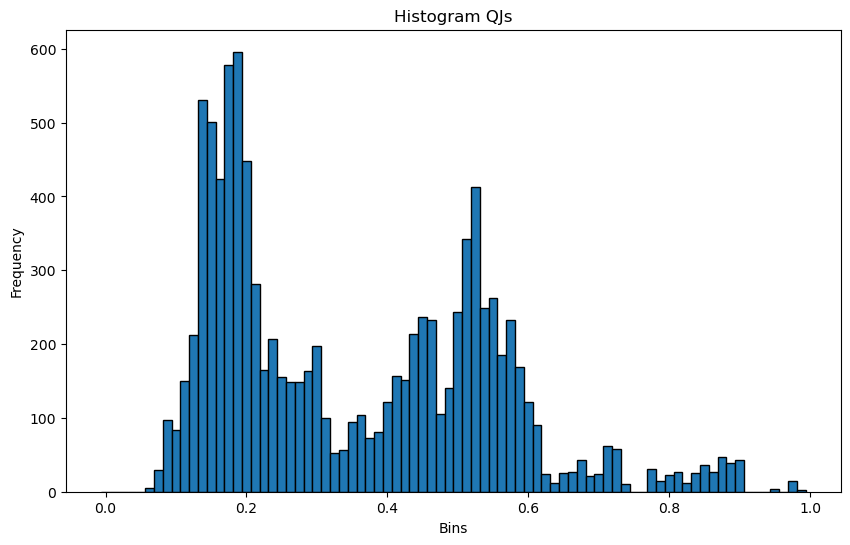

Line 30: QcTc


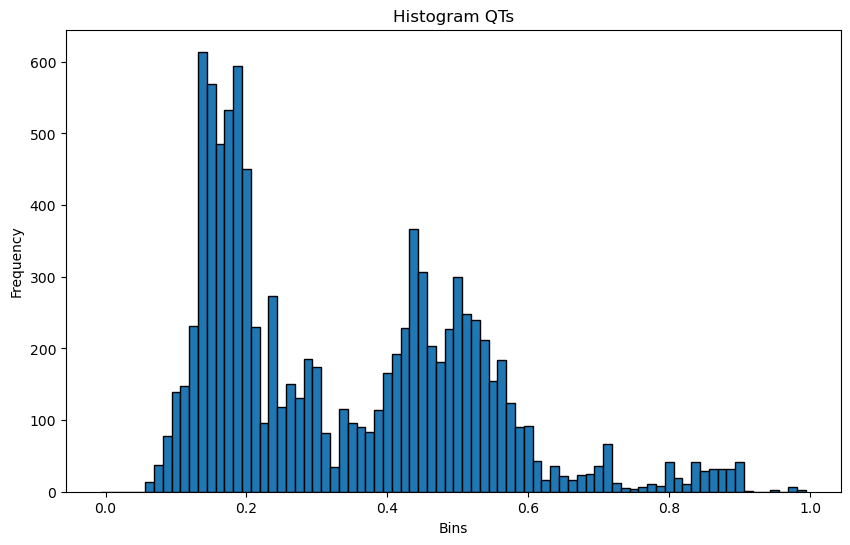

Line 31: Qc9c


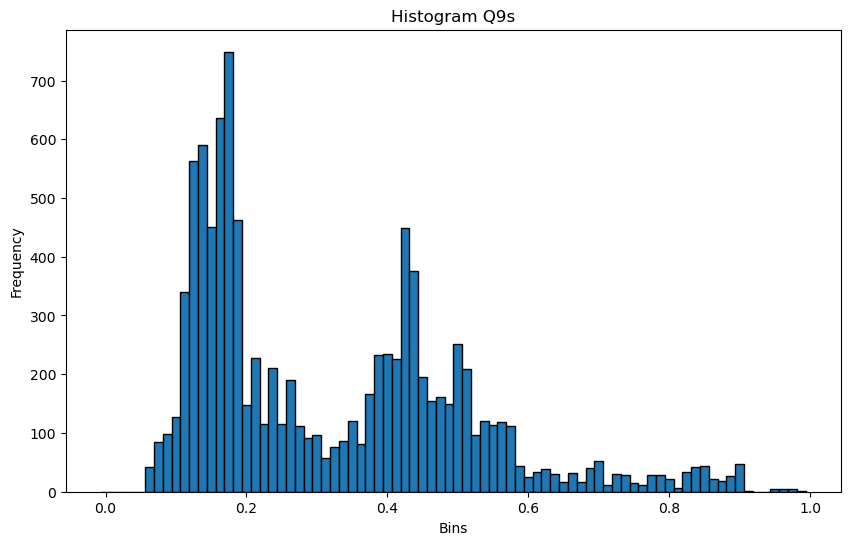

Line 32: Qc8c


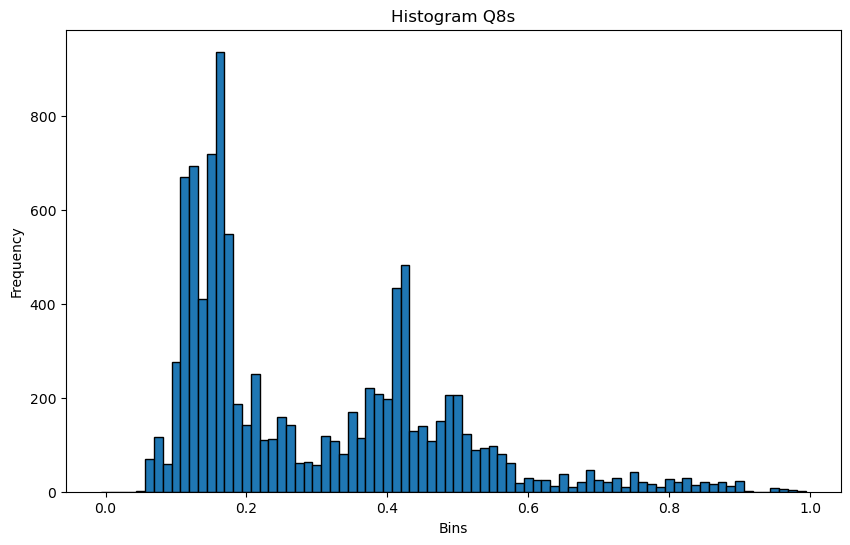

Line 33: Qc7c


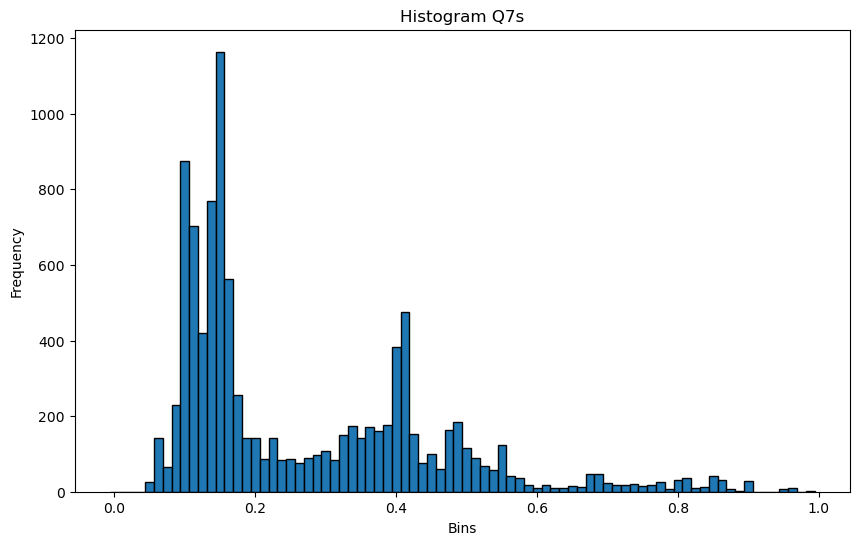

Line 34: Qc6c


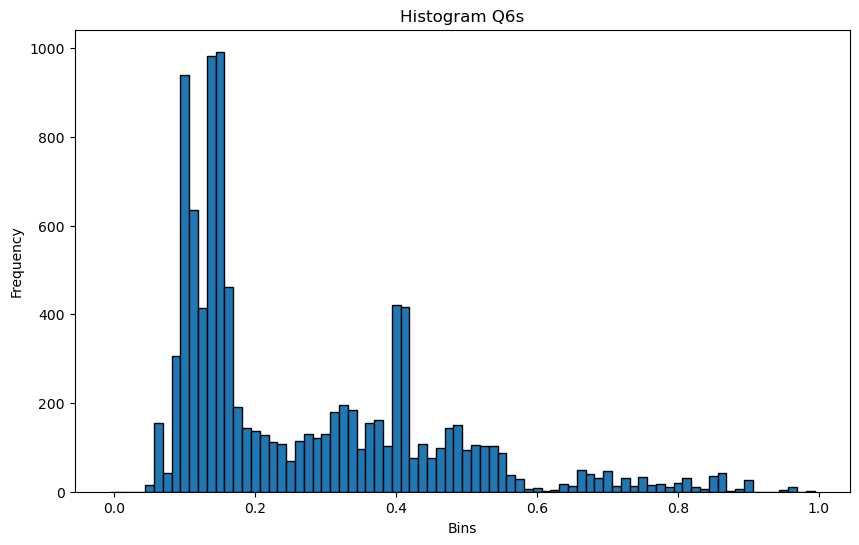

Line 35: Qc5c


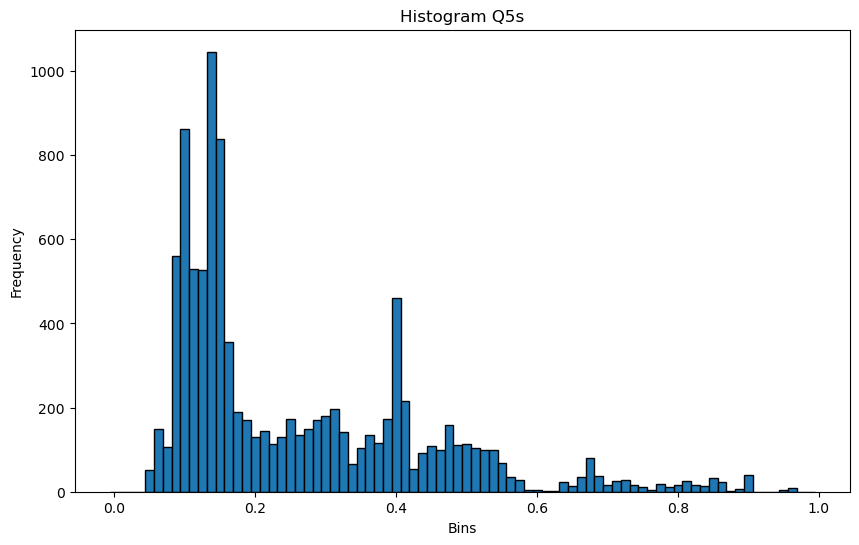

Line 36: Qc4c


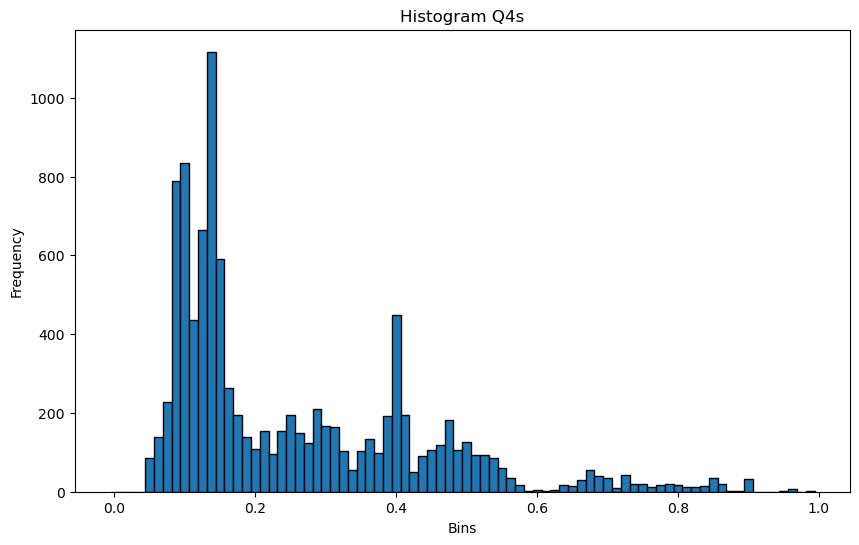

Line 37: Qc3c


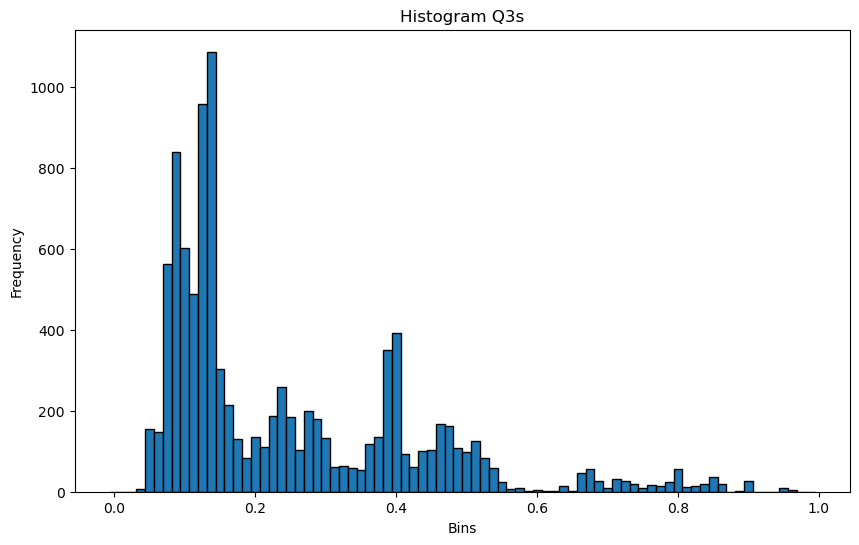

Line 38: Qc2c


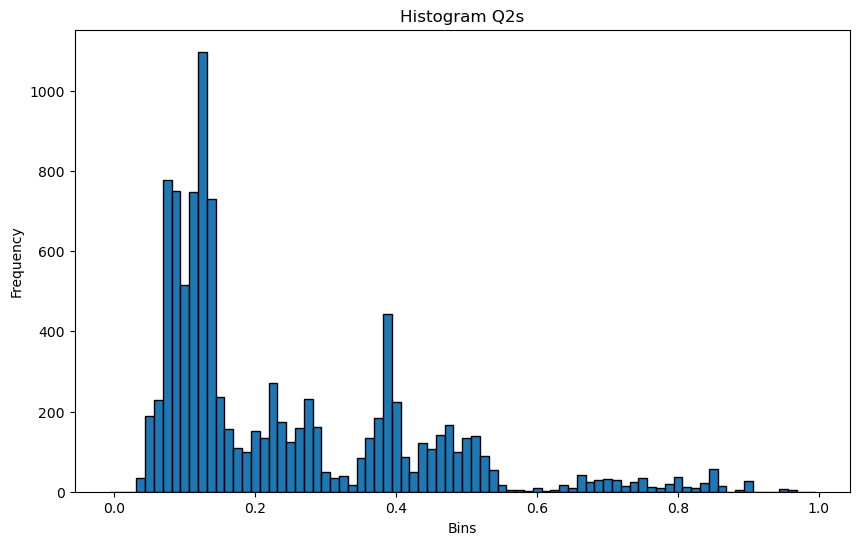

Line 39: AcJd


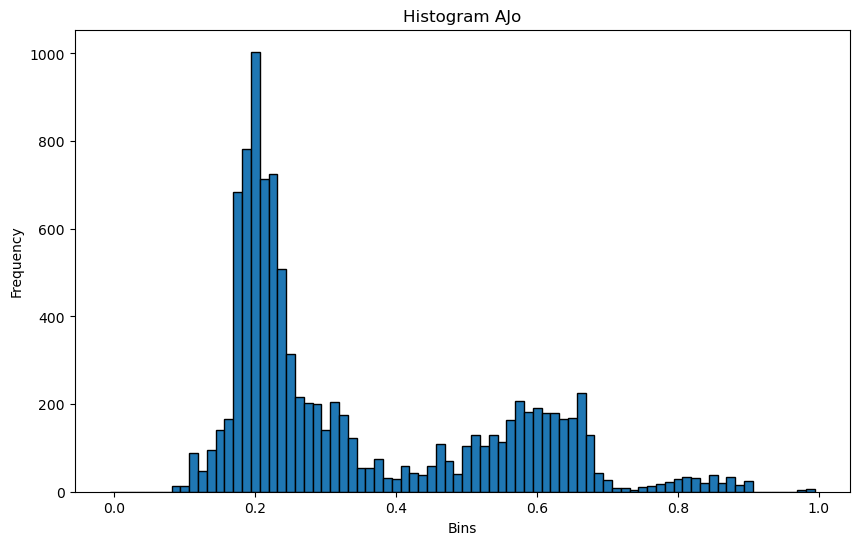

Line 40: KcJd


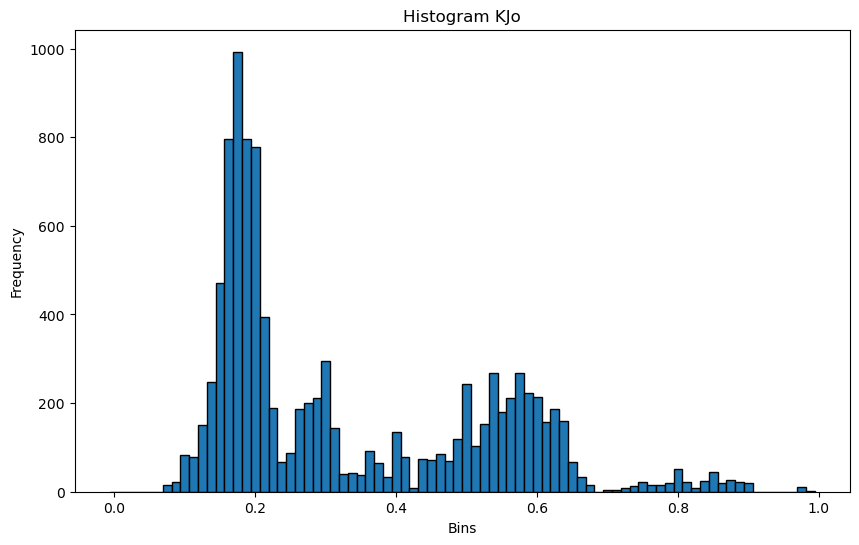

Line 41: QcJd


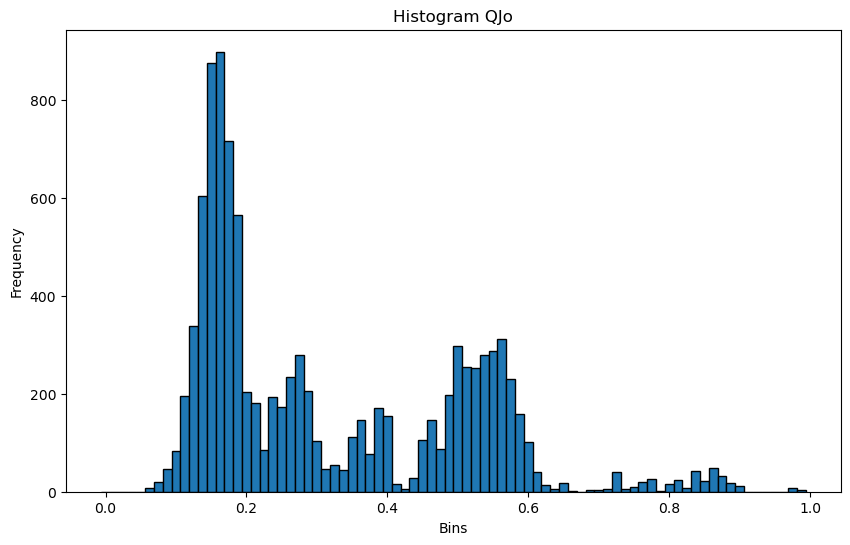

Line 42: JdJc


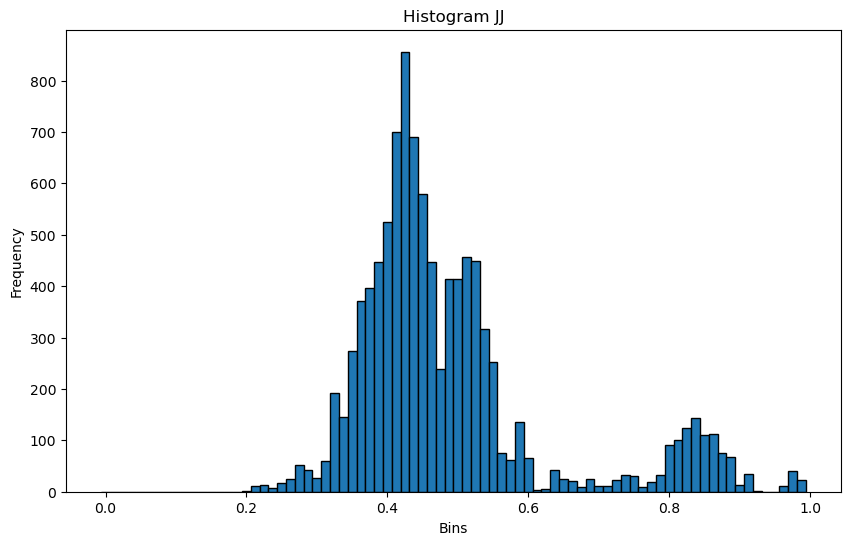

Line 43: JcTc


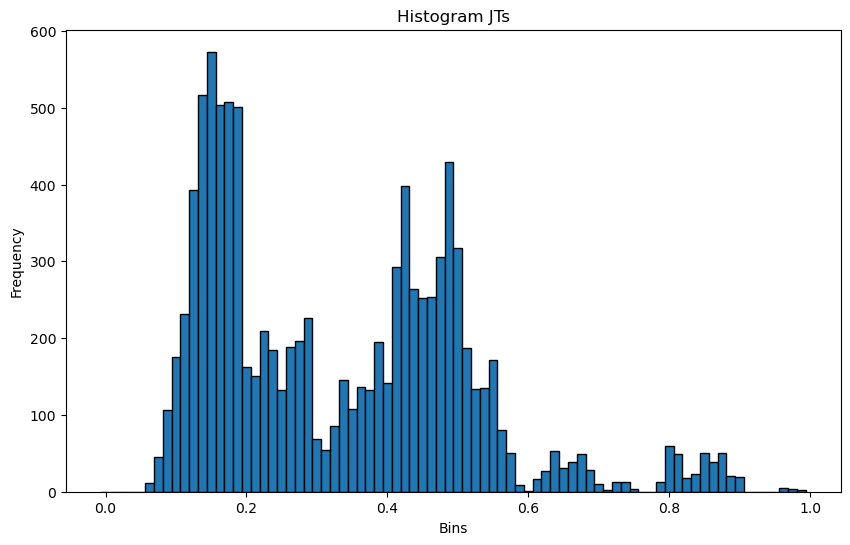

Line 44: Jc9c


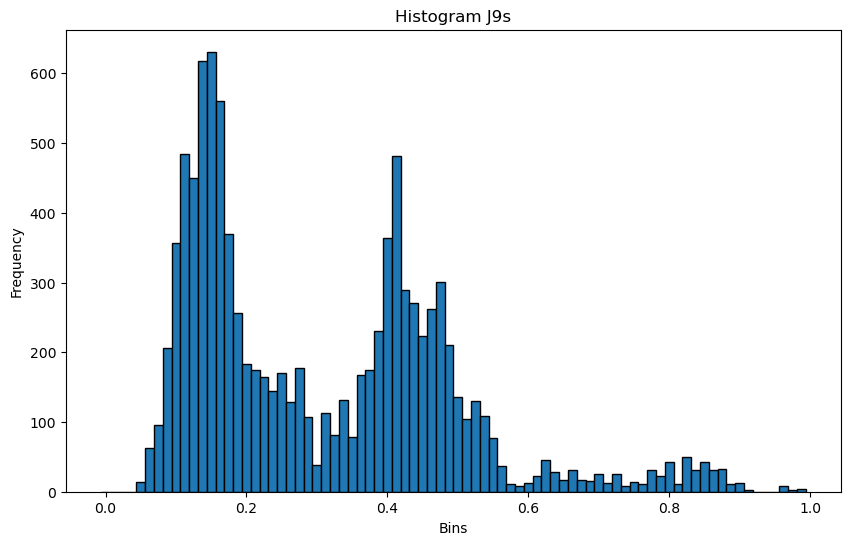

Line 45: Jc8c


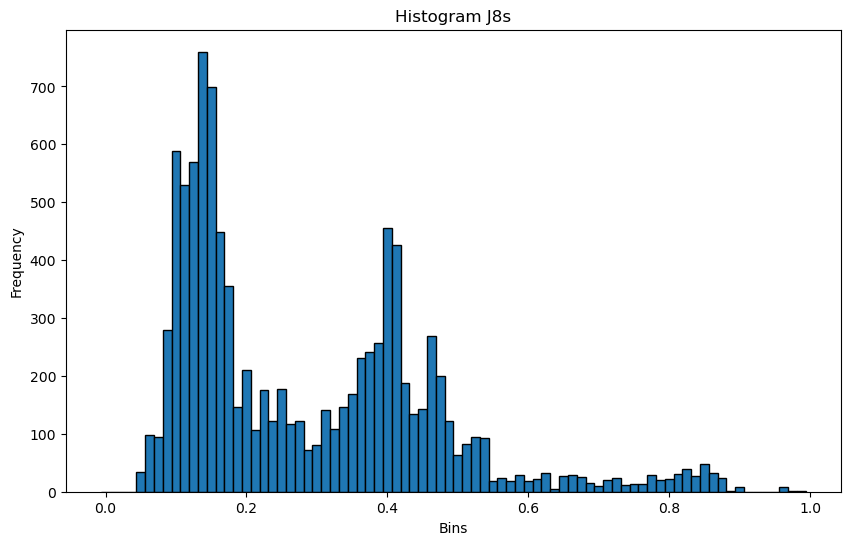

Line 46: Jc7c


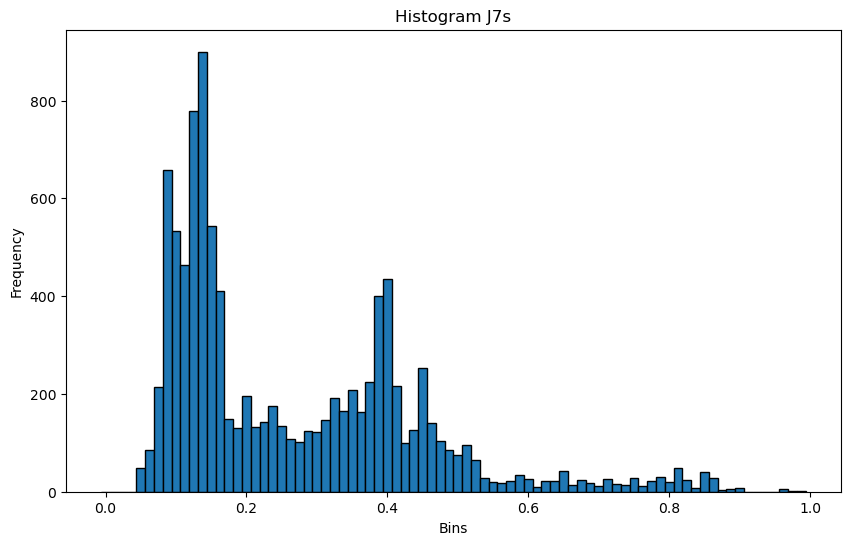

Line 47: Jc6c


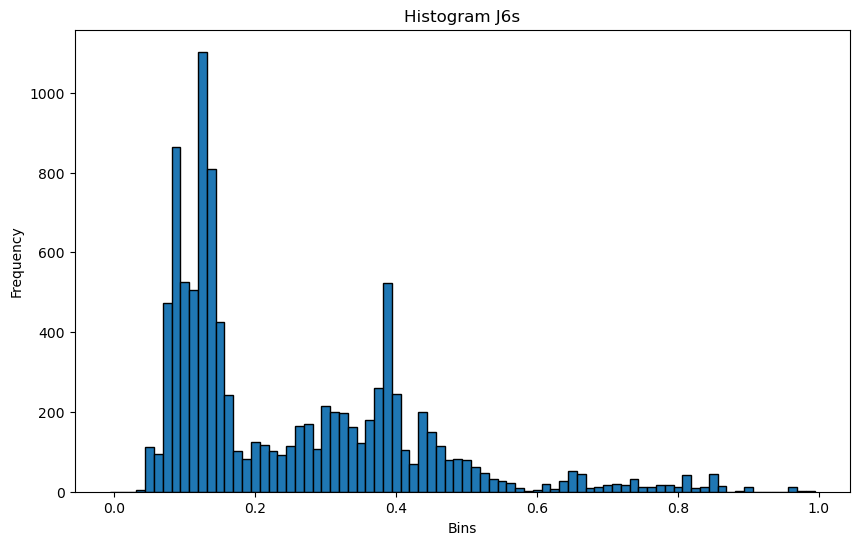

Line 48: Jc5c


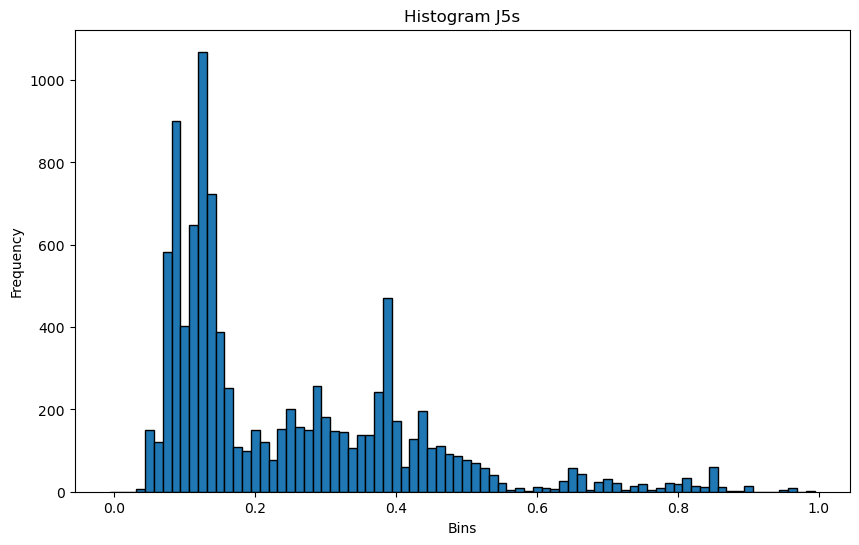

Line 49: Jc4c


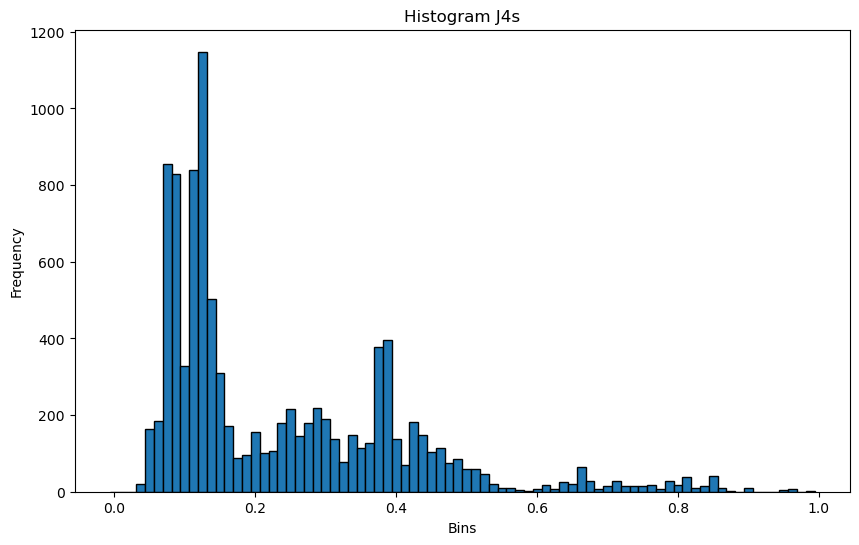

Line 50: Jc3c


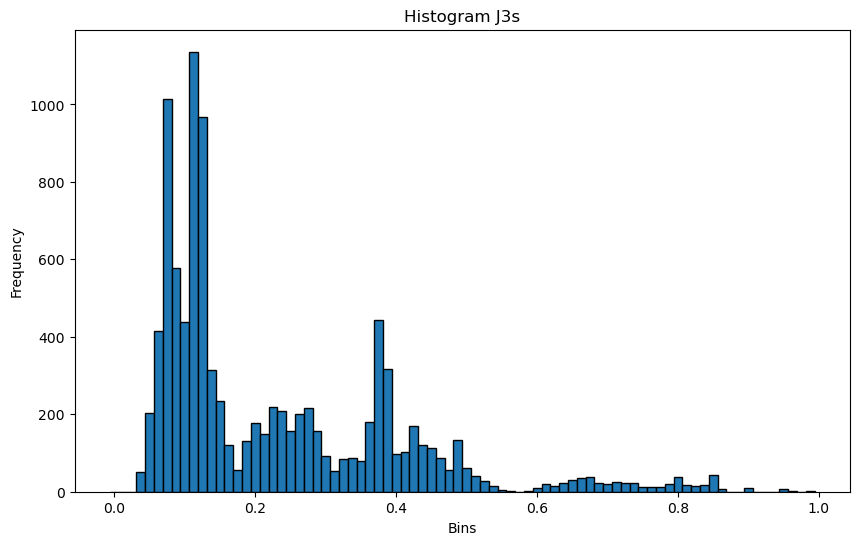

Line 51: Jc2c


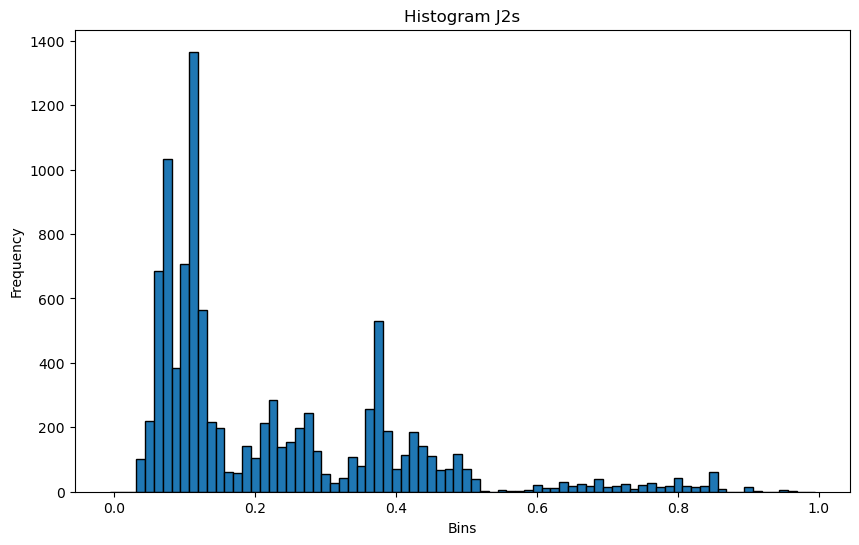

Line 52: AcTd


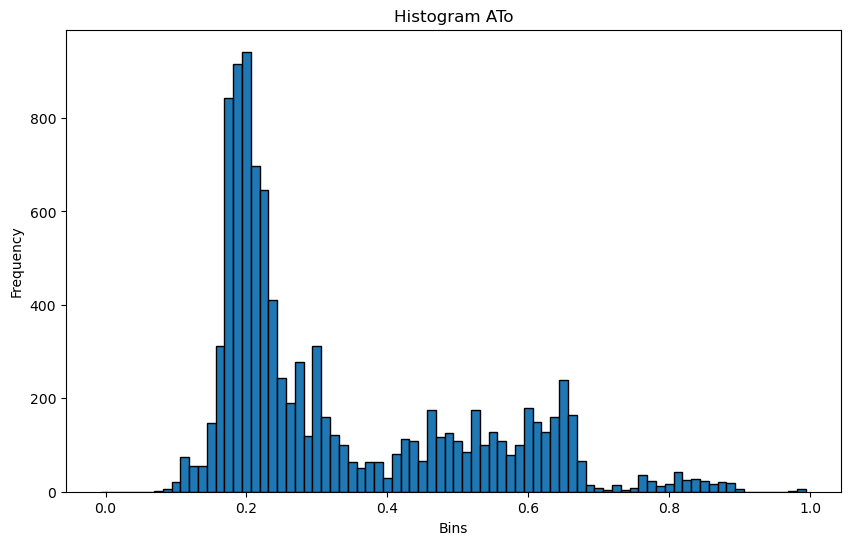

Line 53: KcTd


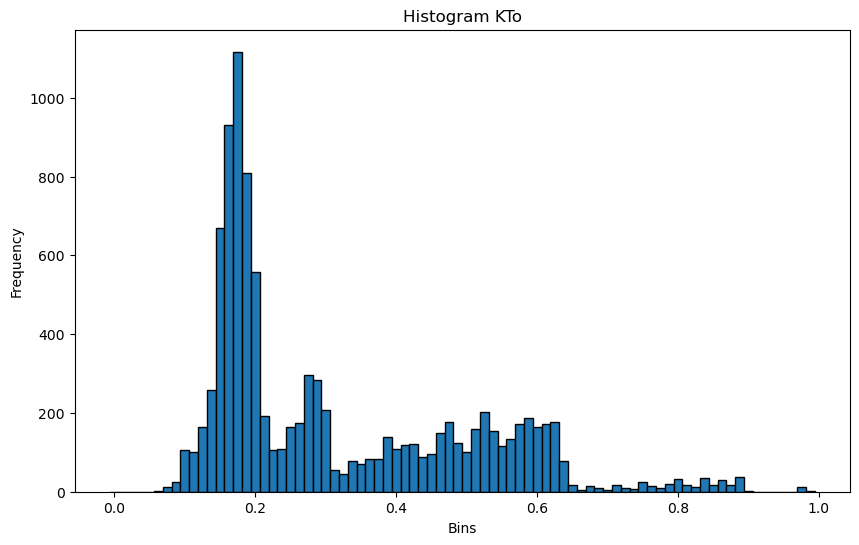

Line 54: QcTd


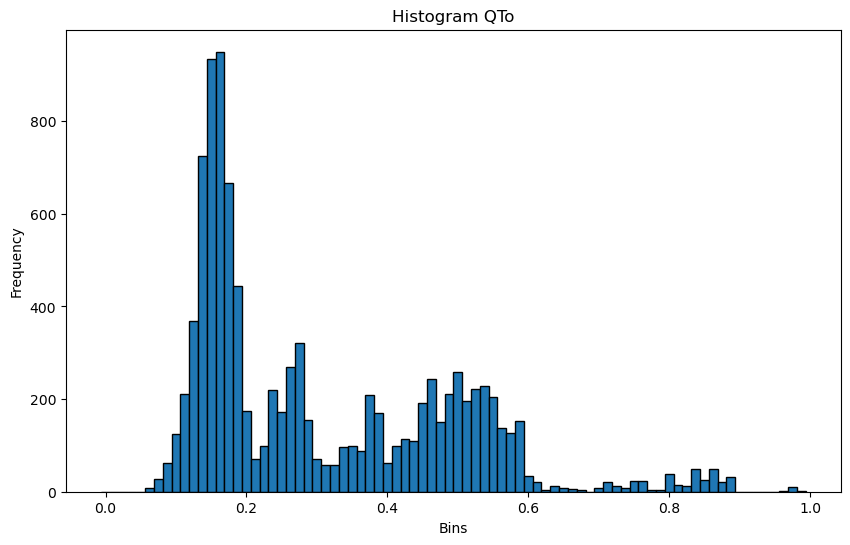

Line 55: JcTd


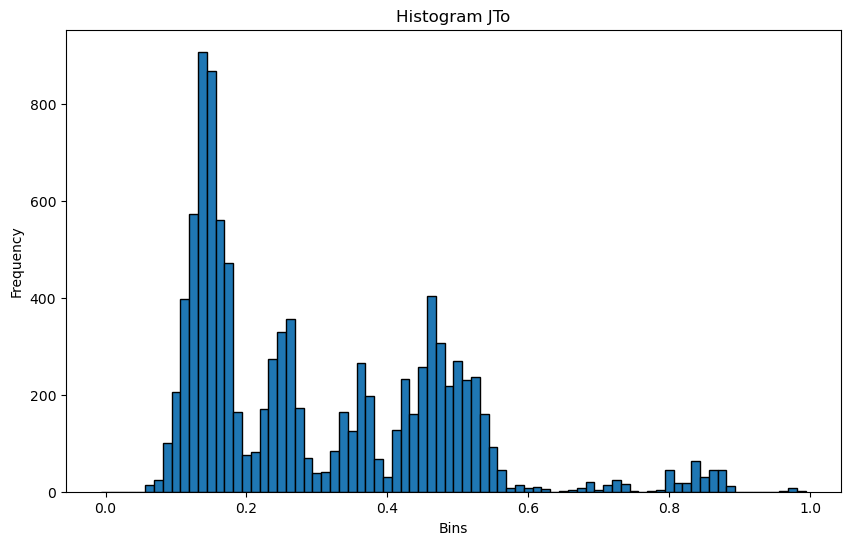

Line 56: TdTc


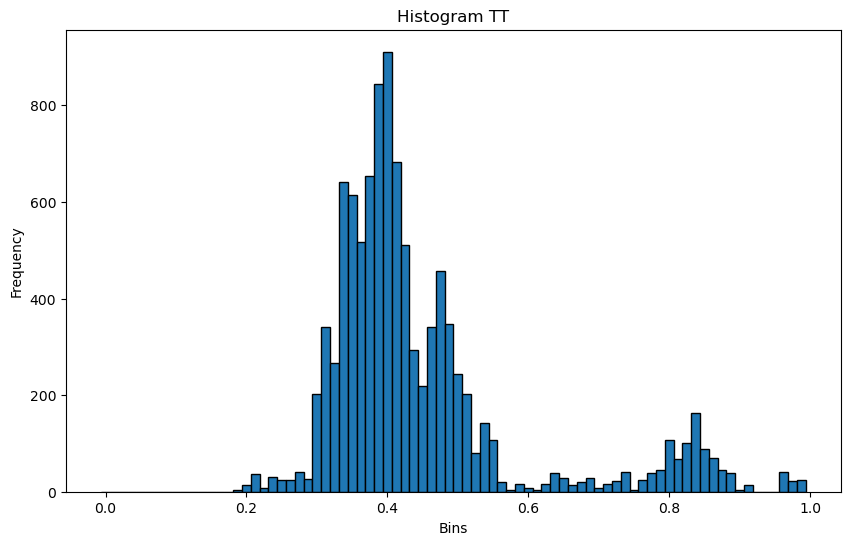

Line 57: Tc9c


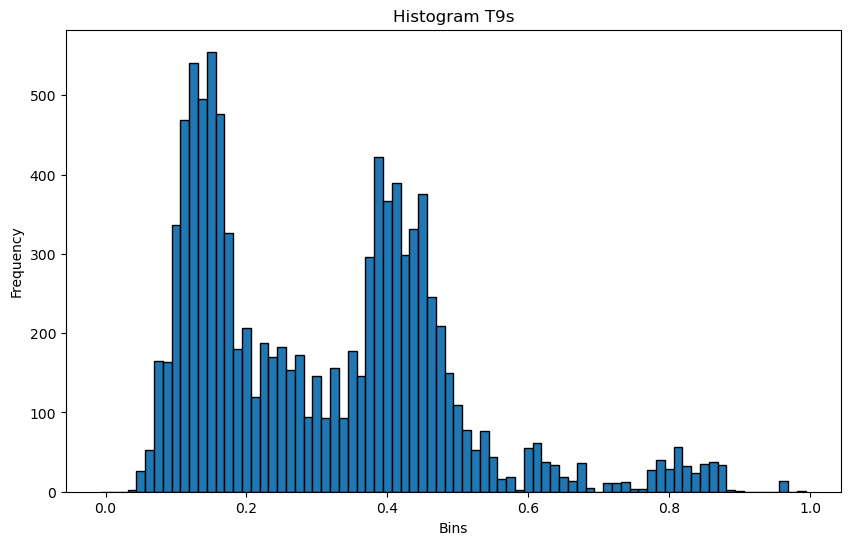

Line 58: Tc8c


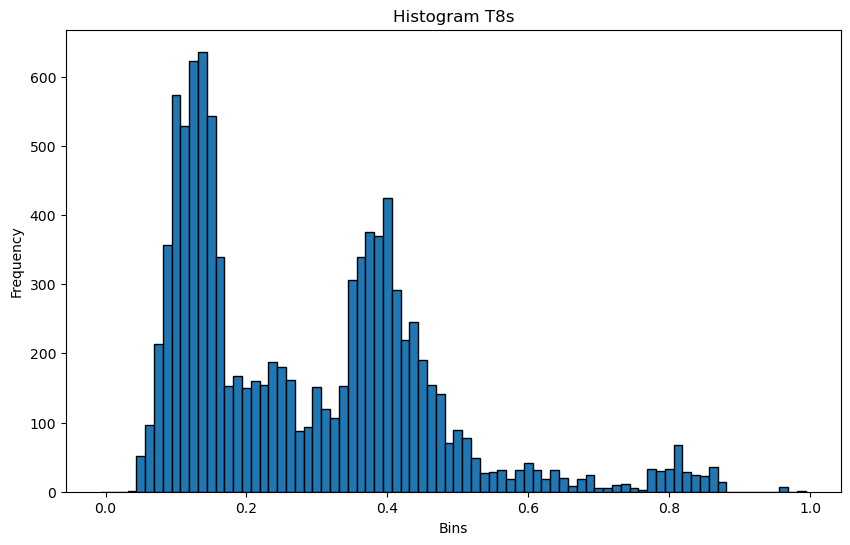

Line 59: Tc7c


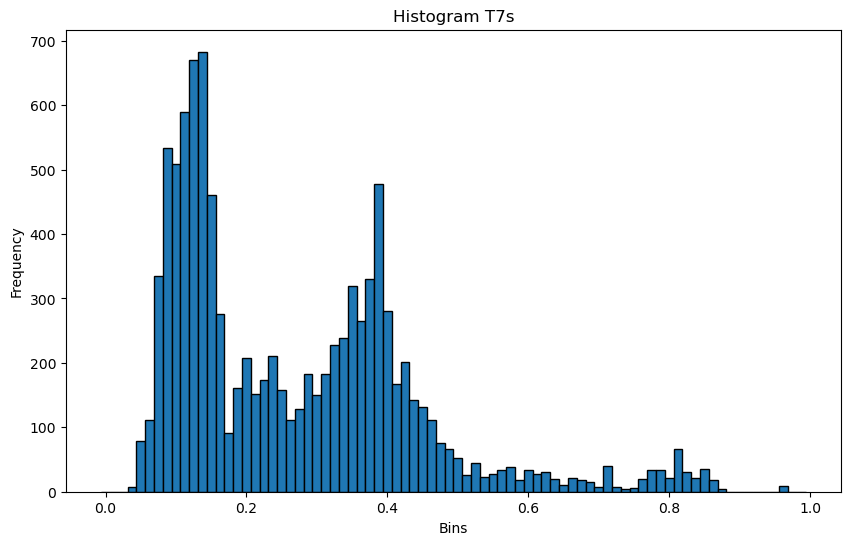

Line 60: Tc6c


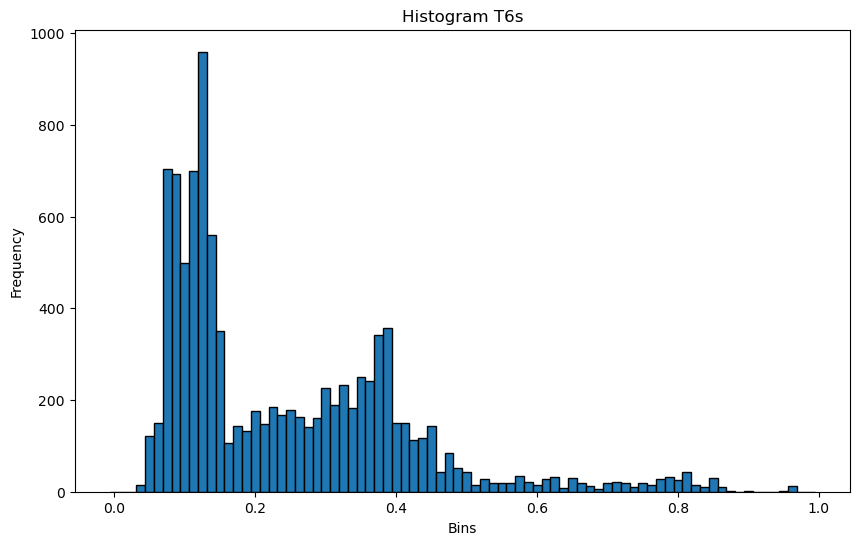

Line 61: Tc5c


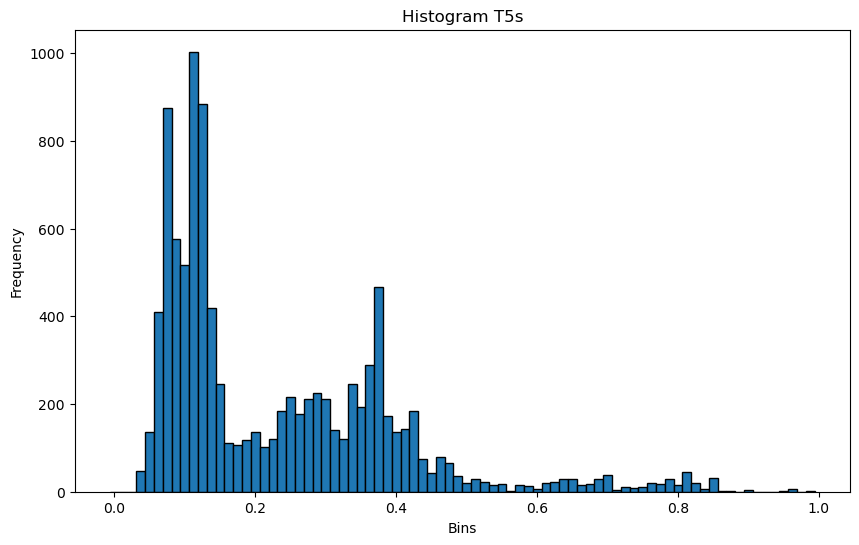

Line 62: Tc4c


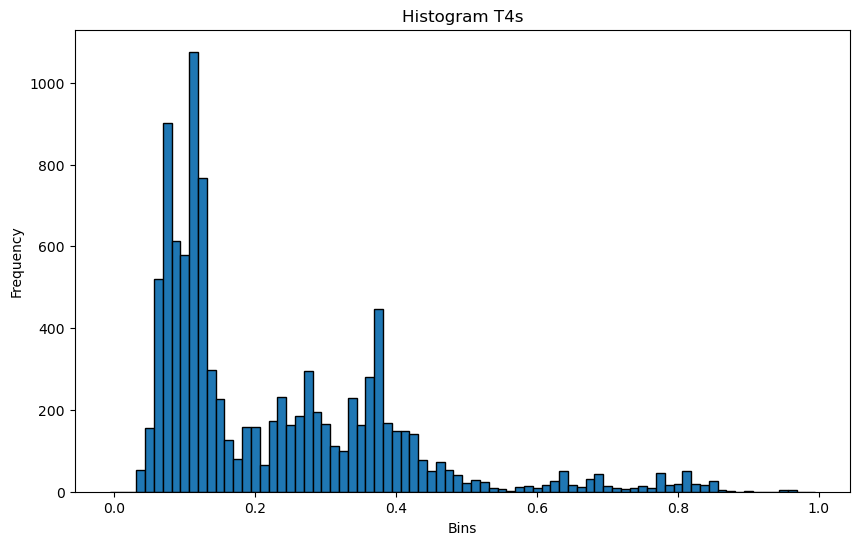

Line 63: Tc3c


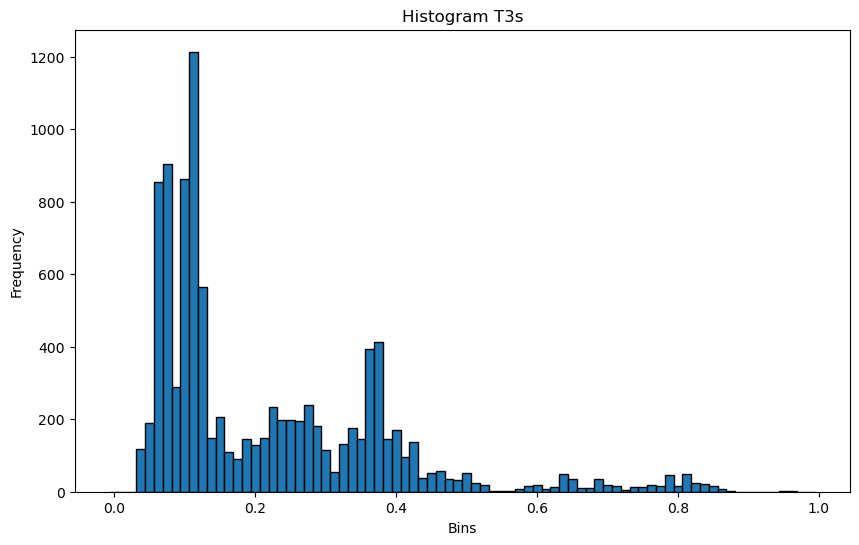

Line 64: Tc2c


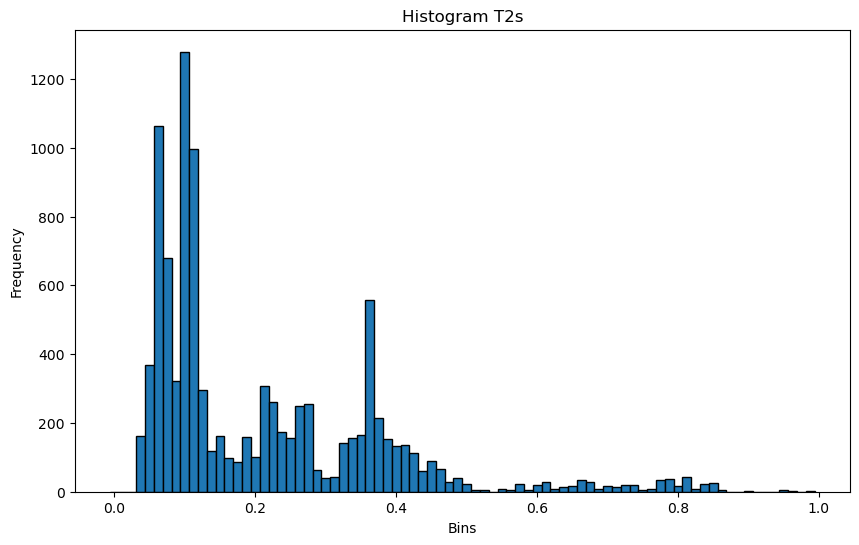

Line 65: Ac9d


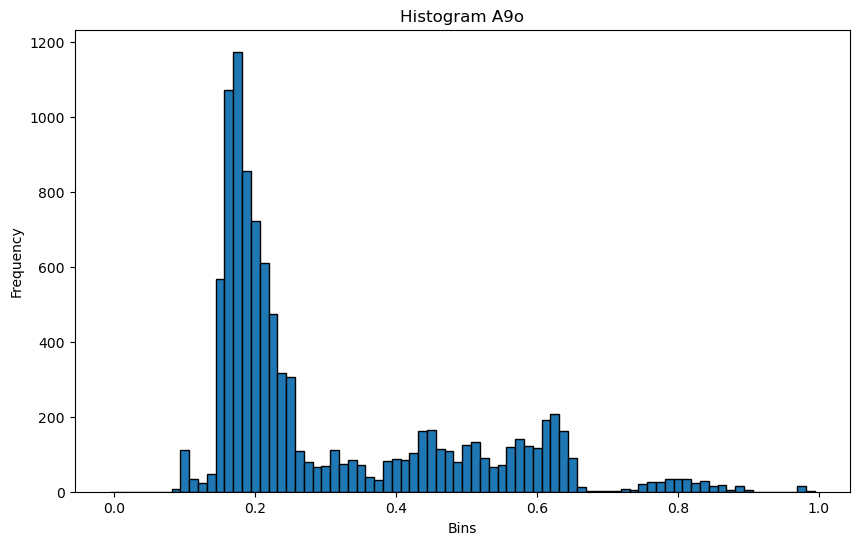

Line 66: Kc9d


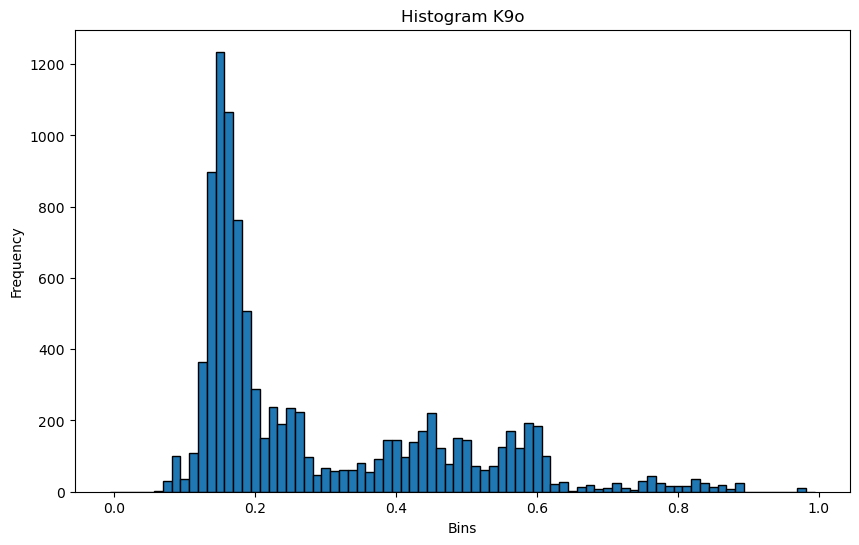

Line 67: Qc9d


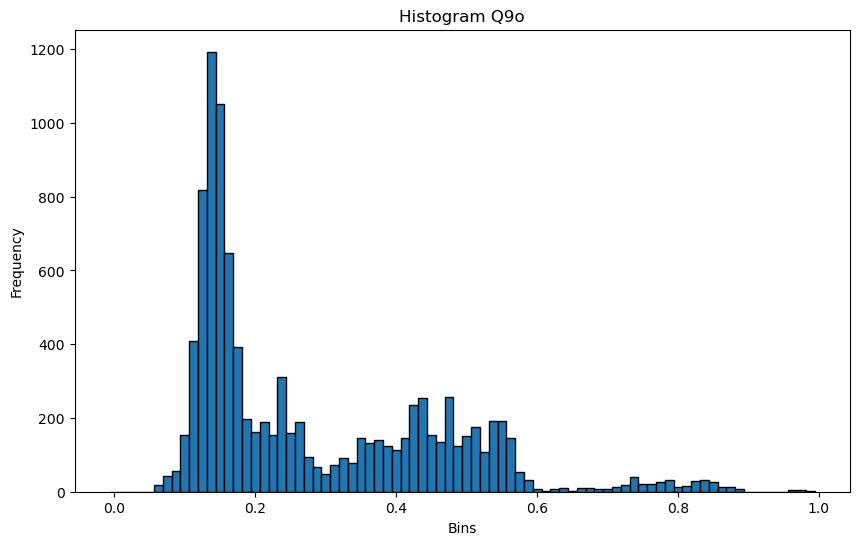

Line 68: Jc9d


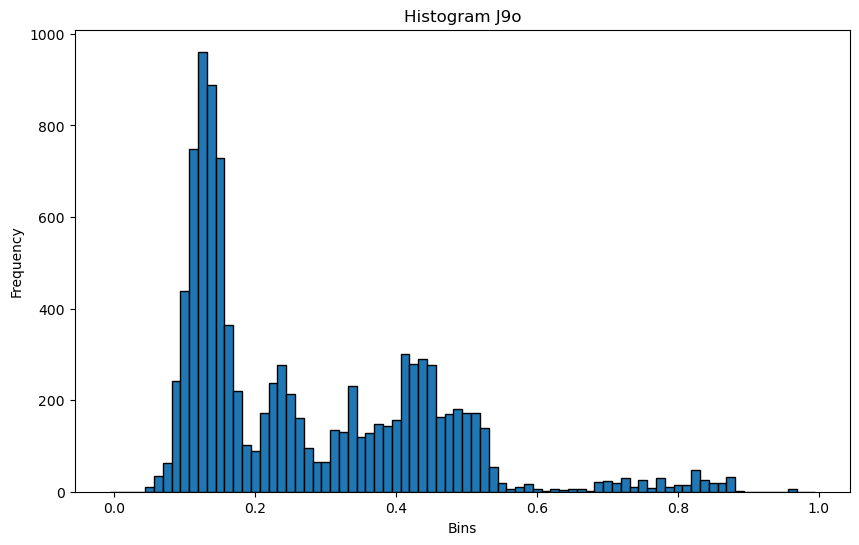

Line 69: Tc9d


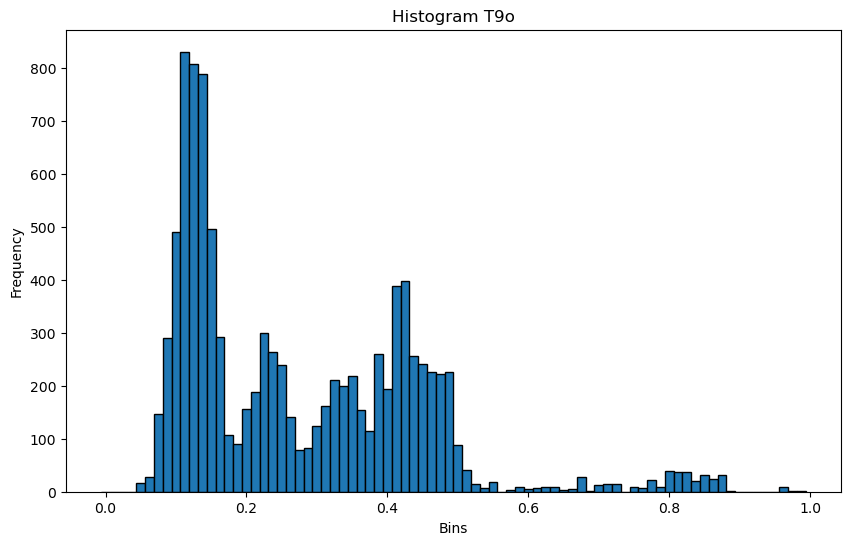

Line 70: 9d9c


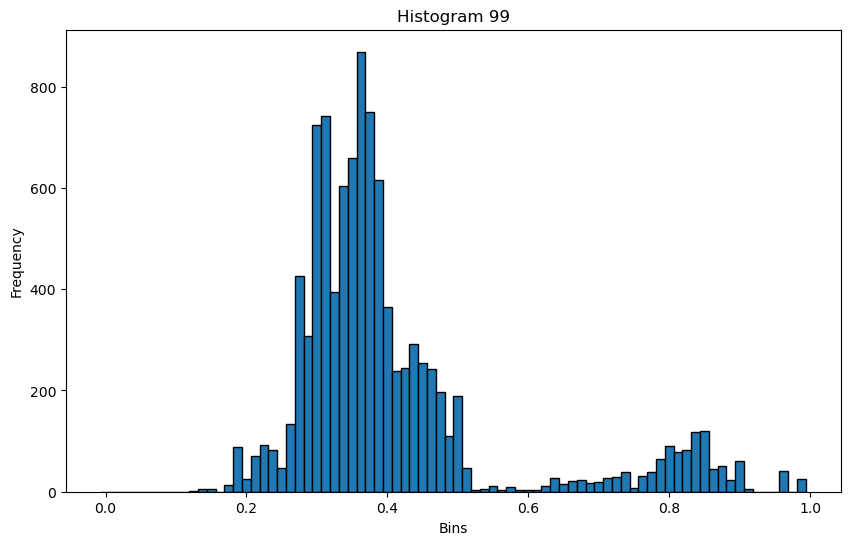

Line 71: 9c8c


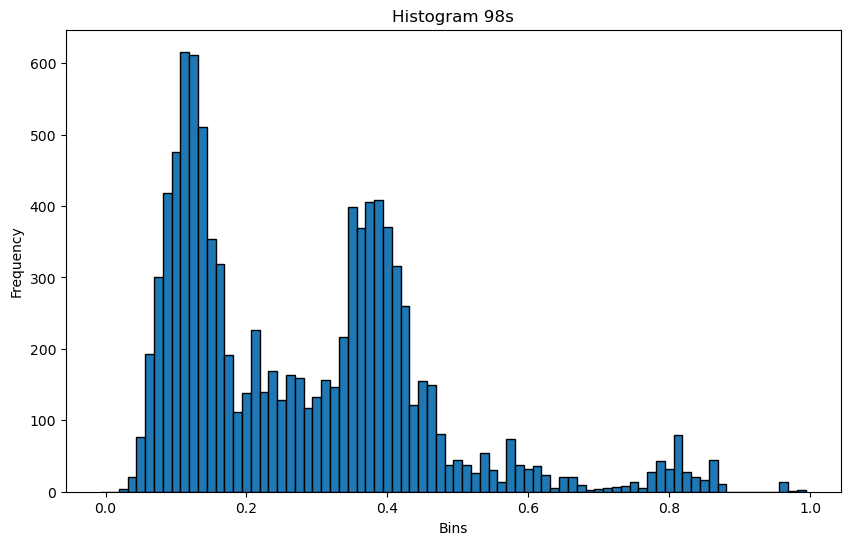

Line 72: 9c7c


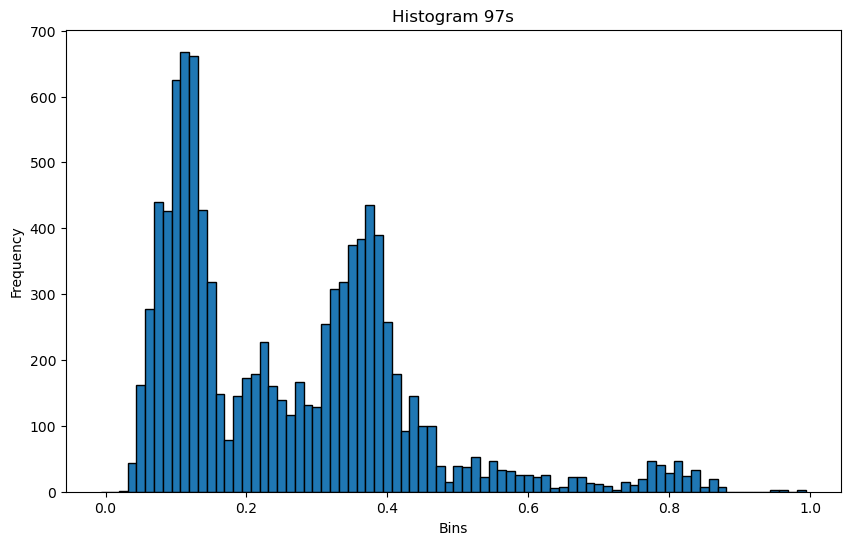

Line 73: 9c6c


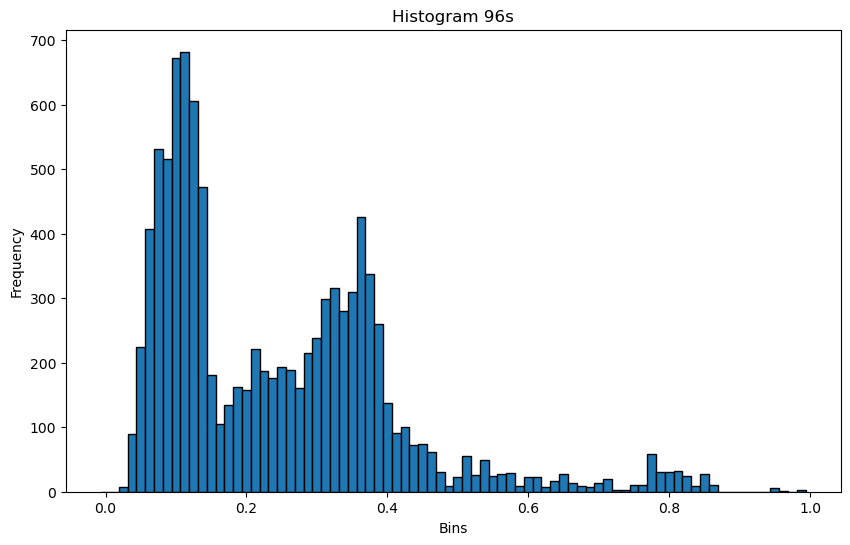

Line 74: 9c5c


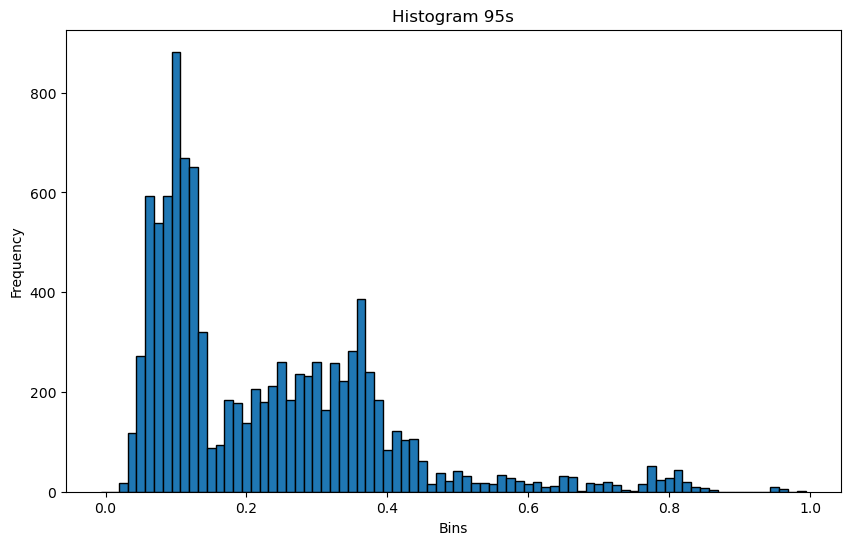

Line 75: 9c4c


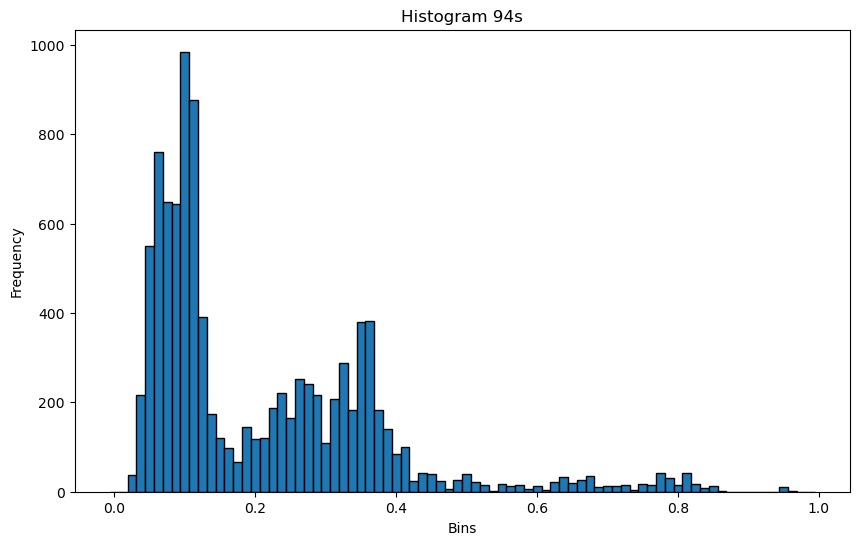

Line 76: 9c3c


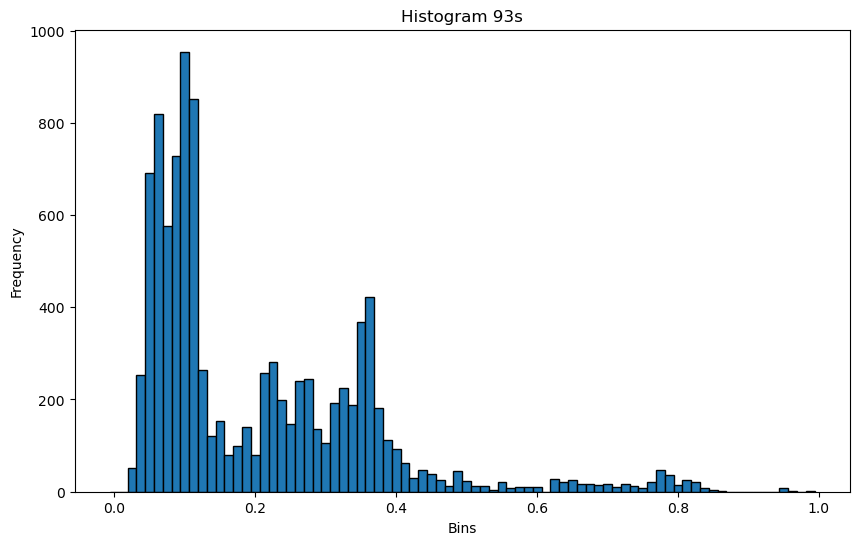

Line 77: 9c2c


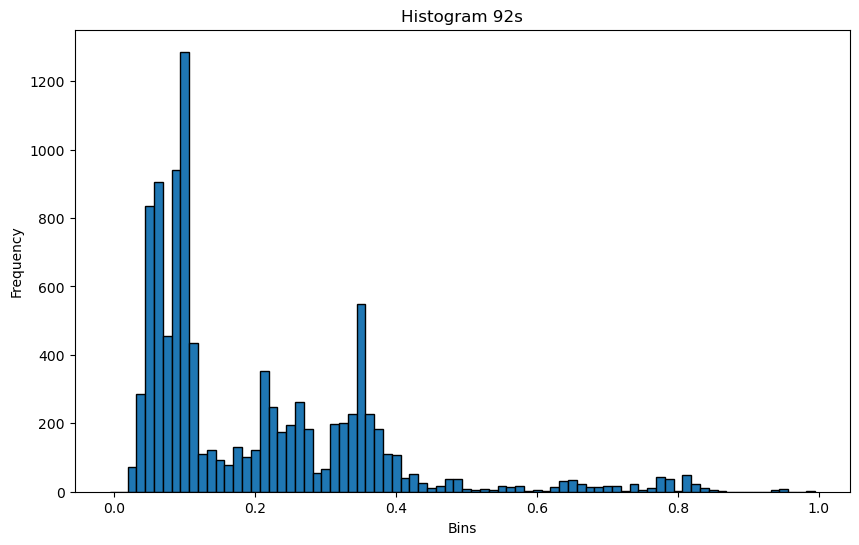

Line 78: Ac8d


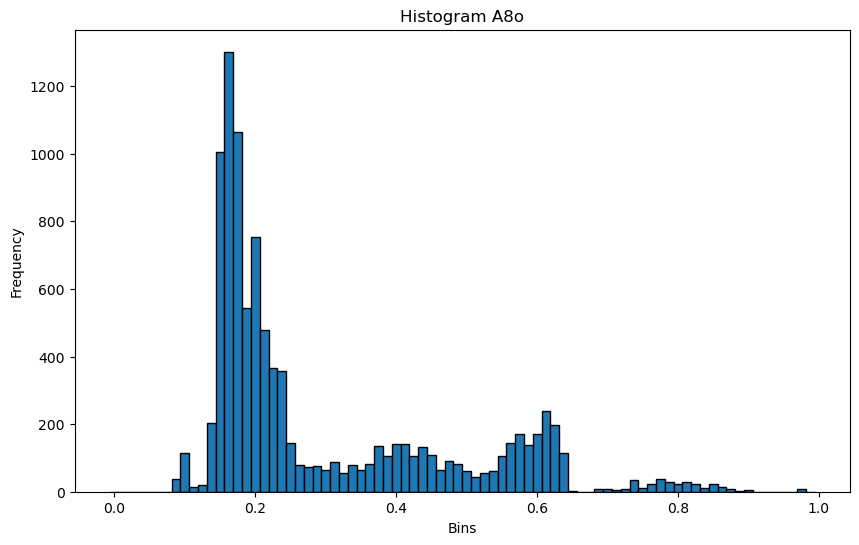

Line 79: Kc8d


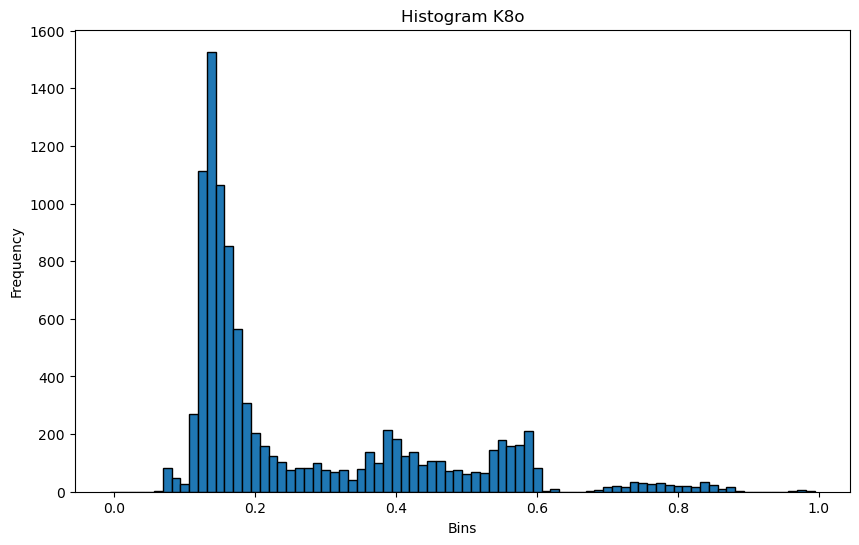

Line 80: Qc8d


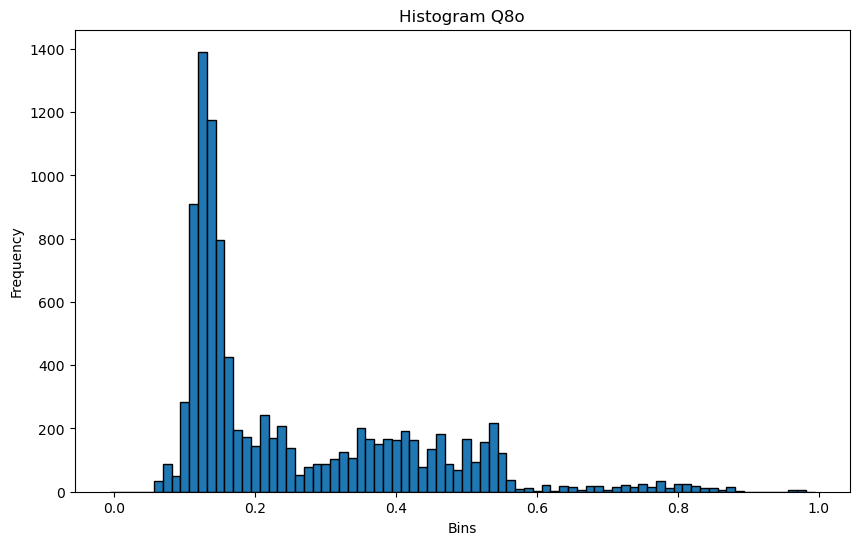

Line 81: Jc8d


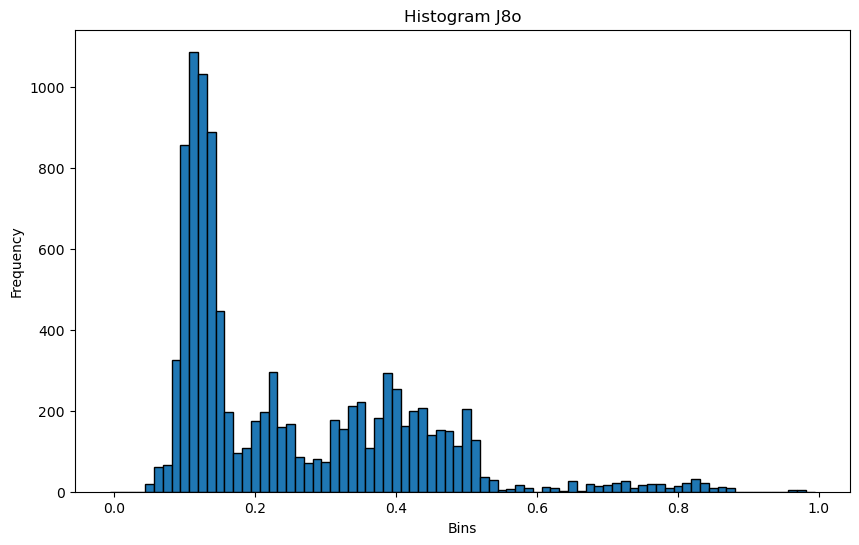

Line 82: Tc8d


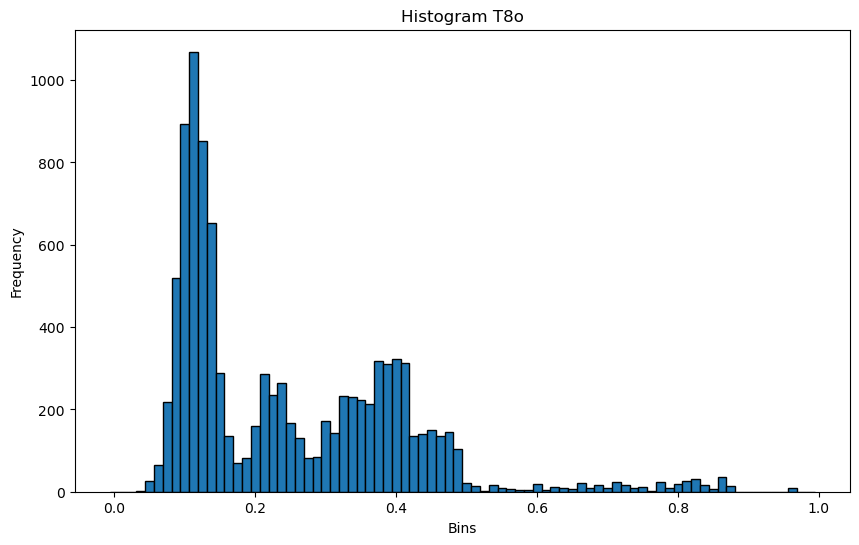

Line 83: 9c8d


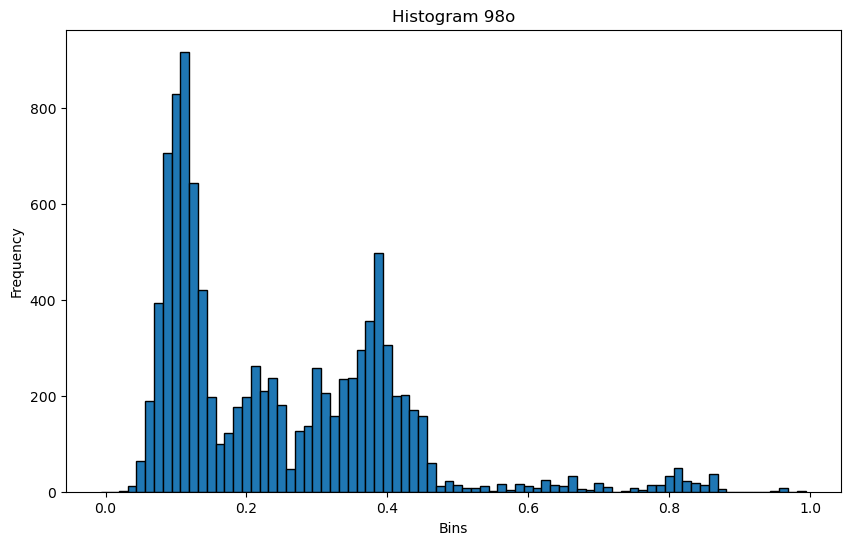

Line 84: 8d8c


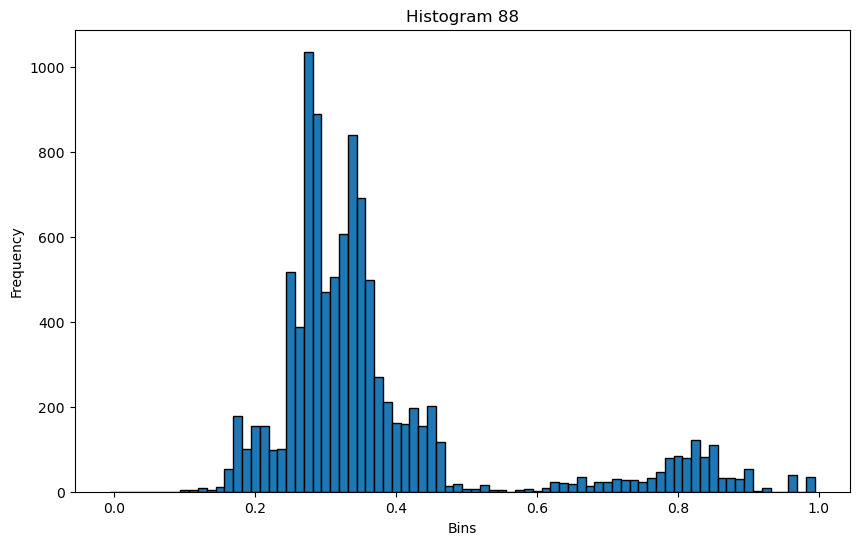

Line 85: 8c7c


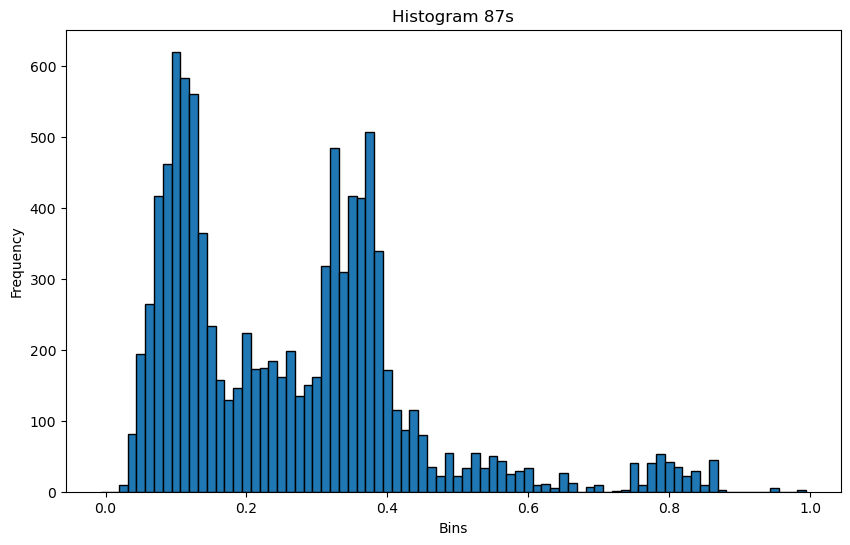

Line 86: 8c6c


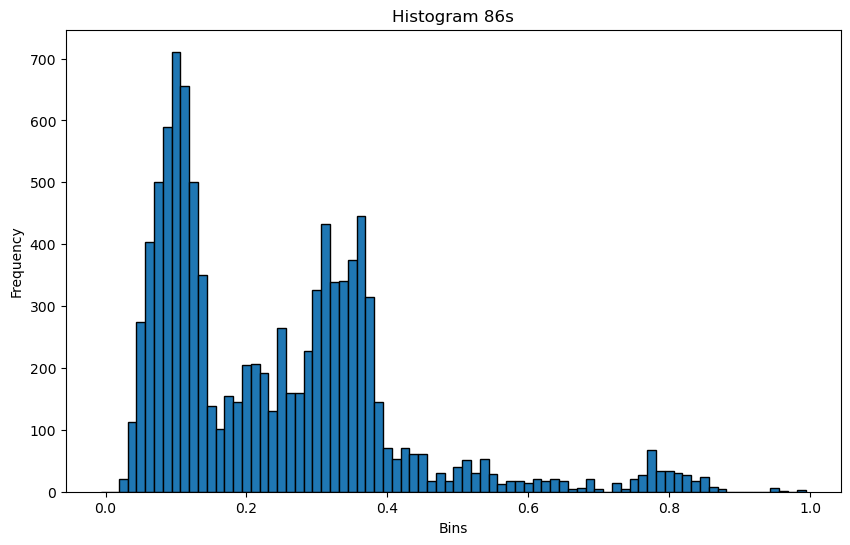

Line 87: 8c5c


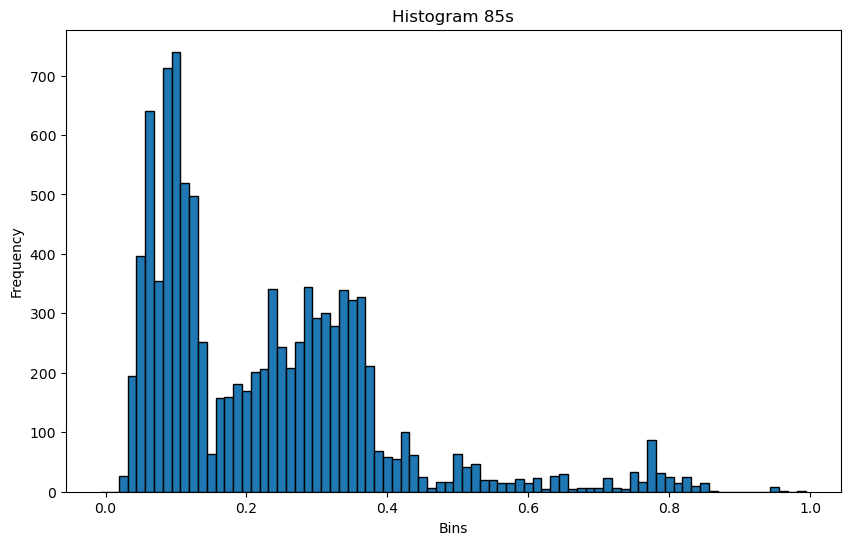

Line 88: 8c4c


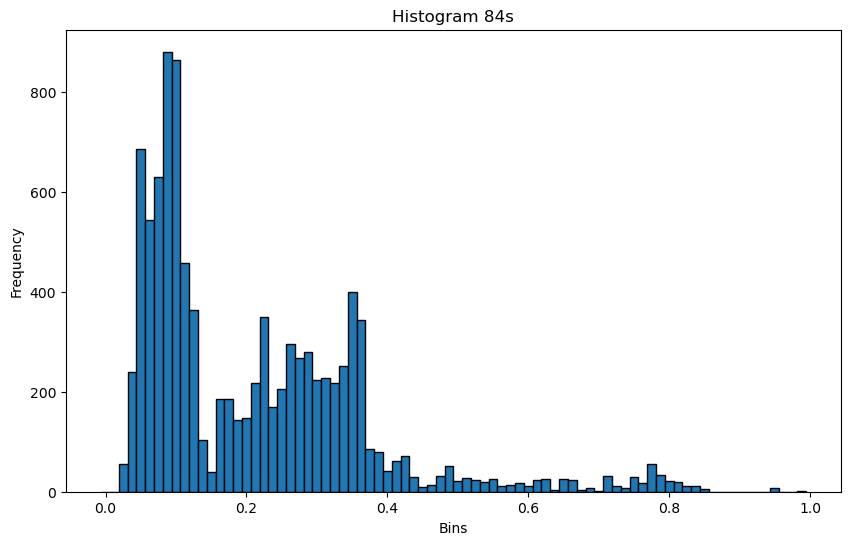

Line 89: 8c3c


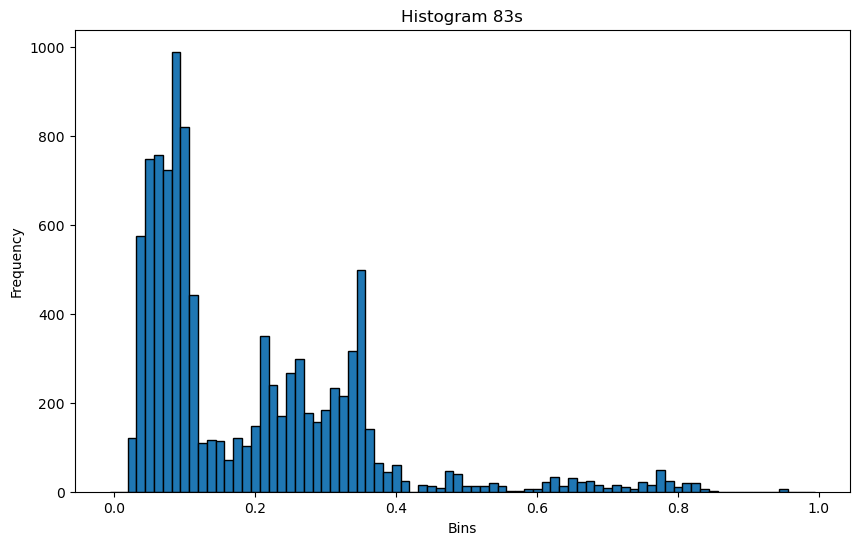

Line 90: 8c2c


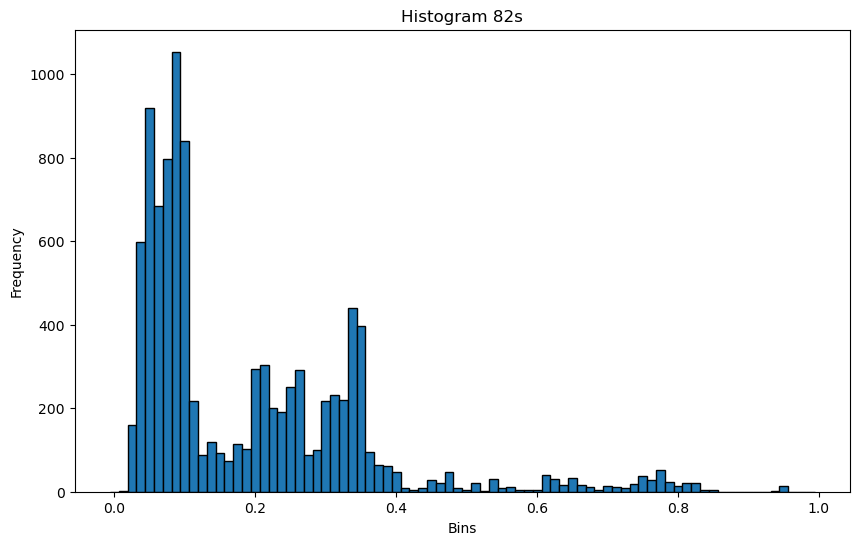

Line 91: Ac7d


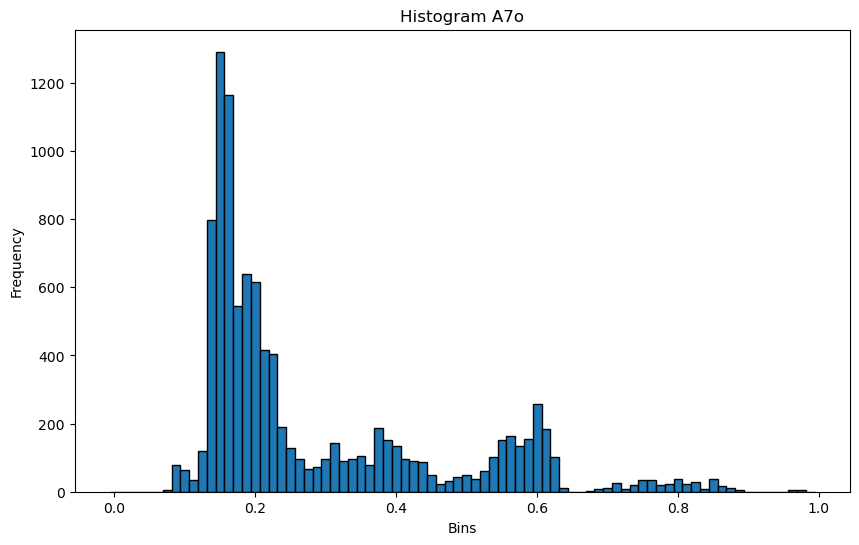

Line 92: Kc7d


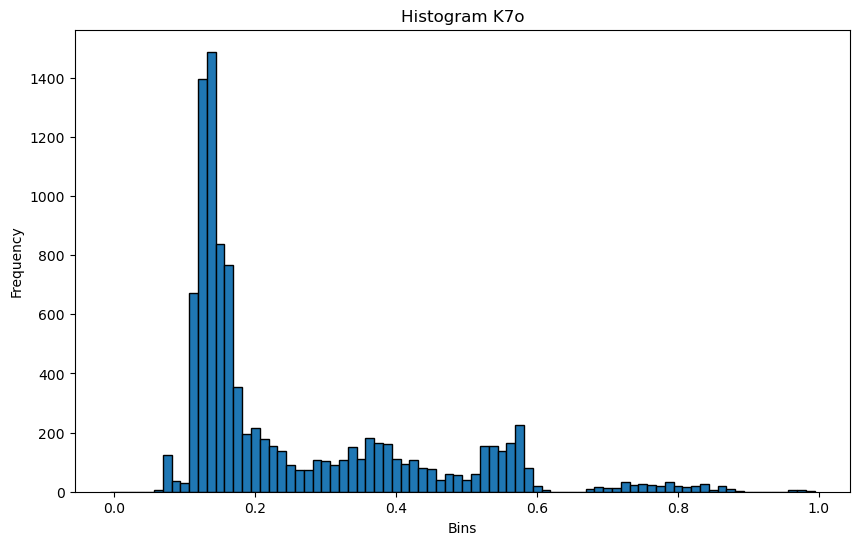

Line 93: Qc7d


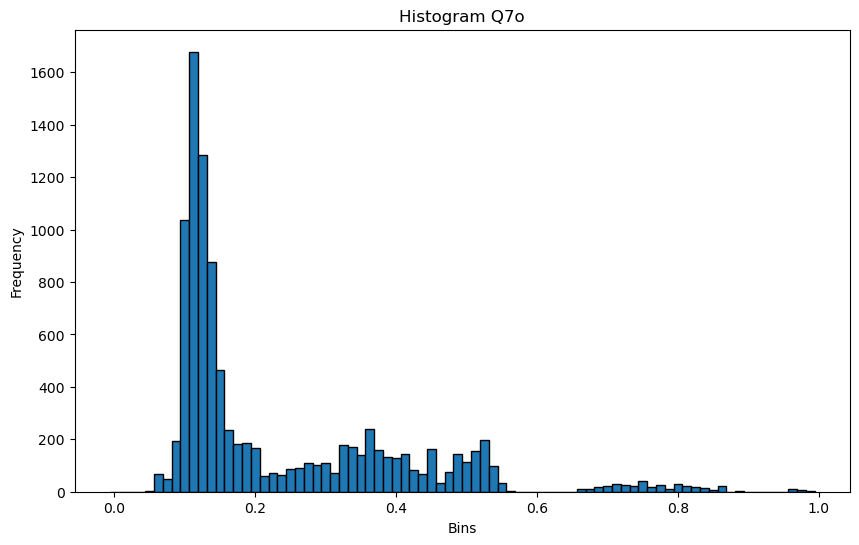

Line 94: Jc7d


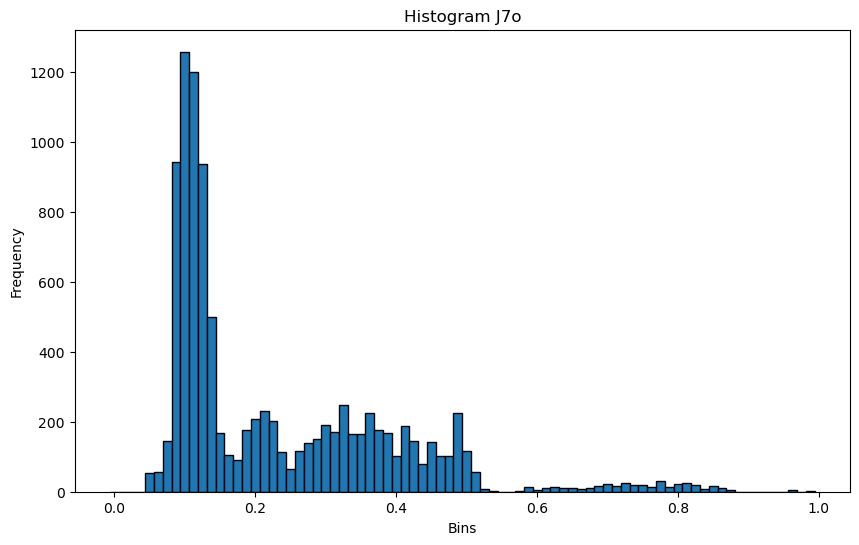

Line 95: Tc7d


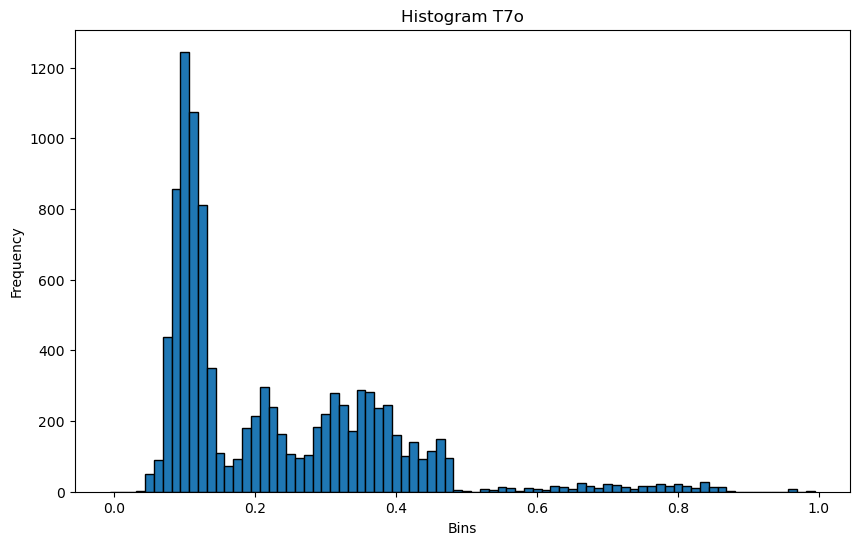

Line 96: 9c7d


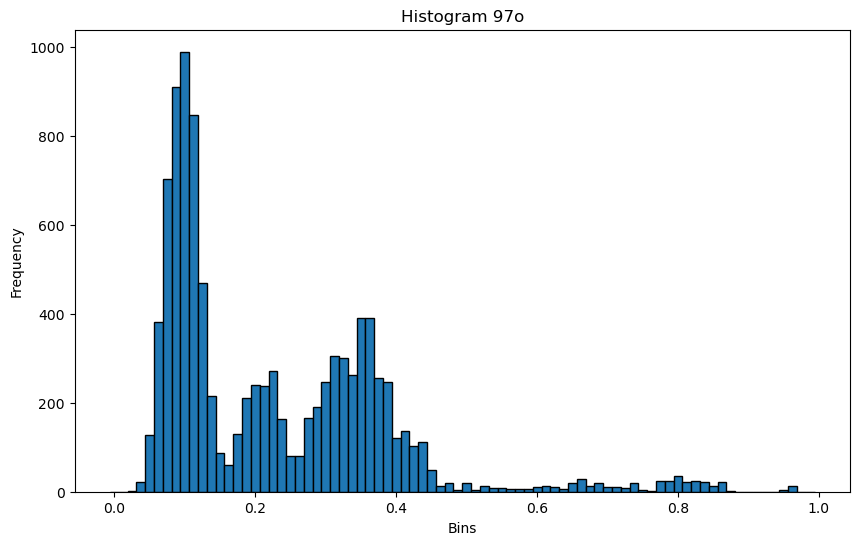

Line 97: 8c7d


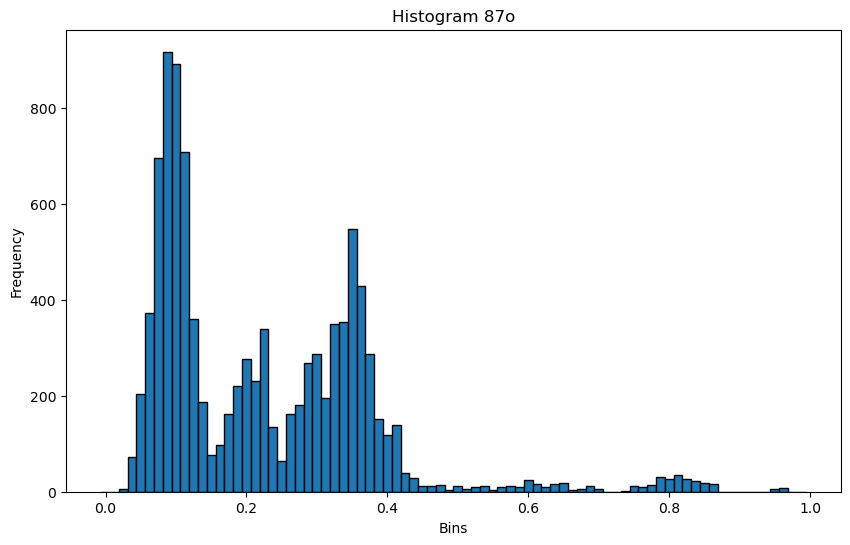

Line 98: 7d7c


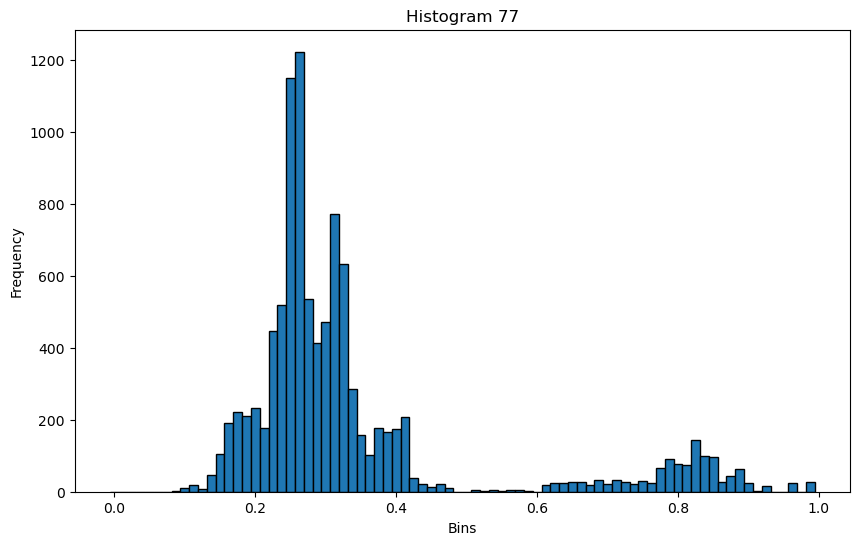

Line 99: 7c6c


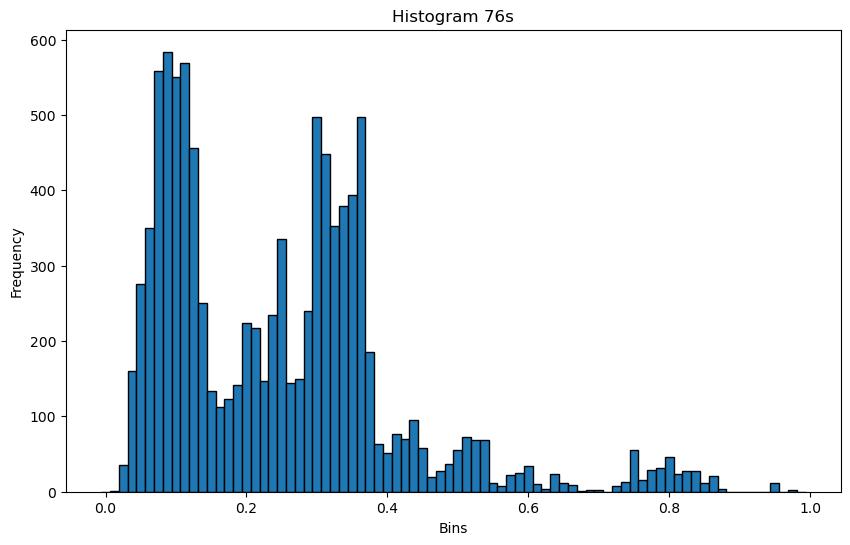

Line 100: 7c5c


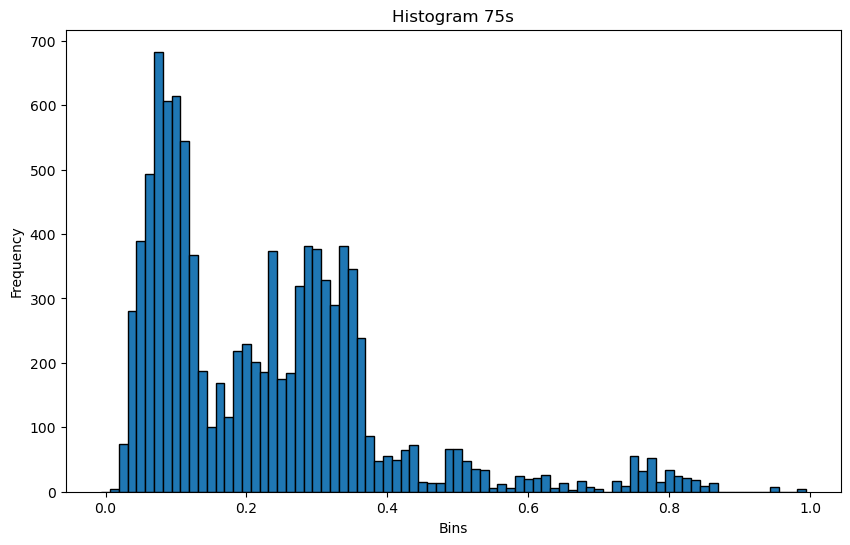

Line 101: 7c4c


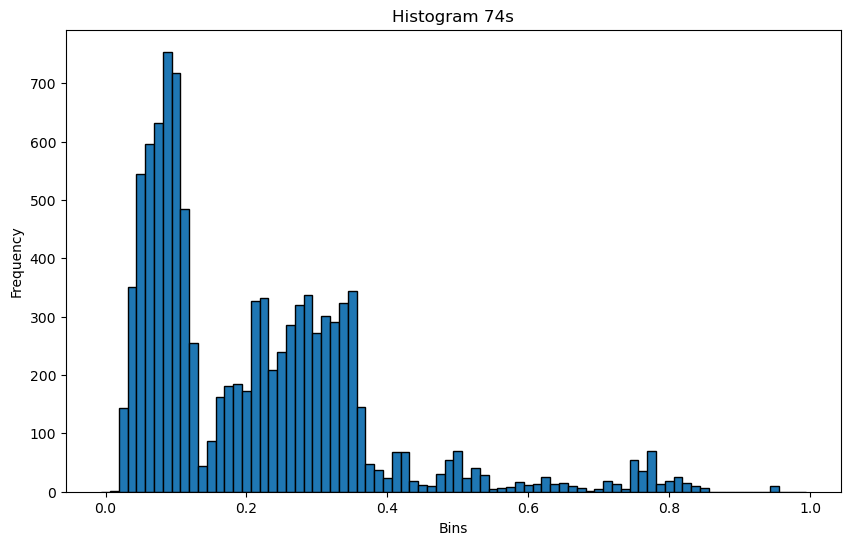

Line 102: 7c3c


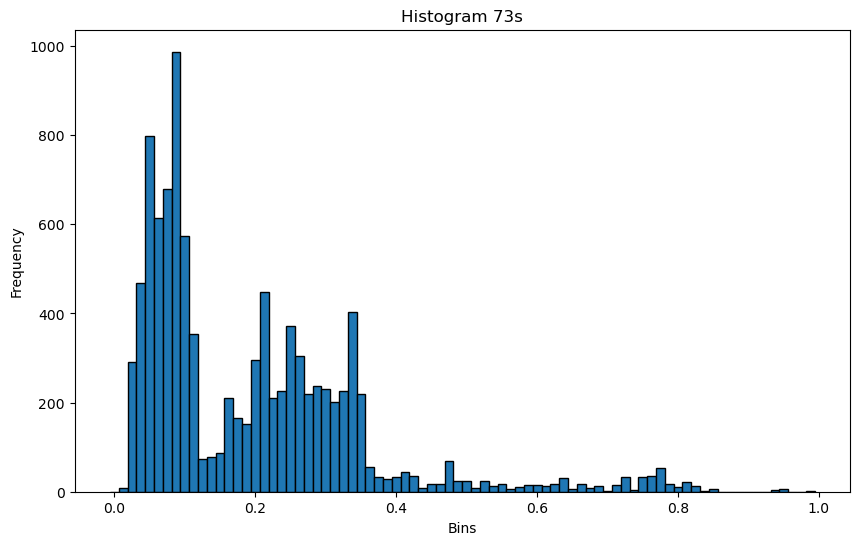

Line 103: 7c2c


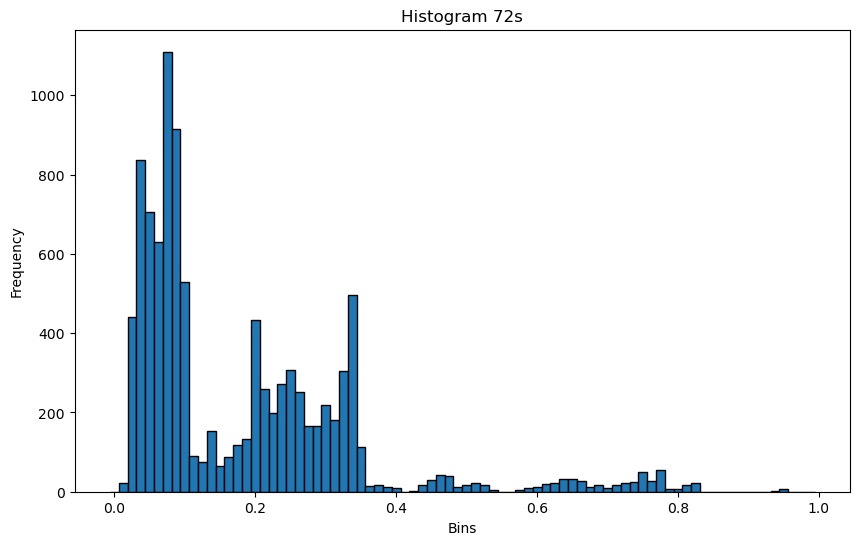

Line 104: Ac6d


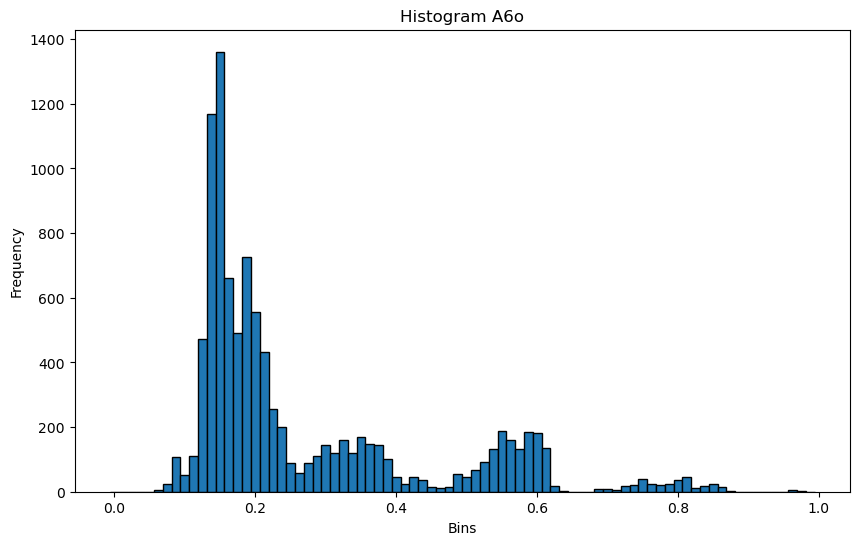

Line 105: Kc6d


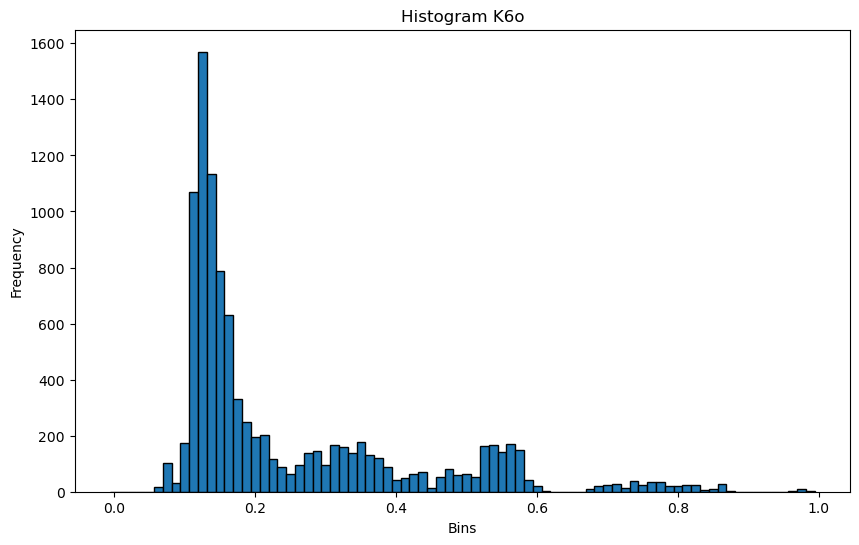

Line 106: Qc6d


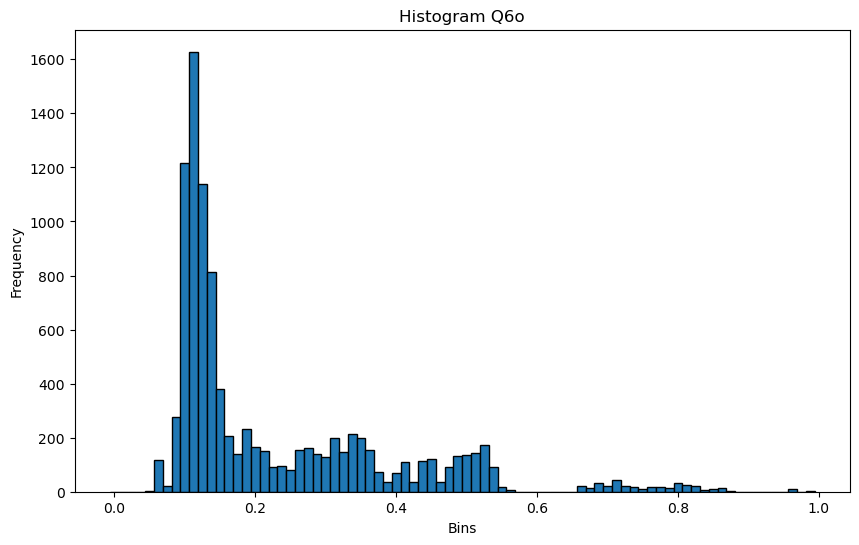

Line 107: Jc6d


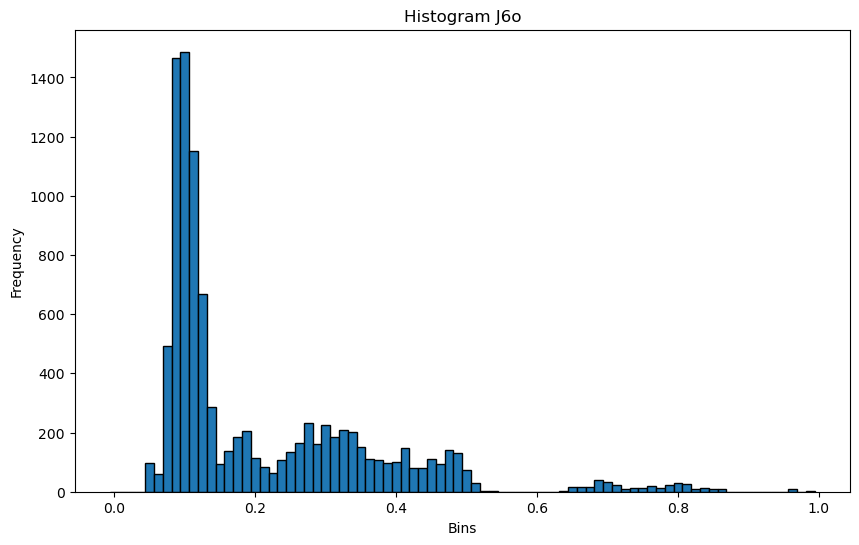

Line 108: Tc6d


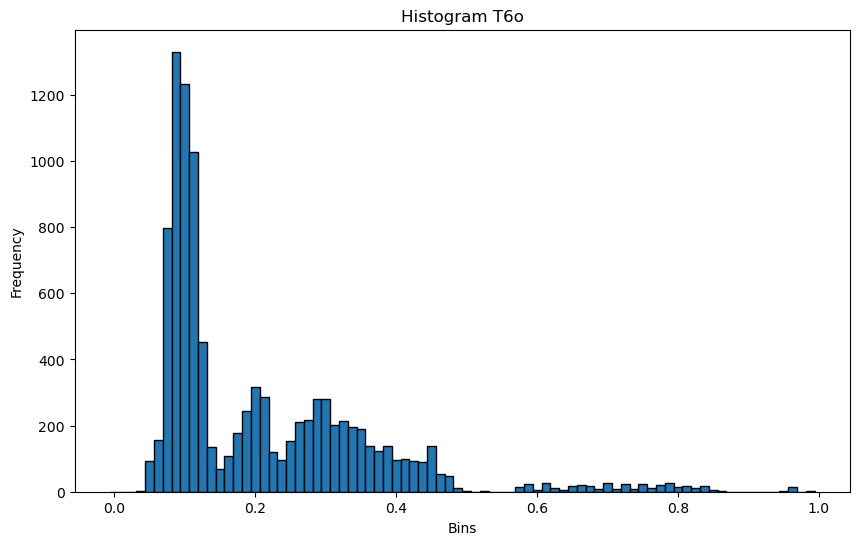

Line 109: 9c6d


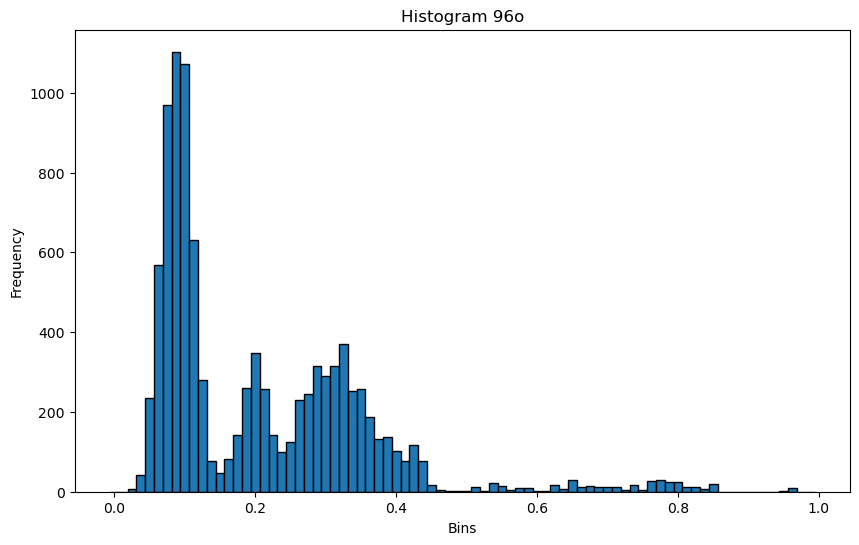

Line 110: 8c6d


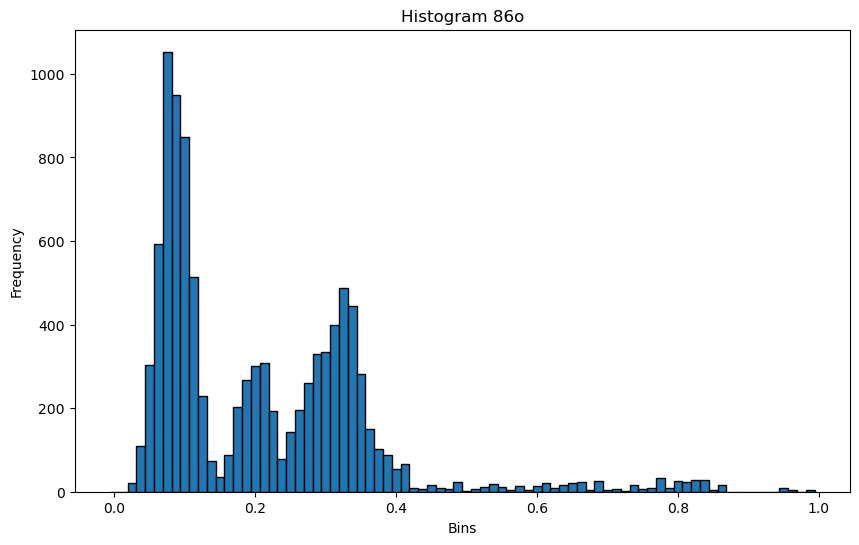

Line 111: 7c6d


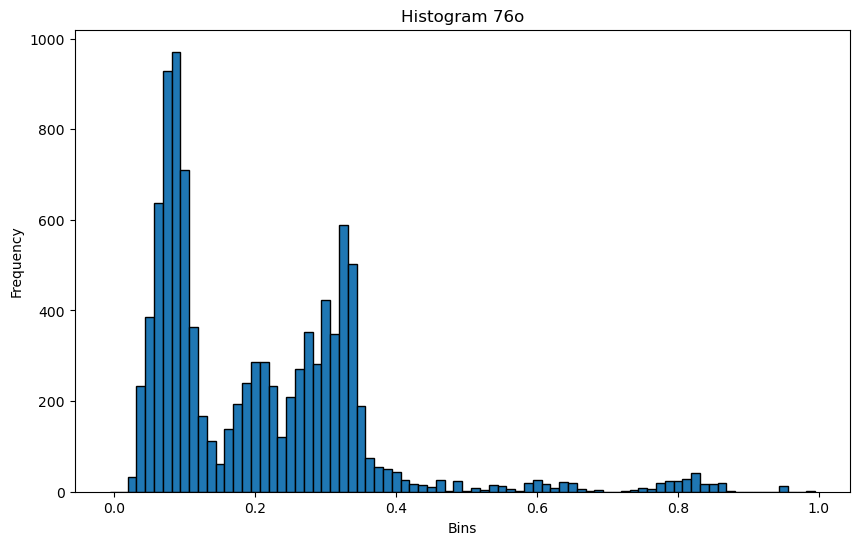

Line 112: 6d6c


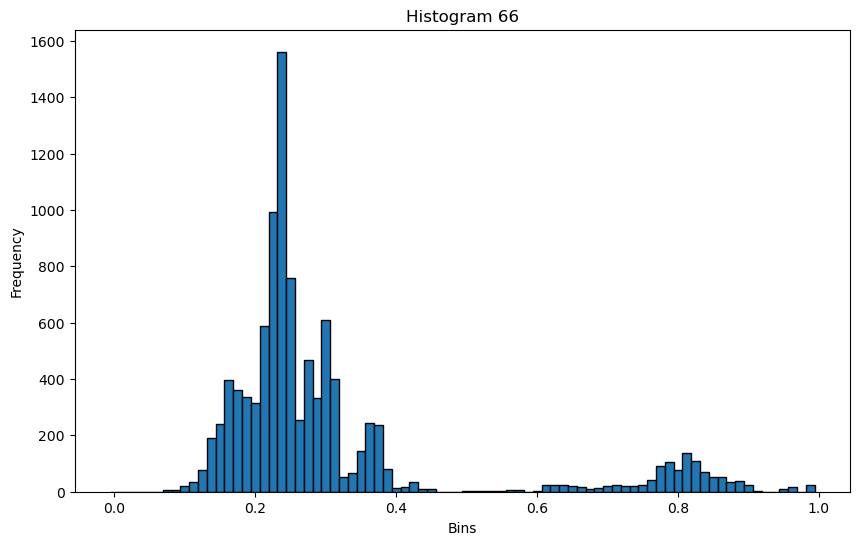

Line 113: 6c5c


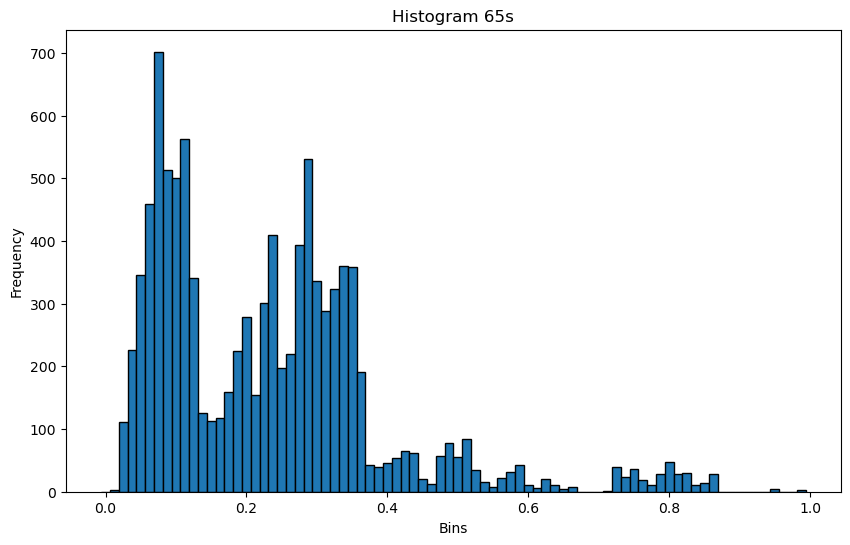

Line 114: 6c4c


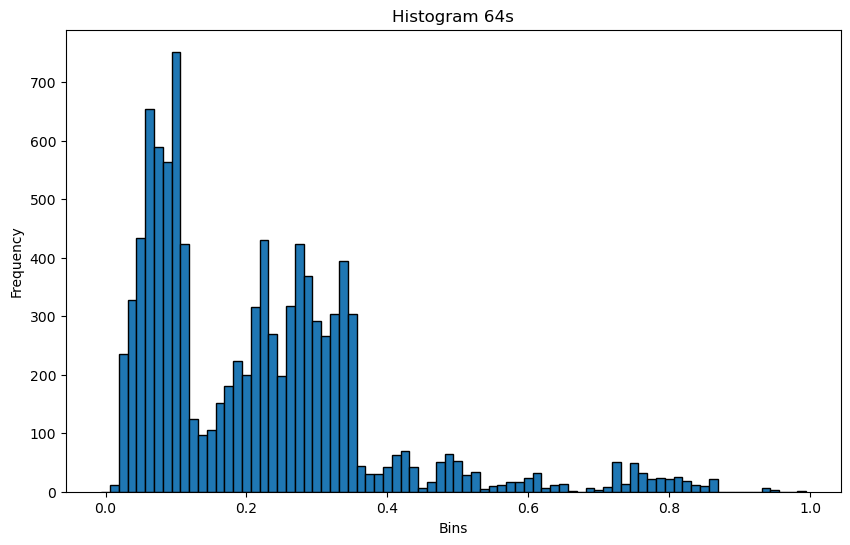

Line 115: 6c3c


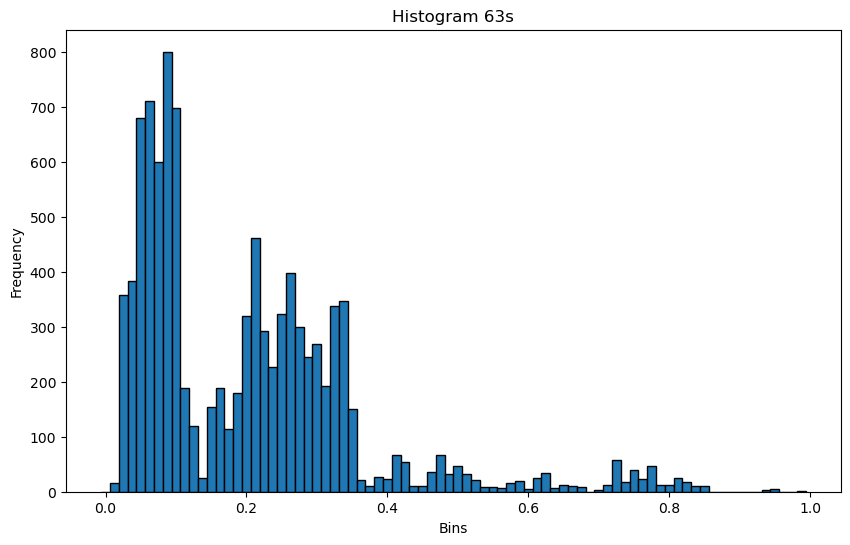

Line 116: 6c2c


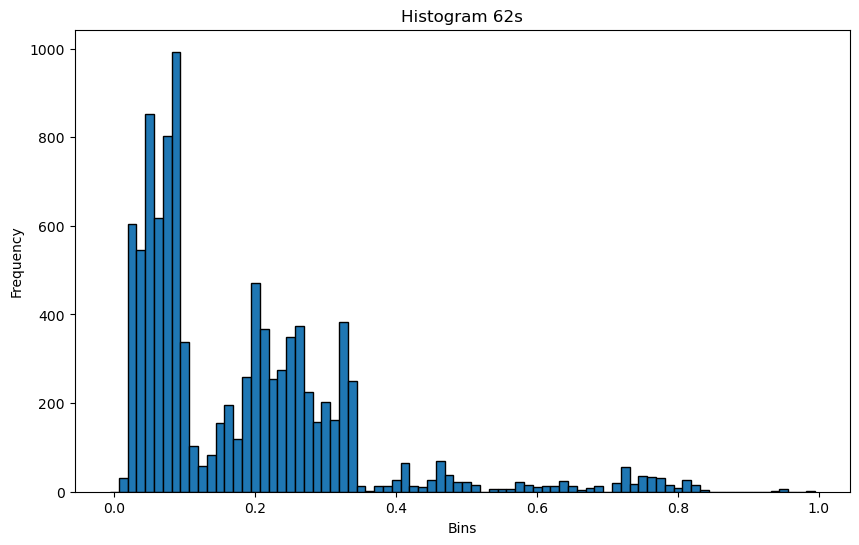

Line 117: Ac5d


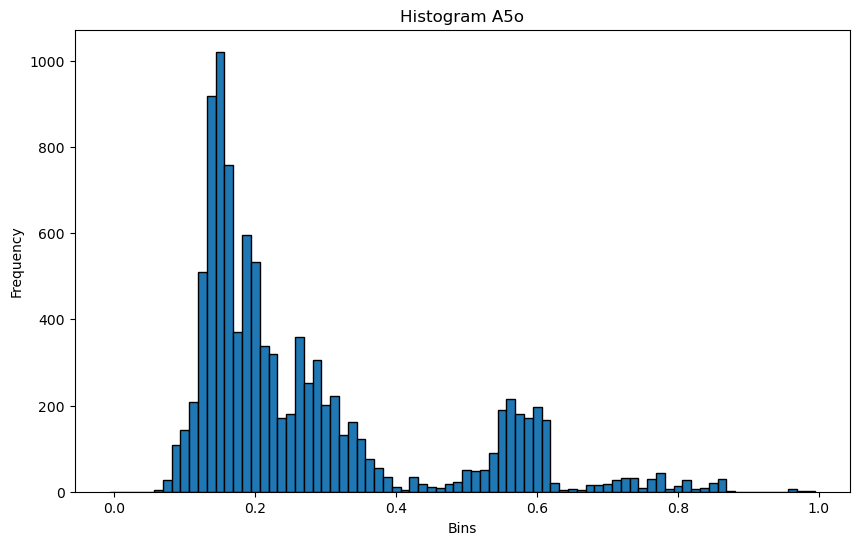

Line 118: Kc5d


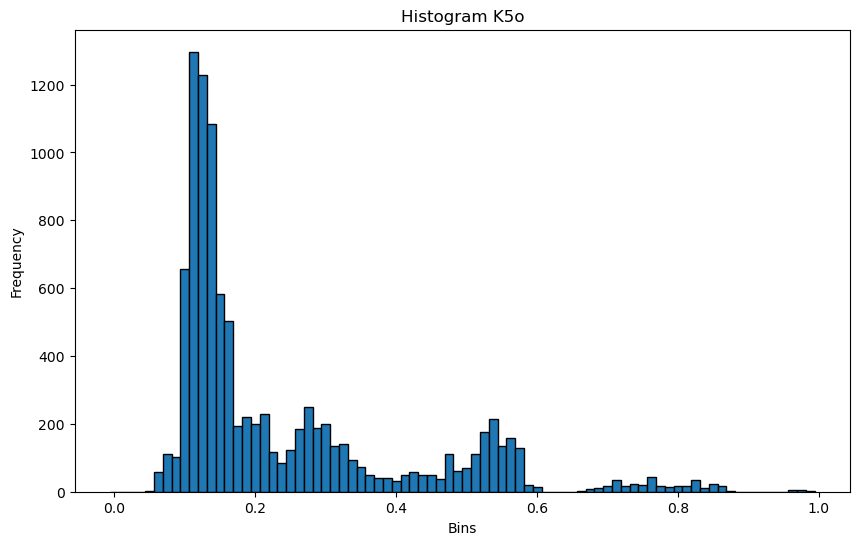

Line 119: Qc5d


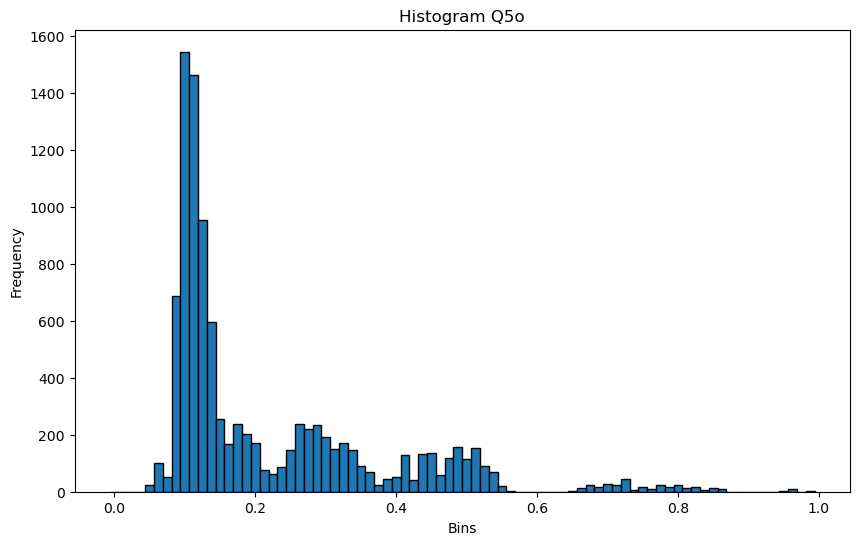

Line 120: Jc5d


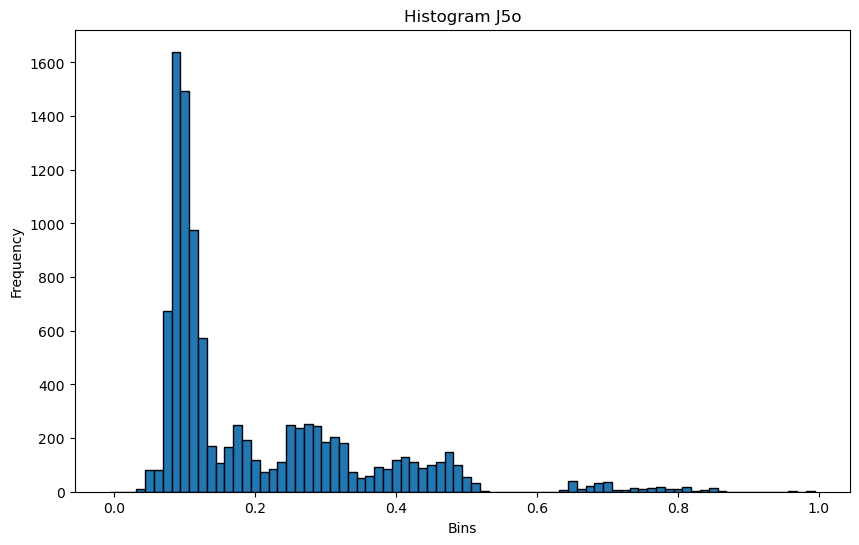

Line 121: Tc5d


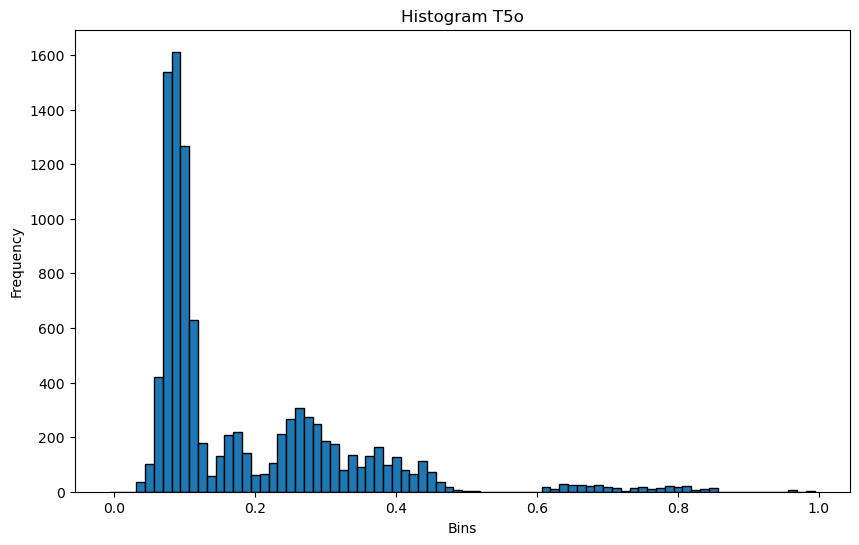

Line 122: 9c5d


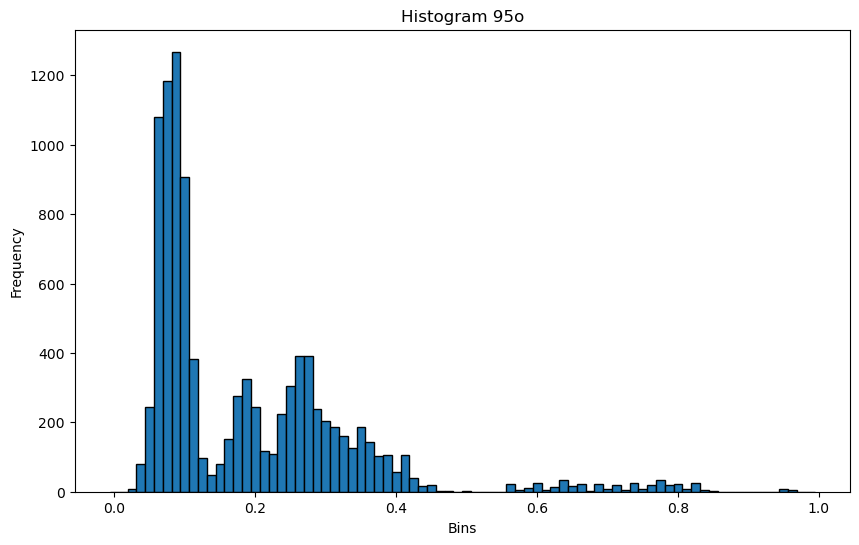

Line 123: 8c5d


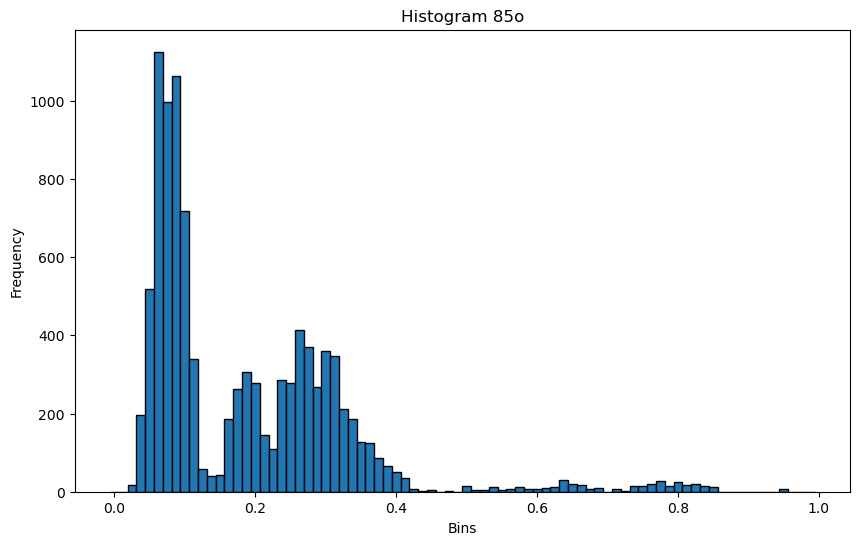

Line 124: 7c5d


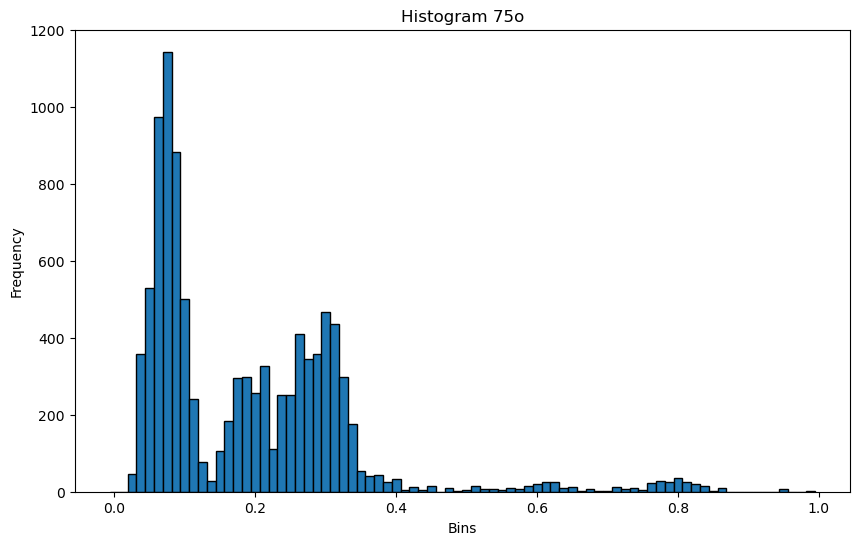

Line 125: 6c5d


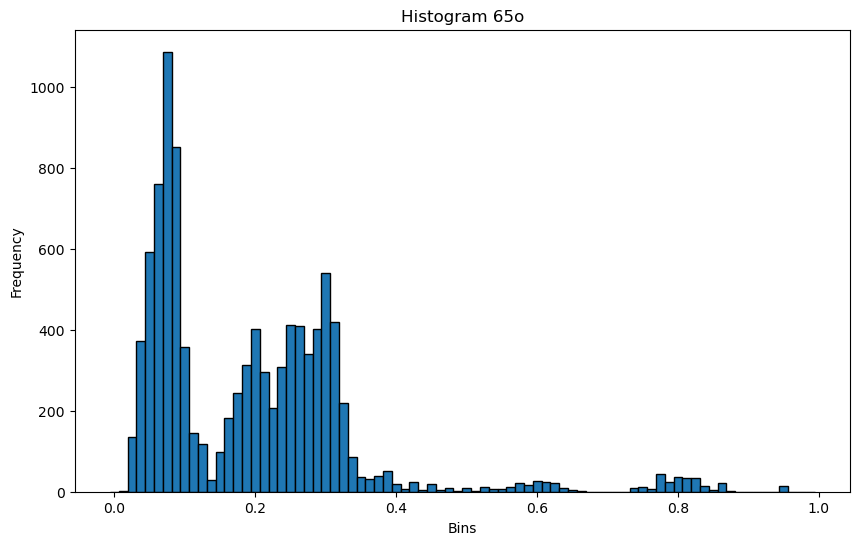

Line 126: 5d5c


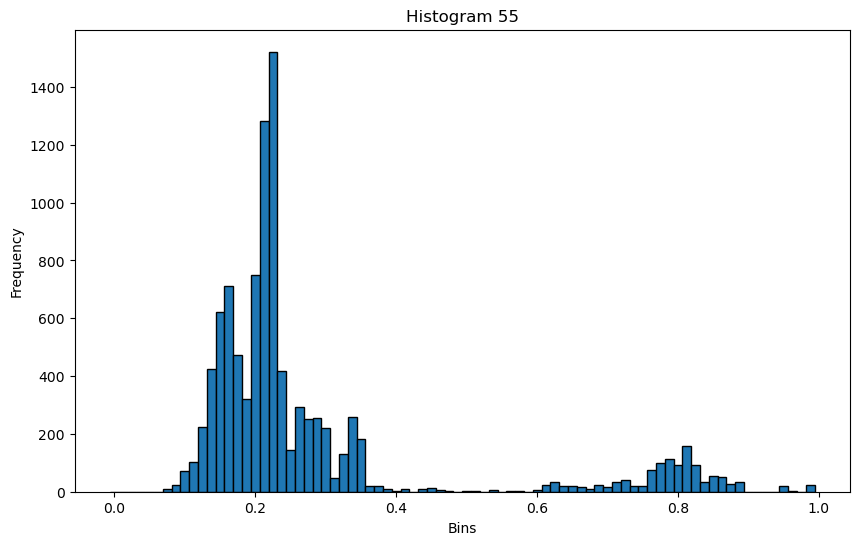

Line 127: 5c4c


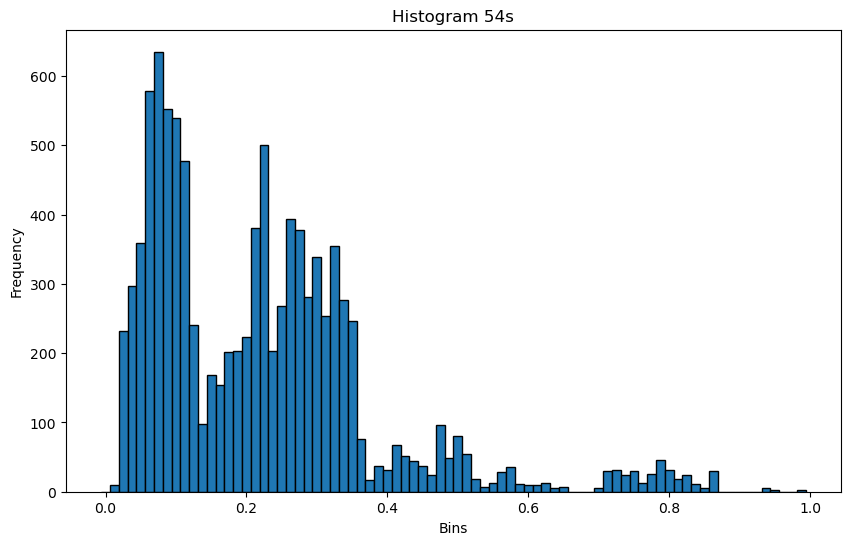

Line 128: 5c3c


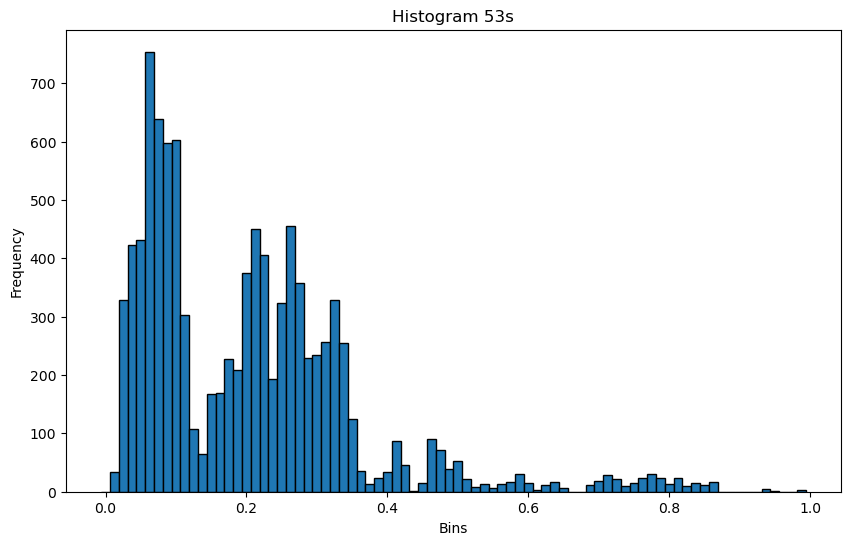

Line 129: 5c2c


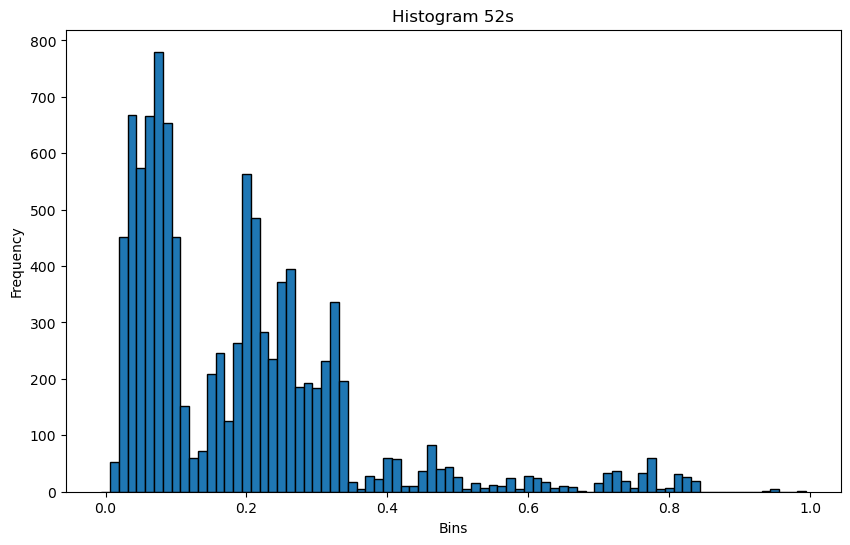

Line 130: Ac4d


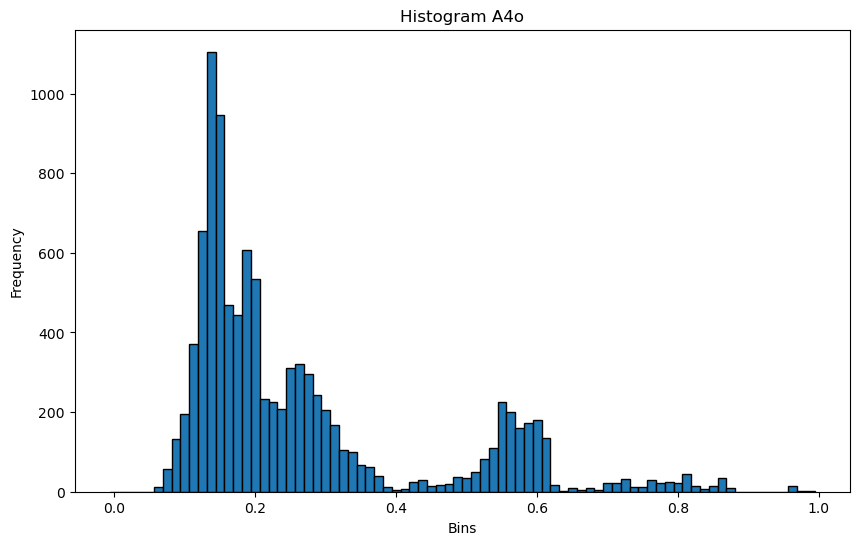

Line 131: Kc4d


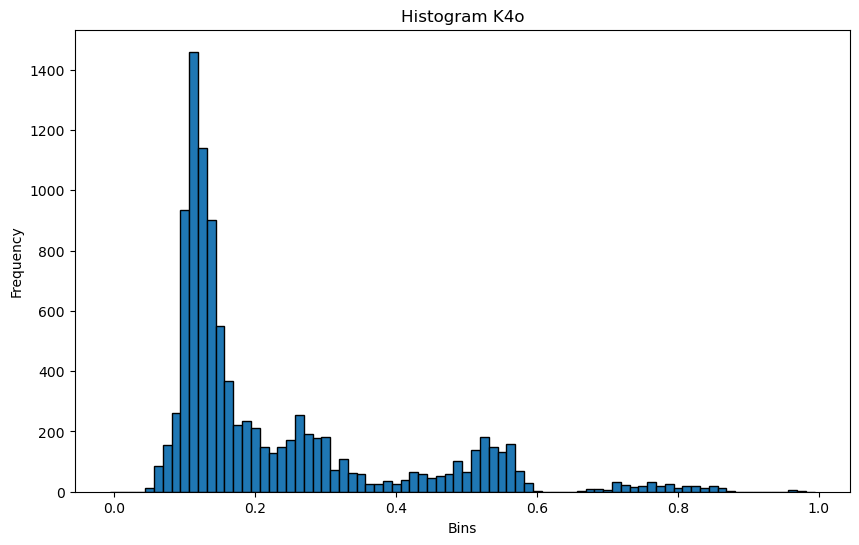

Line 132: Qc4d


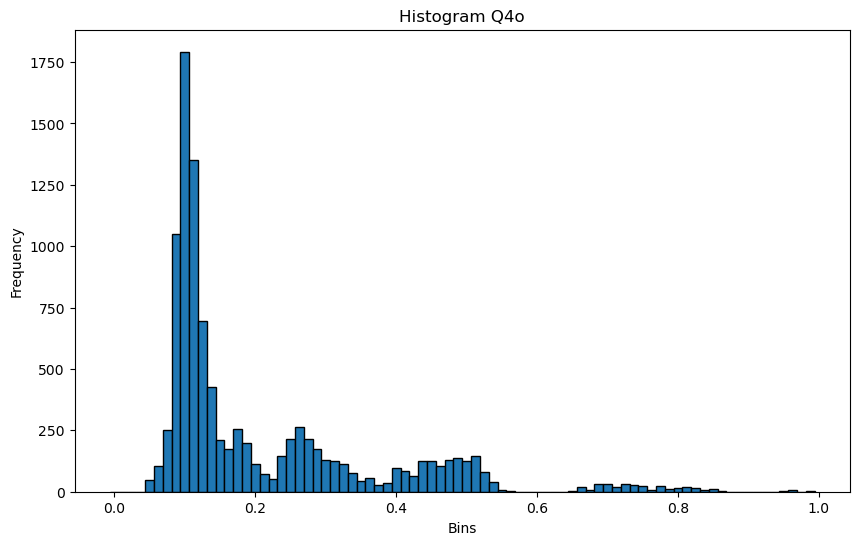

Line 133: Jc4d


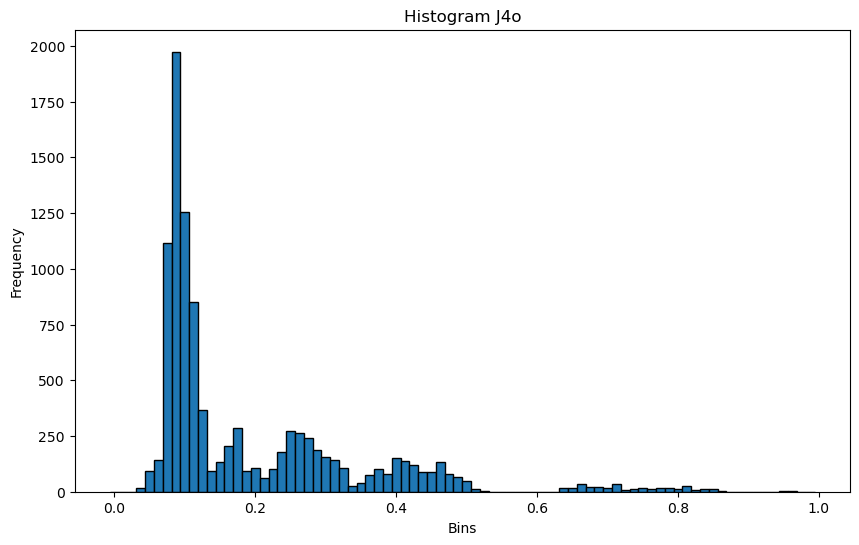

Line 134: Tc4d


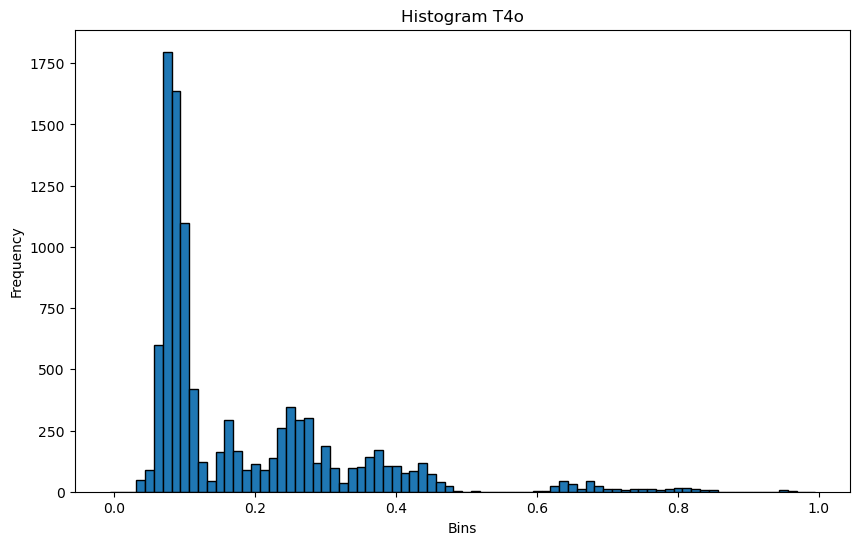

Line 135: 9c4d


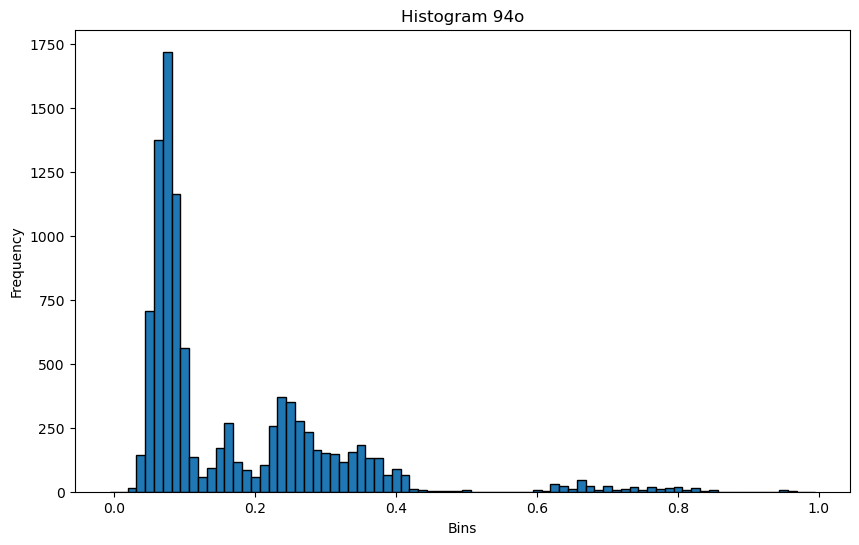

Line 136: 8c4d


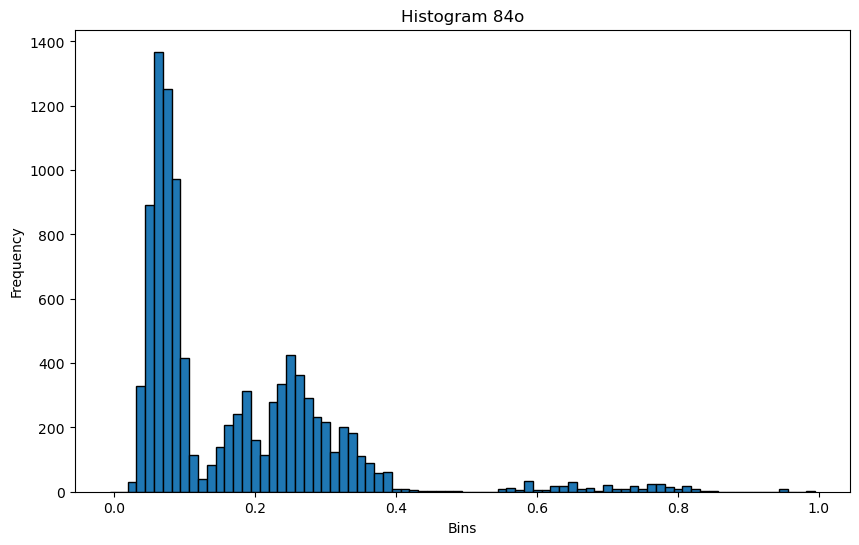

Line 137: 7c4d


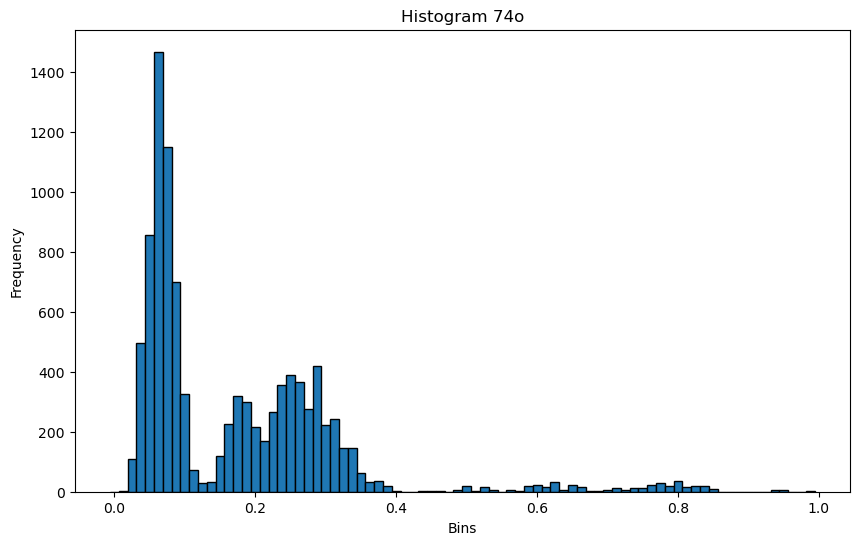

Line 138: 6c4d


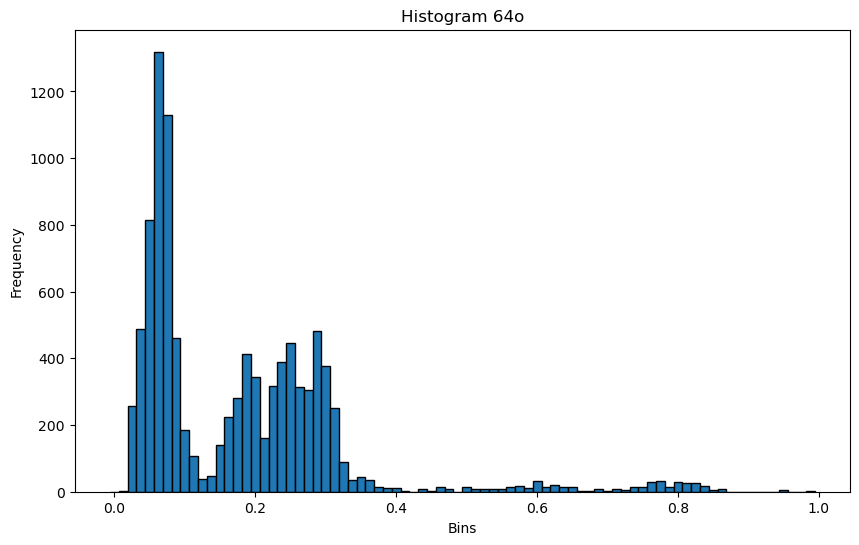

Line 139: 5c4d


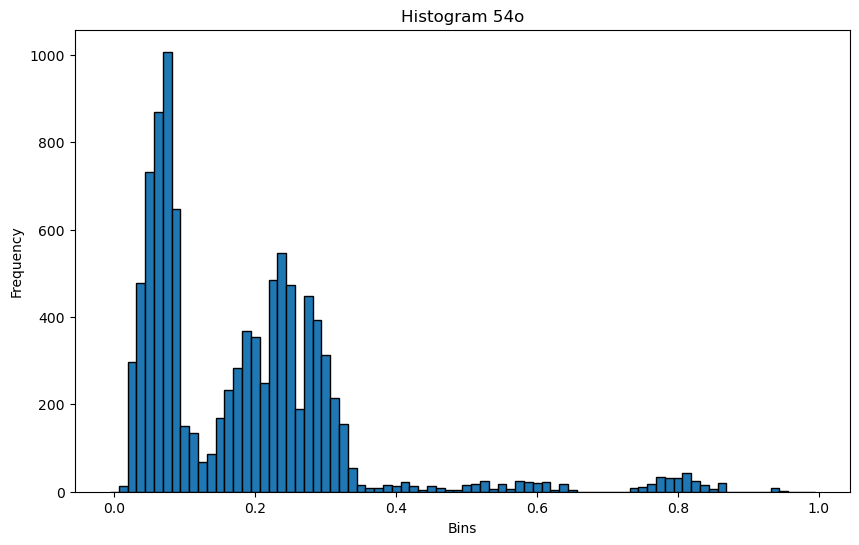

Line 140: 4d4c


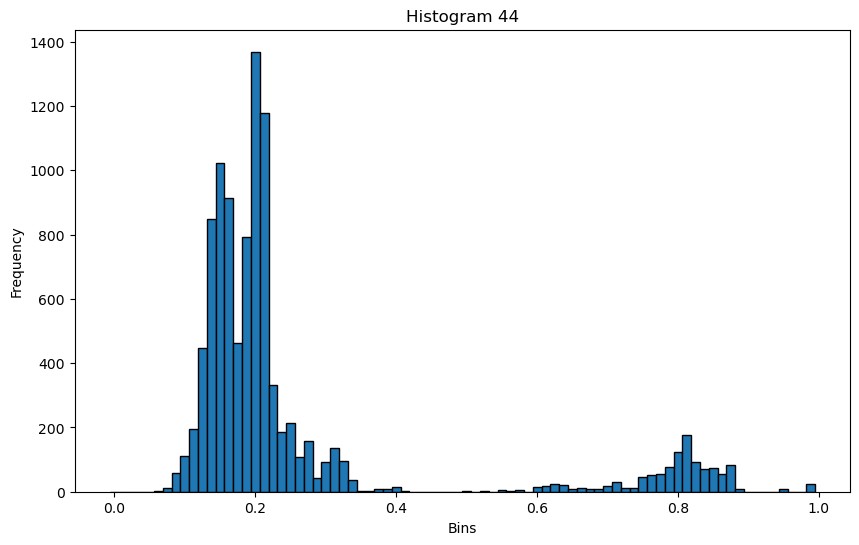

Line 141: 4c3c


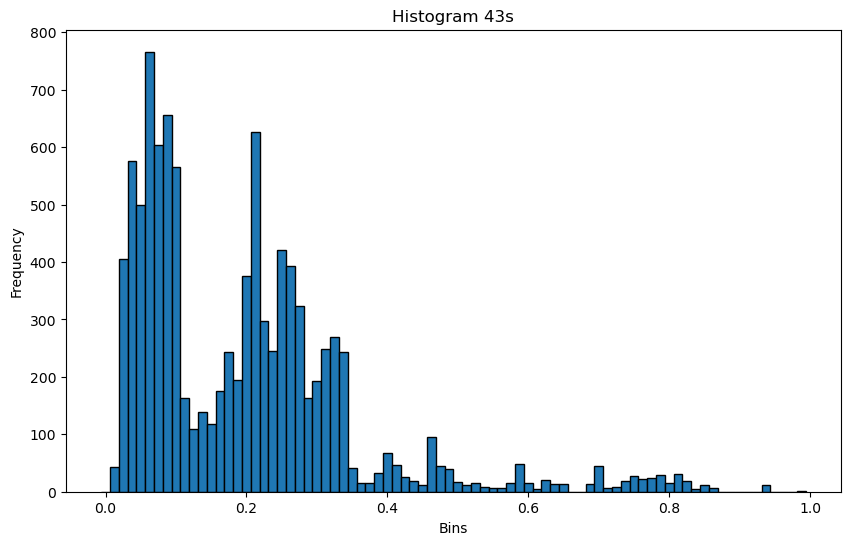

Line 142: 4c2c


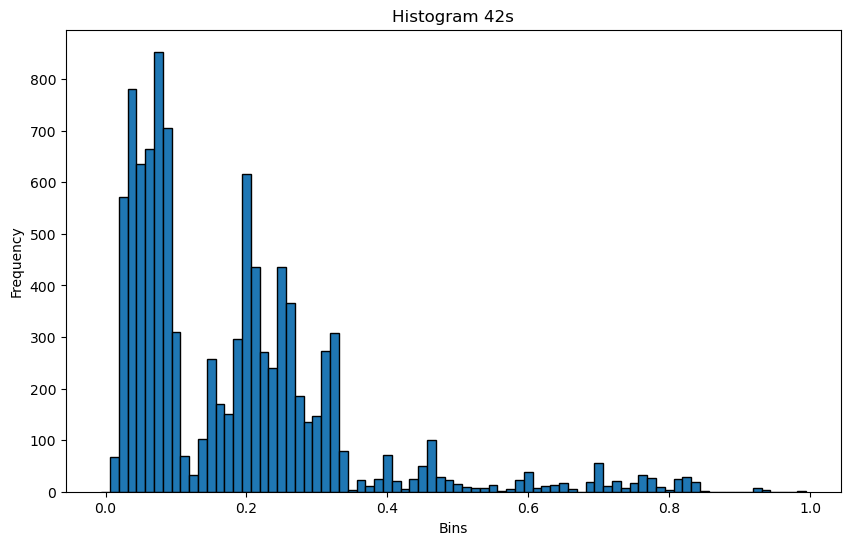

Line 143: Ac3d


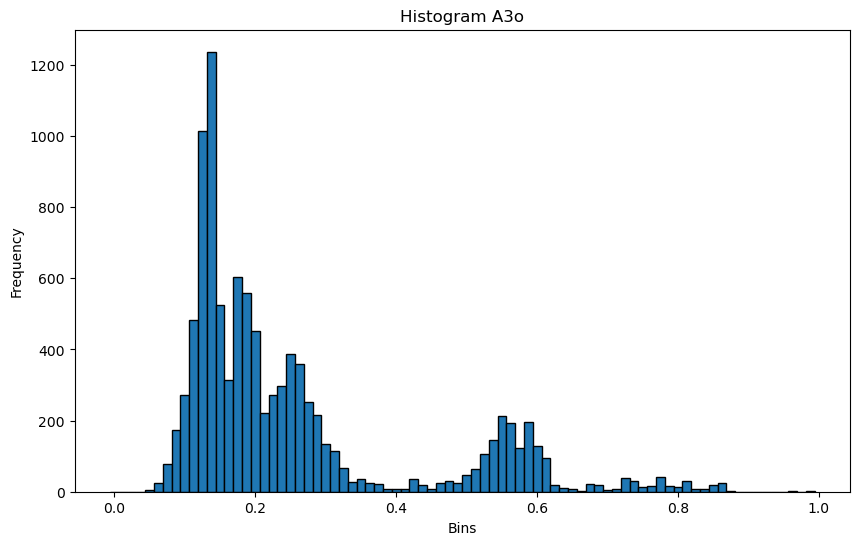

Line 144: Kc3d


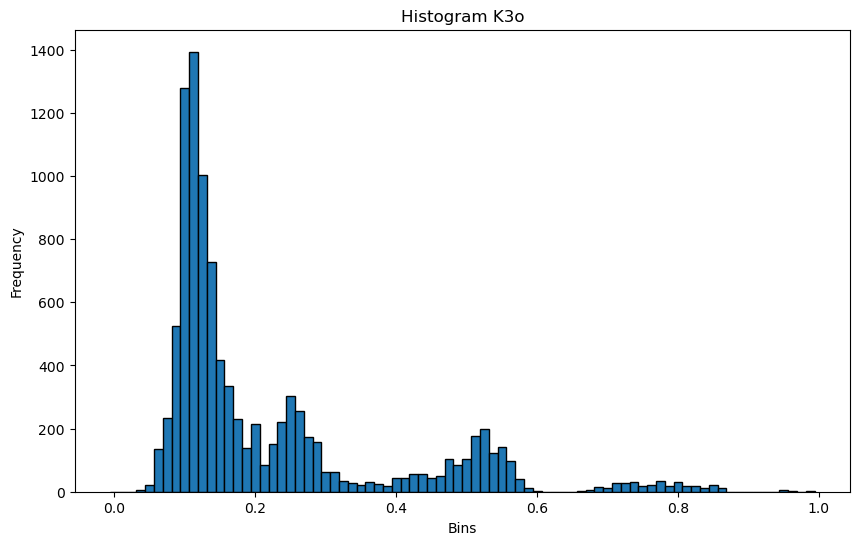

Line 145: Qc3d


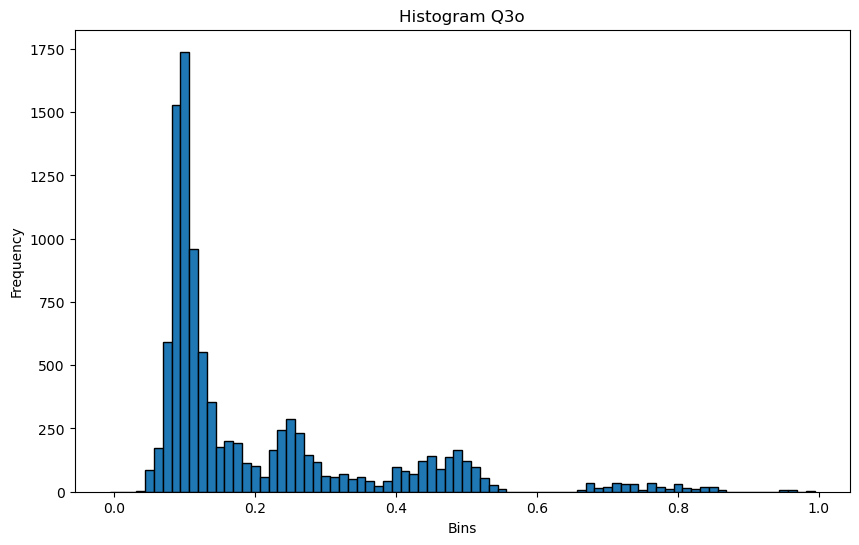

Line 146: Jc3d


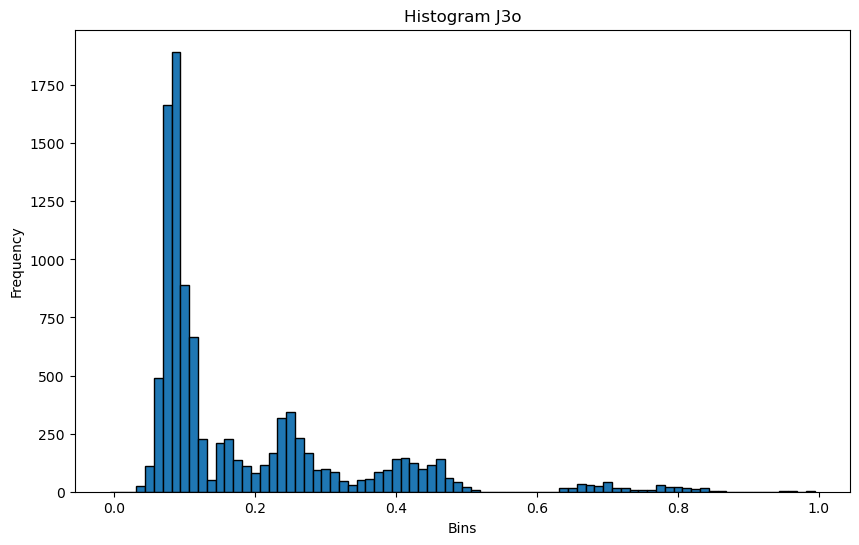

Line 147: Tc3d


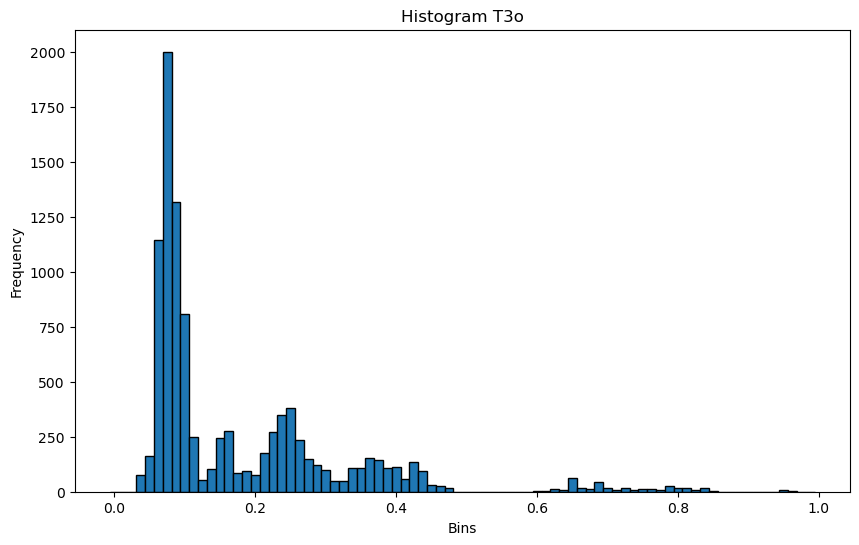

Line 148: 9c3d


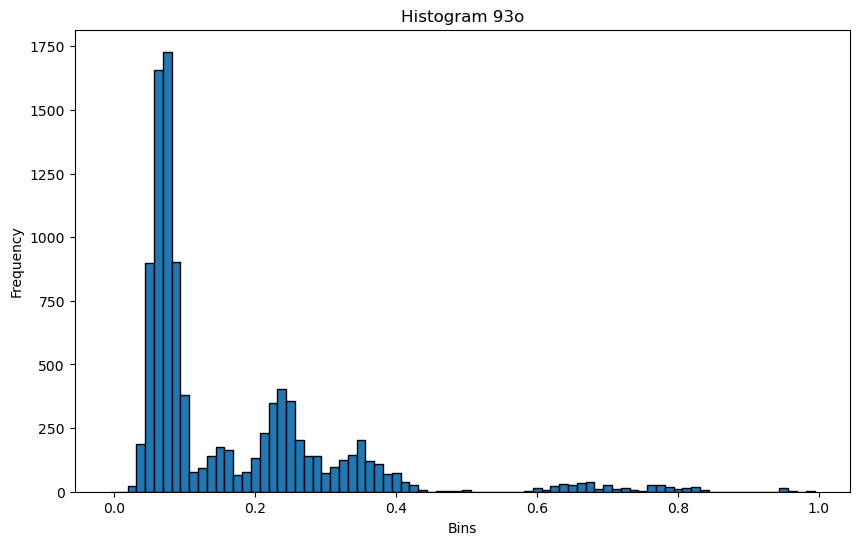

Line 149: 8c3d


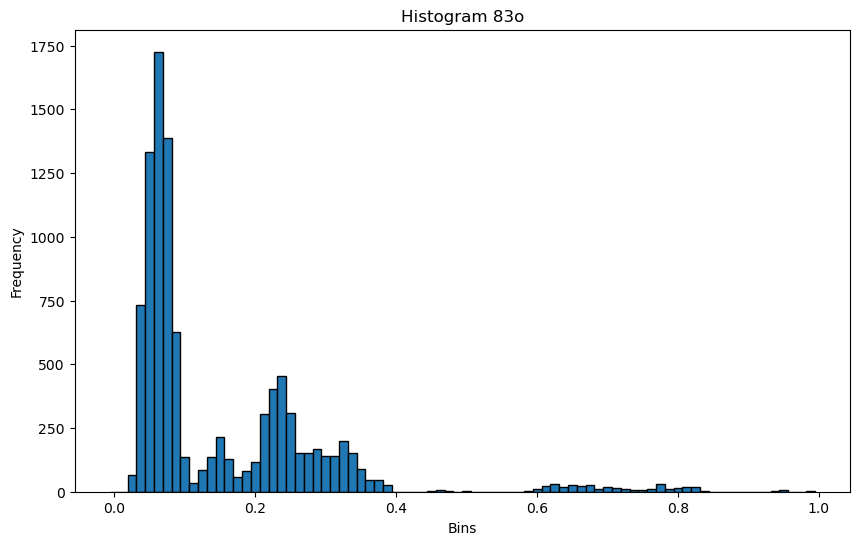

Line 150: 7c3d


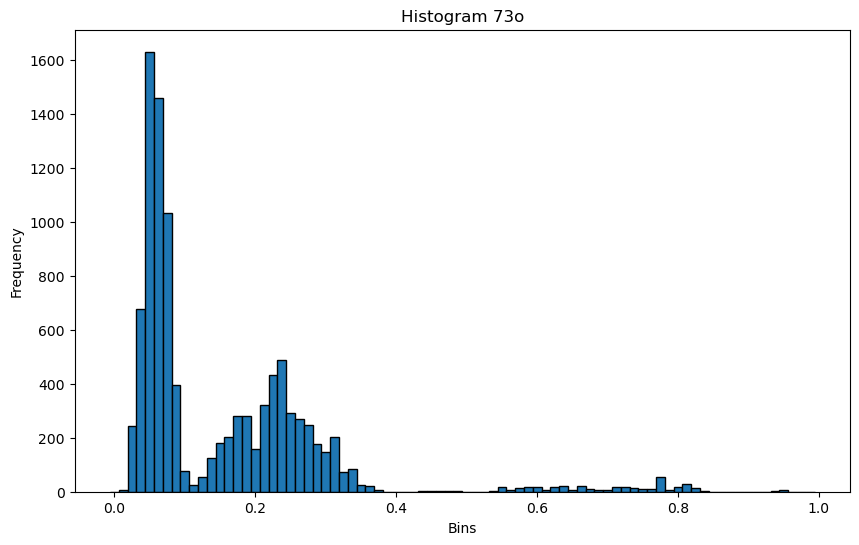

Line 151: 6c3d


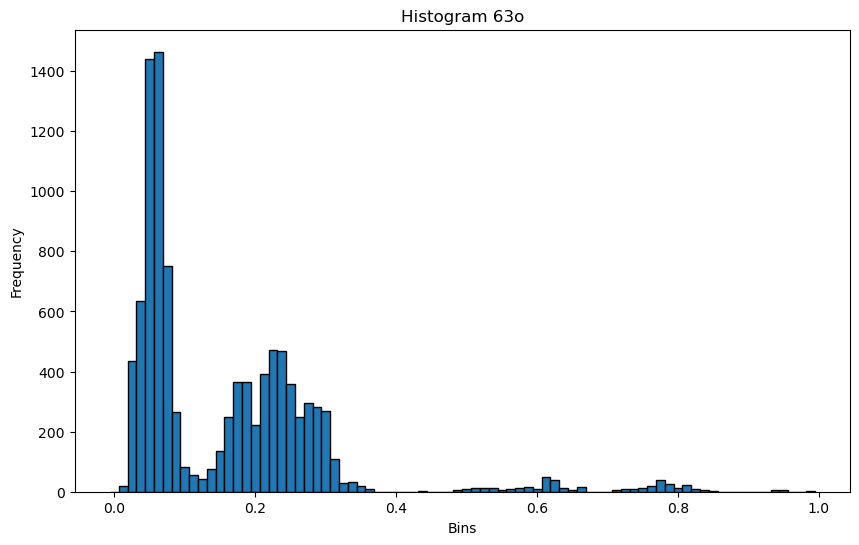

Line 152: 5c3d


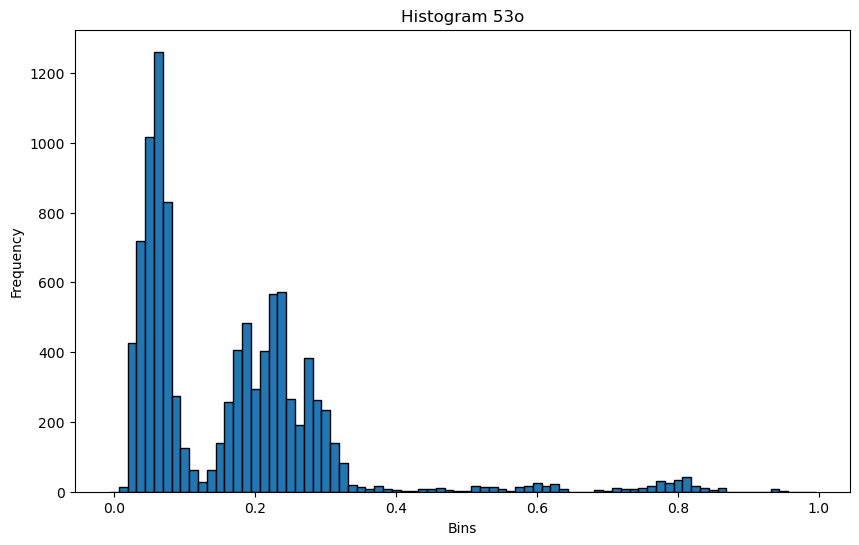

Line 153: 4c3d


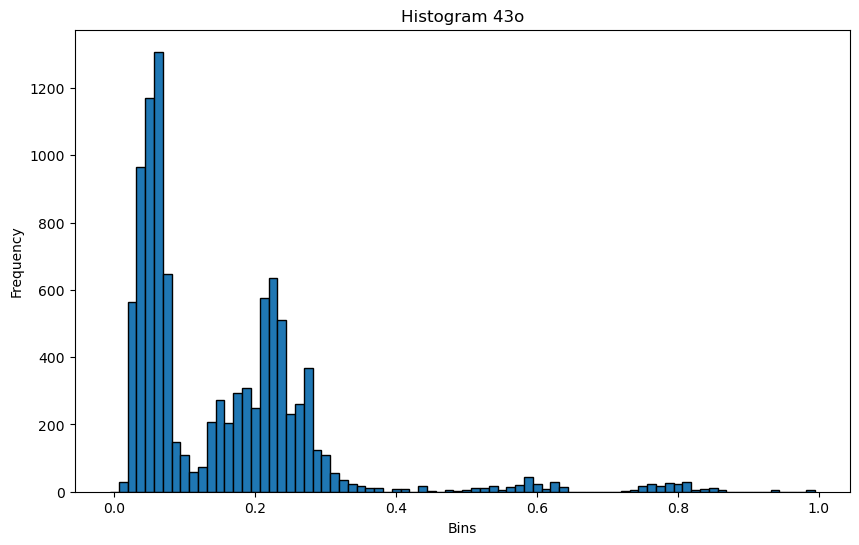

Line 154: 3d3c


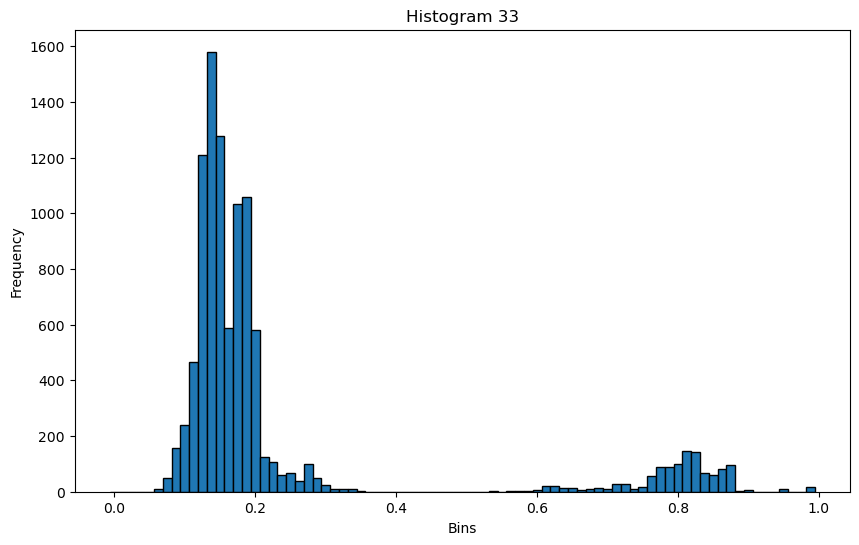

Line 155: 3c2c


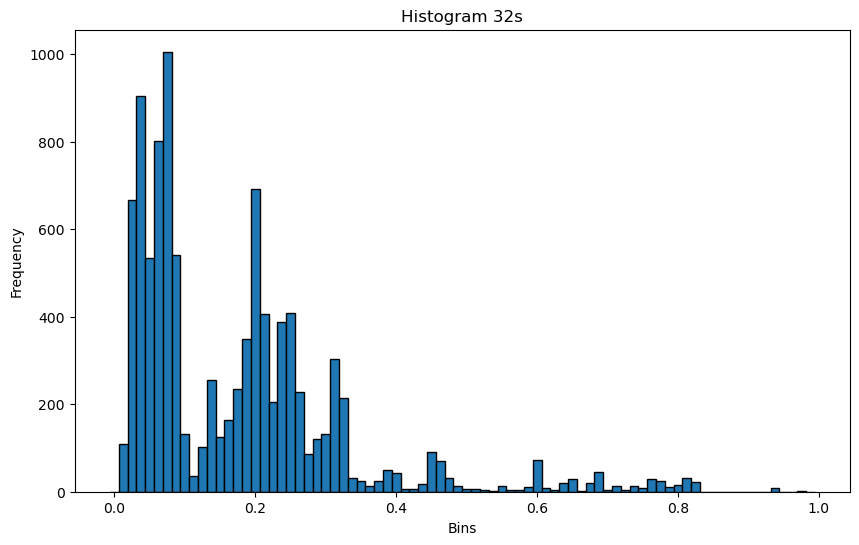

Line 156: Ac2d


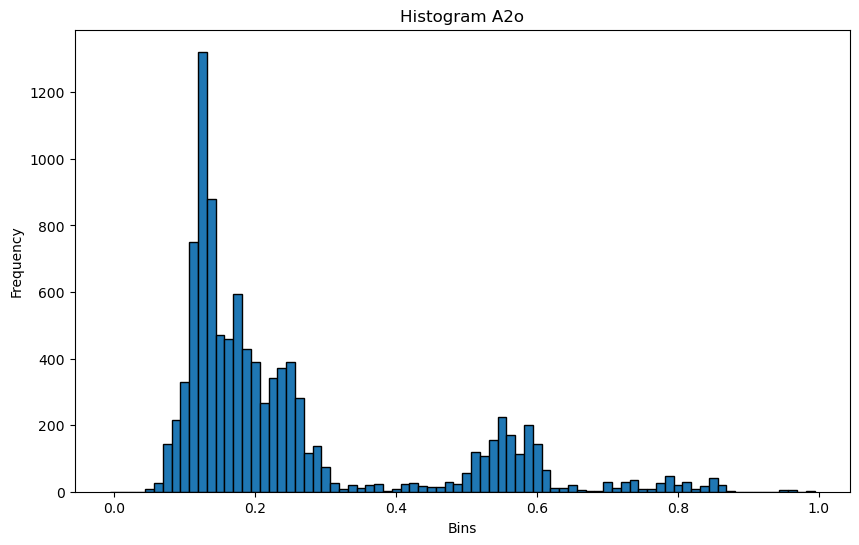

Line 157: Kc2d


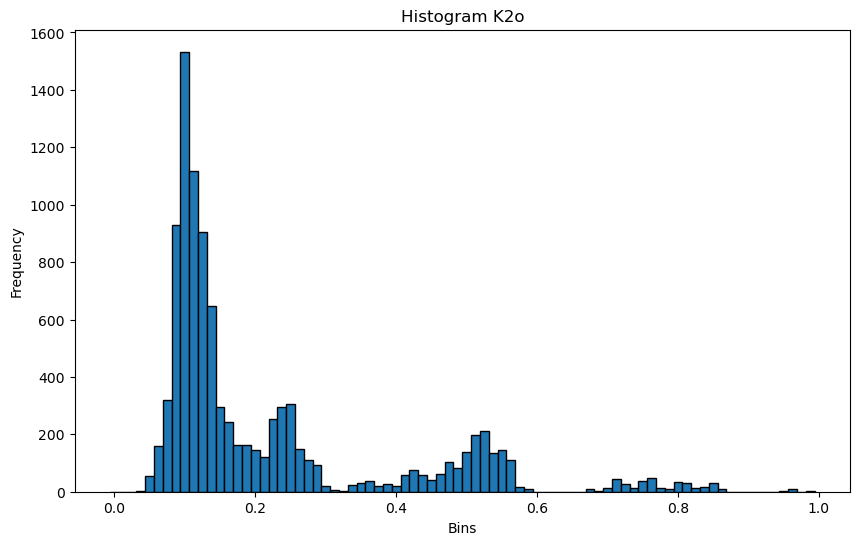

Line 158: Qc2d


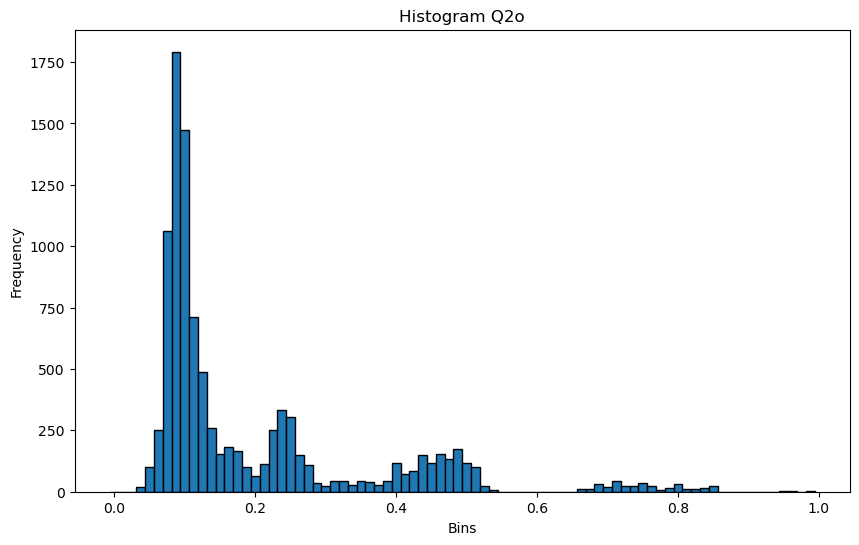

Line 159: Jc2d


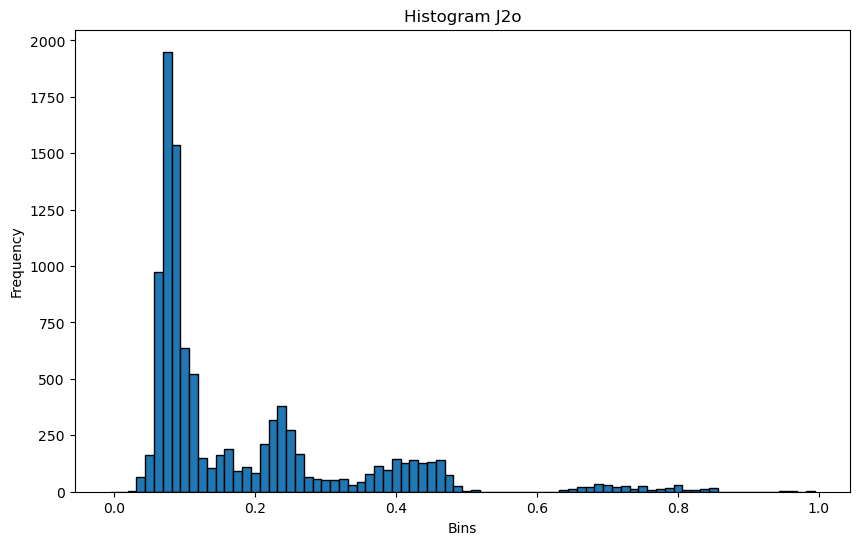

Line 160: Tc2d


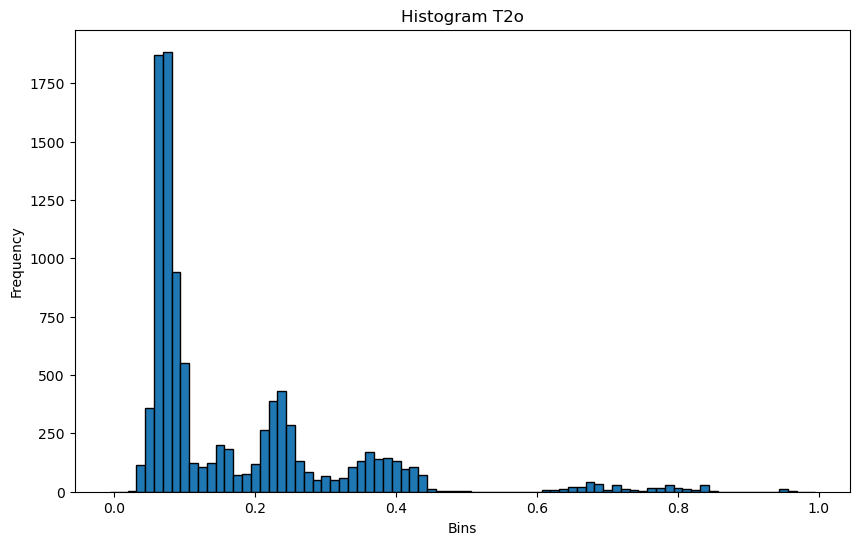

Line 161: 9c2d


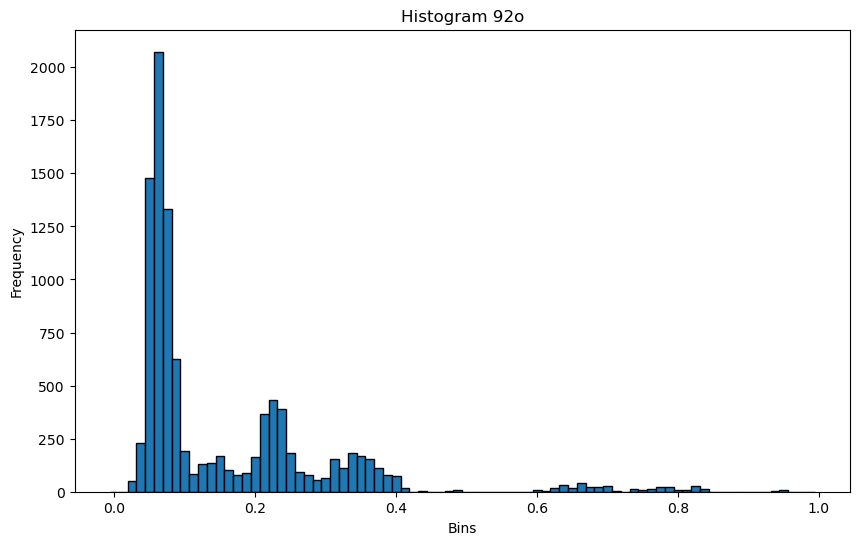

Line 162: 8c2d


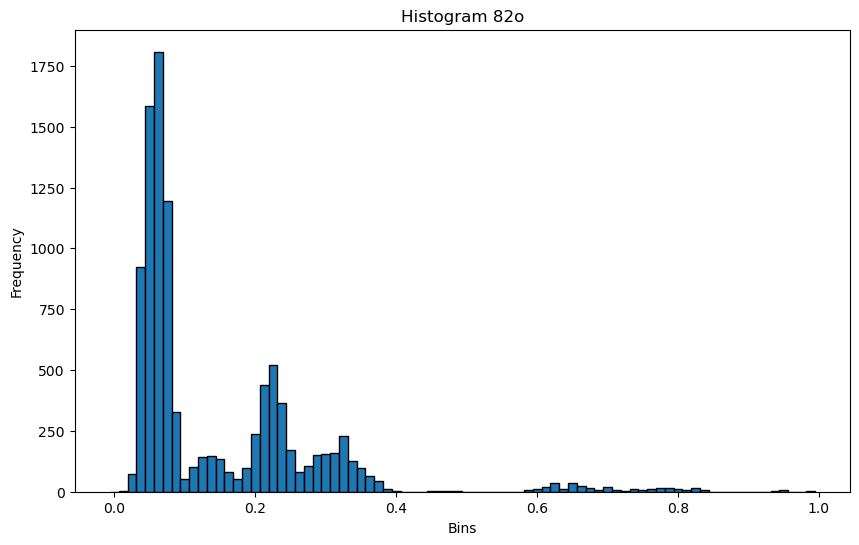

Line 163: 7c2d


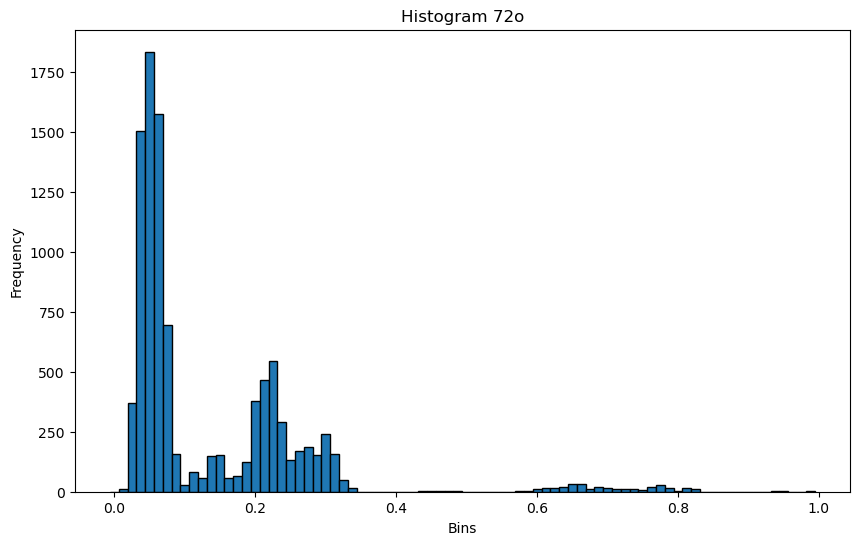

Line 164: 6c2d


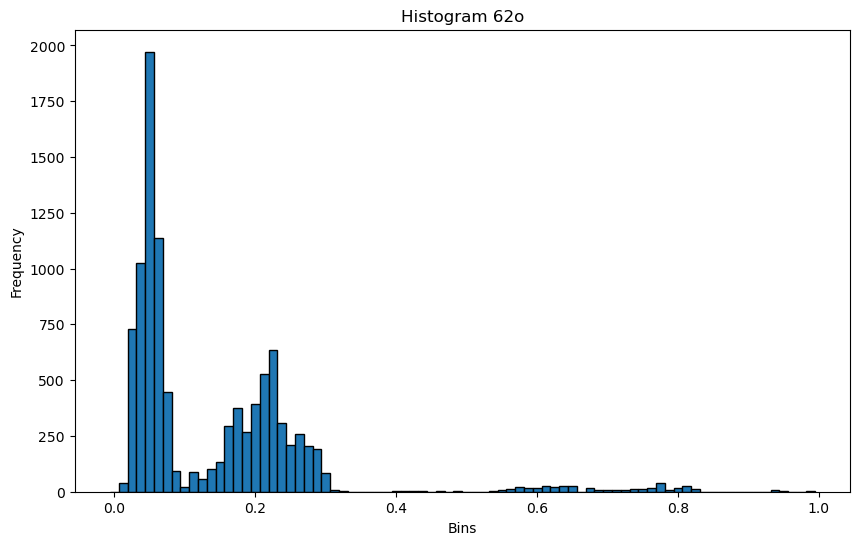

Line 165: 5c2d


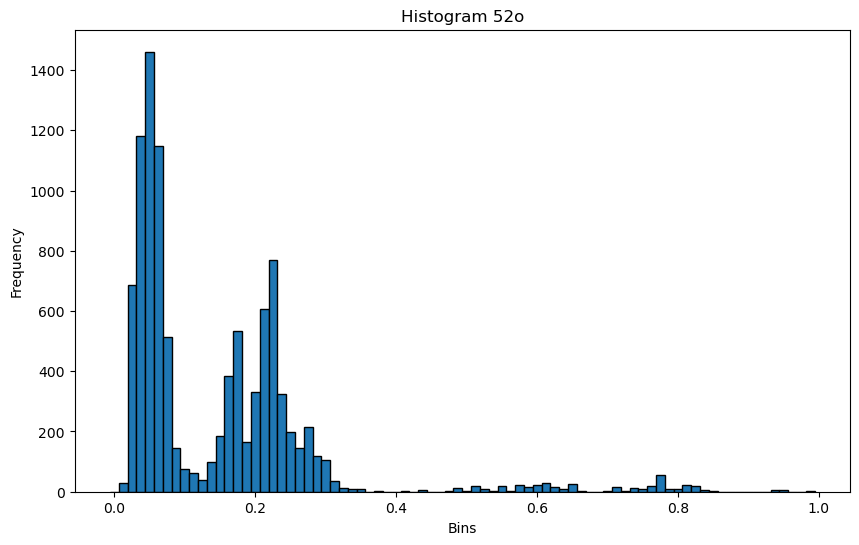

Line 166: 4c2d


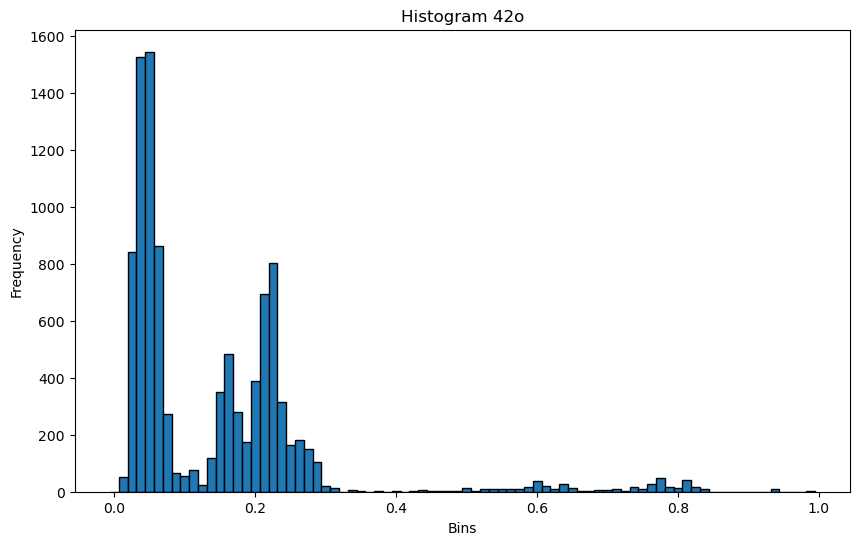

Line 167: 3c2d


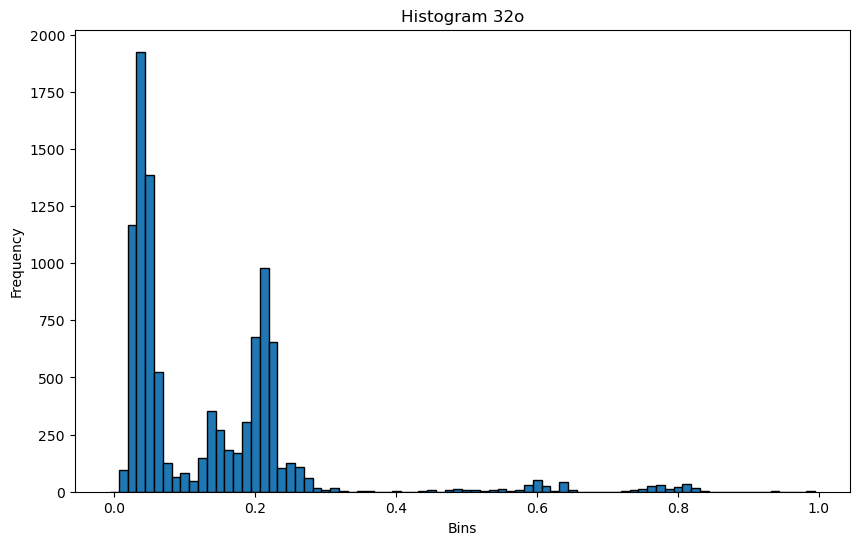

Line 168: 2d2c


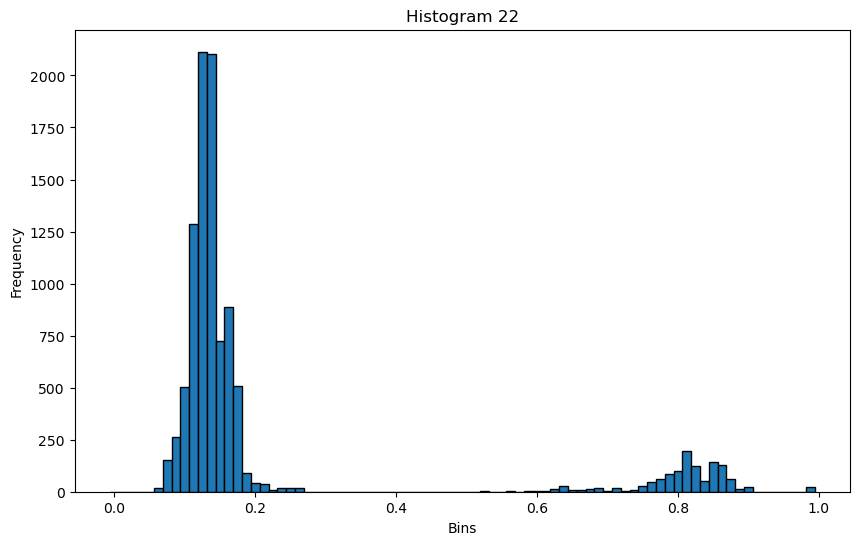

In [7]:
num_bins = 80
num_clusters = 24  # Define the number of clusters

csv_path = Path('./from_rust/hole_card_data_Flop_4.csv')
# csv_path = Path('/home/eric/git/poker_eval/data/hole_card_data_River_4.csv')
df = pd.read_csv(csv_path, header=None)

print(df.head())

card_labels = df.iloc[:, 1]  # Store the card labels
features = df.iloc[:, 2:]  # Select the columns with features

fixed_card_labels = []
for i in range(0, card_labels.size):
    orig_label = card_labels[i]
    if orig_label[0] == orig_label[2]:
        fixed_card_labels.append(f"{orig_label[0]}{orig_label[2]}")
    elif orig_label[1] == orig_label[3]:
        fixed_card_labels.append(f"{orig_label[0]}{orig_label[2]}s")
    else:
        fixed_card_labels.append(f"{orig_label[0]}{orig_label[2]}o")

    
# Create histograms (assuming they are not already in histogram form)
# histogram returns hist and bin_edges
bin_edges = []
histograms = []



for index, row in features.iterrows():
    print(f"Line {index}: {card_labels[index]}")
    h, be = np.histogram(row, bins=num_bins, range=(0, 1))
    
    histograms.append(h)
    bin_edges.append(be)

    plt.figure(figsize=(10, 6))

    bin_width = be[1] - be[0]

    plt.bar(be[:-1], h, width=bin_width, edgecolor='black')
    plt.title(f'Histogram {fixed_card_labels[index]}')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.show()